# Cutting Stock Problem
Cutting Stock Problem is the problem of cutting standard-sized pieces of stock material, such as paper rolls or sheet metal, into pieces of specified (requested) sizes whilst minimizing material wasted. It is an optimization problem in mathematics that arises from applications in industry. In terms of computational complexity, the problem is an NP-hard problem.

In [6]:
import random
import copy
from numpy import exp

from matplotlib import pyplot
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

class Problem:
	def __init__(self, role_width, requests):
		self.role_width = role_width
		self.requests = requests


## Environment
Solution for this problem is a list of lists, where each inner list represents the requests of the same stock. Additionally, we have a lists `C` for storing wastes of each stock.

## Simulated Annealing
Simulated annealing is a probabilistic technique for approximating the global optimum of a given function. Specifically, it is a metaheuristic to approximate global optimization in a large search space for an optimization problem. It is often used when the search space is discrete.

We start by finding an initial solution. we do that by simply putting requests in stocks in order and we use a new stock the current request can not be addressed by the remaining capacity of the current stock.

then go over its neighbors and choose them only if that neighbor has better values. Choosing neighbors is done randomly. we find a neighbor by randomly removing one request from a stock and adding it to another one. Note that while we consider a better neighbor as the best solution, we do not necessarily change the the current solution.

Changing the current solution is done based on the probability shown in the code and it is based on the `temp`, temperature in which we have chosen and the difference of the waste of current solution and the neighbor solution. In my experience the temperature function had little effect in the results.


In [7]:
class Solution:
	def __init__(self, problem):
		self.problem = problem

		self.a = None
		self.C = None
		self.waste = None

	def generate_random_solution(self):
		self.a = [[]]
		self.C = [self.problem.role_width]

		for request_index, request in enumerate(self.problem.requests):
			if self.C[-1] > request:
				self.a[-1].append(request_index)
				self.C[-1] -= request
			else:
				self.a.append([request_index])
				self.C.append(self.problem.role_width - request)
		
		self.calculate_cost()

	def calculate_cost(self):
		self.waste = sum(self.C)
		return self.waste

	def find_neighbor(self):
		neighbor = Solution(self.problem)

		neighbor.a = copy.deepcopy(self.a)
		neighbor.C = copy.deepcopy(self.C)

		change = False

		while not change:
			first_stock_index = random.choice(range(len(neighbor.C)))
			request_index = random.choice(neighbor.a[first_stock_index])

			for second_stock_index, second_stock in enumerate(neighbor.a):
				if second_stock_index == first_stock_index:
					continue
				if neighbor.C[second_stock_index] > self.problem.requests[request_index]:
					neighbor.C[second_stock_index] -= self.problem.requests[request_index]
					neighbor.a[second_stock_index].append(request_index)
					neighbor.a[first_stock_index].remove(request_index)
					neighbor.C[first_stock_index] += self.problem.requests[request_index]
					
					change = True
					break
			
			if len(neighbor.a[first_stock_index]) == 0:
				del neighbor.a[first_stock_index]
				del neighbor.C[first_stock_index]
		
		neighbor.calculate_cost()
		
		return neighbor

In [8]:
def simulated_annealing(problem, n_iterations, temp, show_solution=True):
	scores = []

	solution = Solution(problem)

	solution.generate_random_solution()

	scores.append(solution.waste)

	if show_solution:
		print('init', len(solution.a), solution.a, solution.waste)
	else:
		print('init', len(solution.a), solution.waste)

	current = solution

	for epoch in range(n_iterations):
		neighbor = current.find_neighbor()

		if neighbor.waste < solution.waste:
			solution = neighbor
			scores.append(solution.waste)
			print(epoch+1, len(solution.a), solution.waste)
		else:
			print(epoch+1, len(solution.a), solution.waste, 'no_change')

		diff = neighbor.waste - current.waste

		t = temp / float(epoch + 1)
		metropolis = exp(-diff / t)

		if diff < 0 or random.random() < metropolis:
			current = neighbor

	if show_solution:
		print('final', len(solution.a), solution.a, solution.waste)
	else:
		print('final', len(solution.a), solution.waste)

	return scores


## Test Cases

### Input 1
Answer: 52

init 66 [[0, 1], [2], [3, 4, 5, 6, 7], [8], [9], [10], [11, 12], [13, 14, 15], [16, 17, 18], [19, 20], [21, 22, 23], [24], [25, 26], [27], [28], [29], [30, 31], [32, 33], [34, 35, 36, 37], [38, 39, 40], [41], [42, 43, 44], [45], [46], [47], [48], [49, 50, 51], [52, 53], [54, 55, 56], [57, 58], [59], [60, 61], [62, 63, 64, 65], [66], [67], [68, 69, 70], [71, 72, 73], [74], [75, 76], [77, 78, 79], [80, 81, 82, 83], [84], [85], [86], [87, 88], [89], [90, 91], [92, 93, 94], [95, 96], [97], [98], [99], [100, 101], [102, 103, 104, 105], [106, 107, 108, 109], [110, 111, 112], [113], [114, 115], [116, 117, 118], [119], [120], [121, 122, 123, 124], [125, 126, 127, 128, 129, 130], [131, 132, 133], [134, 135], [136, 137, 138, 139]] 17928
1 66 17928 no_change
2 65 16928
3 64 15928
4 64 15928 no_change
5 63 14928
6 63 14928 no_change
7 63 14928 no_change
8 62 13928
9 61 12928
10 61 12928 no_change
11 61 12928 no_change
12 61 12928 no_change
13 61 12928 no_change
14 61 12928 no_change
15 61 12928 no

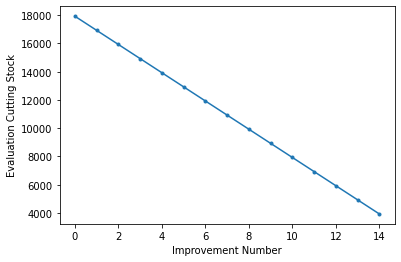

In [9]:
# Input 1
Stock_Length = 1000
Requests = [106, 187, 914, 106, 33, 18, 402, 230, 507, 495, 609, 627, 346, 295, 312, 107, 716, 88, 106, 248, 689, 115, 106, 218, 672, 618, 117, 805, 306, 753, 414, 84, 557, 266, 409, 144, 69, 116, 333, 88, 264, 967, 180, 251, 71, 788, 581, 555, 988, 292, 60, 125, 532, 405, 170, 249, 181, 686, 283, 424, 933, 23, 99, 135, 246, 337, 648, 753, 354,
            518, 45, 286, 315, 370, 557, 463, 312, 284, 61, 412, 457, 118, 268, 123, 232, 788, 678, 371, 171, 557, 549, 286, 356, 92, 148, 515, 301, 632, 987, 660, 868, 92, 544, 211, 70, 75, 145, 125, 278, 441, 368, 351, 119, 662, 653, 186, 517, 43, 224, 506, 592, 501, 149, 79, 241, 53, 80, 437, 46, 78, 149, 525, 149, 126, 365, 460, 280, 266, 109, 86]

problem = Problem(Stock_Length, Requests)
scores = simulated_annealing(problem, 1000, 50)

pyplot.plot(scores, '.-')
pyplot.xlabel('Improvement Number')
pyplot.ylabel('Evaluation Cutting Stock')
pyplot.show()


### Input 2
Answer: 79

init 90 [[0, 1, 2], [3, 4, 5], [6, 7], [8, 9], [10, 11], [12, 13], [14, 15], [16, 17], [18, 19, 20], [21, 22, 23], [24, 25], [26, 27], [28, 29], [30, 31, 32], [33, 34], [35, 36], [37, 38, 39], [40, 41, 42], [43, 44], [45, 46, 47], [48, 49, 50], [51, 52, 53], [54, 55, 56], [57, 58], [59, 60], [61, 62, 63], [64, 65], [66, 67], [68, 69, 70], [71, 72], [73, 74, 75], [76, 77], [78, 79], [80, 81], [82, 83, 84], [85, 86], [87, 88], [89, 90, 91], [92, 93], [94, 95], [96, 97, 98], [99, 100, 101], [102, 103, 104], [105, 106, 107], [108, 109, 110], [111, 112, 113], [114, 115], [116, 117], [118, 119], [120, 121], [122, 123, 124], [125, 126], [127, 128, 129], [130, 131], [132, 133], [134, 135, 136], [137, 138], [139, 140], [141, 142], [143, 144, 145], [146, 147, 148], [149, 150, 151], [152, 153, 154], [155, 156], [157, 158], [159, 160, 161], [162, 163, 164], [165, 166, 167], [168, 169], [170, 171, 172], [173, 174], [175, 176, 177], [178, 179], [180, 181, 182], [183, 184], [185, 186], [187, 188, 189

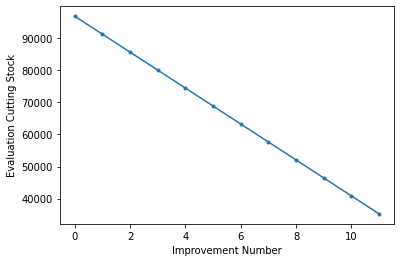

In [10]:
# Input 2
Stock_Length = 5600
Requests = [1520, 2150, 1880, 1520, 2150, 1820, 2150, 2050, 2140, 2140, 1710, 1820, 2150, 1380, 2140, 2150, 1820, 2050, 2100, 1380, 1880, 1880, 1520, 1930, 1710, 2140, 1880, 2050, 1710, 2150, 2000, 1710, 1820, 1560, 2150, 1930, 2000, 1880, 1380, 2050, 1930, 1710, 1820, 1710, 2200, 2050, 1560, 1930, 1930, 2050, 1560, 1380, 1520, 1520, 1520, 2100, 1560, 1520, 2150, 2000, 2000, 2140, 1560, 1880, 2200, 2140, 1930, 2000, 2050, 1520, 1880, 2200, 1520, 1930, 1520, 1710, 1710, 2150, 2100, 2200, 1820, 1820, 2200, 1380, 1880, 1880, 1710, 2140, 1820, 2100, 1380, 1880, 2140, 1820, 1930, 1880, 1880, 1520, 2000, 2050, 2140, 1380, 1380, 1380, 2150, 1380, 2150, 1820, 1820,
            2140, 1560, 1710, 1520, 1560, 2140, 2200, 2200, 1880, 2200, 1710, 1930, 2100, 2200, 1820, 1520, 2140, 2100, 1380, 1520, 2140, 2050, 2100, 2200, 2140, 1820, 1820, 1380, 1880, 2140, 2150, 1930, 2100, 2150, 1380, 1710, 1380, 1380, 1520, 2200, 1380, 1560, 1930, 1820, 1930, 1380, 2140, 1520, 2050, 1710, 1880, 1560, 1520, 2150, 1880, 1520, 2100, 1560, 1710, 2150, 1930, 2000, 1930, 1520, 2200, 2200, 1560, 1820, 2100, 2150, 1880, 2000, 1820, 1380, 1930, 2100, 1880, 2200, 1560, 1380, 2100, 1520, 2000, 2200, 2000, 2100, 2050, 1930, 1520, 2200, 2200, 2050, 2100, 1380, 1930, 1820, 1520, 2150, 1520, 1520, 1380, 2200, 1380, 1930, 1930, 2150, 1930, 2200, 2200, 1520]

problem = Problem(Stock_Length, Requests)
scores = simulated_annealing(problem, 10000, 30)

pyplot.plot(scores, '.-')
pyplot.xlabel('Improvement Number')
pyplot.ylabel('Evaluation Cutting Stock')
pyplot.show()


### Input 3
Answer: 100

init 115 [[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], [13], [14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27], [28, 29, 30, 31, 32, 33, 34], [35, 36, 37, 38, 39, 40, 41, 42, 43], [44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58], [59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69], [70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94], [95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111], [112], [113], [114, 115, 116, 117, 118, 119], [120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135], [136, 137, 138, 139, 140], [141, 142], [143, 144, 145, 146], [147], [148, 149, 150, 151], [152, 153, 154, 155], [156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167], [168, 169], [170, 171, 172, 173, 174, 175, 176, 177], [178, 179, 180, 181, 182, 183, 184, 185, 186], [187, 188], [189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199], [200, 201, 202, 203, 204, 205, 206, 207, 208], [20

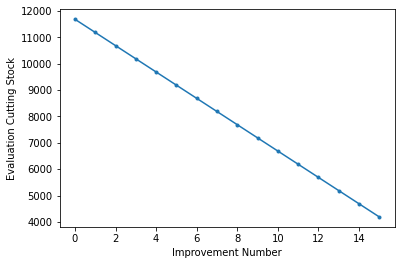

In [11]:
# Input 3
Stock_Length = 500
Requests = [6, 11, 288, 19, 18, 3, 6, 2, 1, 116, 17, 9, 2, 470, 224, 16, 3, 1, 7, 2, 25, 2, 1, 18, 5, 5, 92, 1, 162, 8, 2, 153, 161, 8, 1, 17, 9, 5, 8, 244, 8, 134, 2, 1, 88, 11, 49, 8, 3, 1, 3, 6, 85, 2, 1, 12, 201, 1, 14, 187, 7, 4, 245, 2, 6, 1, 2, 3, 1, 9, 106, 8, 5, 9, 10, 4, 9, 7, 1, 9, 1, 6, 11, 8, 3, 7, 41, 7, 75, 5, 3, 6, 5, 3, 1, 166, 5, 2, 52, 21, 5, 7, 5, 5, 3, 110, 5, 3, 2, 4, 2, 5, 271, 369, 134, 3, 282, 3, 1, 76, 12, 4, 16, 10, 12, 1, 2, 26, 1, 204, 14, 1, 4, 1, 118, 72, 2, 2, 364, 2, 1, 196, 6, 331, 26, 14, 6, 159, 433, 3, 2, 1, 275, 7, 8, 1, 318, 5, 32, 4, 1, 17, 8, 20, 21, 1, 3, 19, 386, 3, 172, 1, 17, 93, 138, 7, 8, 6, 157, 4, 6, 2, 7, 111, 34, 7, 159, 359, 6, 264, 131, 9, 5, 3, 36, 1, 6, 18, 8, 7, 116, 11, 5, 154, 1, 5, 120, 17, 16, 152, 2, 21, 5, 14, 7, 7, 174, 134, 24, 17, 3, 3, 4, 6, 6, 225, 10, 15, 7, 86, 2, 13, 5, 224, 15, 6, 1, 9, 2, 9, 3, 264, 152, 4, 14, 260, 124, 214, 17, 12, 10, 10, 3, 2, 4, 97, 313, 4, 1, 5, 16, 237, 5, 2, 9, 9, 10, 12, 1, 17, 311, 2, 9, 16, 9, 19, 22, 2, 10, 178, 3, 9, 1, 4, 9, 87, 321, 8, 10, 4, 183, 405, 5, 9, 7, 227, 14, 18, 205, 7, 14, 9, 4, 7, 2, 15, 6, 7, 204, 240, 99, 2, 4, 112, 314, 89, 198, 178, 8, 11, 7, 167, 124, 27, 6, 86, 11, 1, 19, 6, 3, 8, 1, 180, 1, 361, 3, 11, 5, 8, 28, 9, 1, 152, 6, 8, 27, 6, 191, 5, 3, 234, 3, 15, 1, 243, 1, 11, 4, 9, 255, 2, 6, 5, 6, 169, 92, 138, 3, 8, 1, 6, 6, 2, 3, 38, 2, 14, 21, 5, 8, 4, 1, 7, 5, 275, 9, 2, 11, 5, 8, 18, 13, 4, 67, 66, 111, 3, 3, 339, 1, 4, 13, 29, 147, 10, 3, 23, 5, 158, 7, 13, 1, 7, 1, 9, 4, 4, 4, 3, 2, 74, 98, 25, 335, 1, 24, 6, 243, 11, 167, 4, 4, 7, 10, 98, 8, 135, 4, 419, 14, 4, 15, 1, 6, 2, 12, 6, 11, 13, 8, 21, 6, 21, 147, 5, 8, 14, 11, 263, 4, 147, 411, 24, 16, 18, 1, 2, 90, 24, 2, 7, 5, 18, 21, 3, 319, 8, 138, 4, 5, 2, 1, 5, 7, 126, 68, 265, 9, 1, 6, 239, 9, 3, 3, 2, 160, 12, 3, 350, 3, 91, 9, 40, 10, 12, 5, 37, 2, 5, 16, 5, 6, 1, 11, 2, 3, 343, 12, 2, 130, 314, 5, 76, 9, 4, 11, 1, 3, 3, 1, 9, 186, 14, 2, 1, 4, 9, 1, 209, 5, 3, 7, 21, 174, 13, 4, 27, 255, 2, 298, 1, 7, 8, 9, 1, 12, 3, 6, 150, 16, 4, 2, 16, 133, 281, 1, 1, 38, 8, 15, 1, 1, 5, 2, 3, 4, 170, 2, 134, 263, 7, 10, 10, 6, 139, 2, 3, 13, 5, 163, 6, 109, 4, 229, 4, 199, 6, 228, 7, 7, 1, 13, 2, 167, 2, 8, 1, 2, 2, 1, 3, 14, 6, 7, 26, 49, 87, 14, 1, 8, 4, 35, 2, 13, 18, 184, 39, 132, 271, 1, 115, 45, 9, 5, 3, 66, 6, 144, 2, 152, 403, 5, 23, 5, 1, 1, 102, 3, 313, 1, 315, 6, 13, 2, 5, 9, 54, 7, 9, 458, 92, 15, 14, 3, 197, 6, 314, 7, 9, 2, 5, 108, 1, 18, 7, 7, 11, 3, 7, 1, 34, 1, 1, 3, 274, 61, 49, 9, 11, 7, 4, 43, 9, 7, 2, 12, 11, 11, 2, 4, 7, 6, 5, 144, 1, 4, 12, 34, 133, 3, 169, 189, 2, 6, 9, 4, 17, 7, 1, 8, 8, 3, 2, 2, 8, 5, 360, 15, 151, 79, 87, 277, 165, 399, 245, 78, 156, 86, 1, 3, 6, 1, 68, 2, 23, 2, 4, 290, 245, 280, 1, 6, 170, 152, 2, 2, 8, 4, 3, 2, 11, 7, 12, 250, 243, 2, 209, 6, 7, 153, 12, 225, 4, 5, 251, 2, 314, 6, 13, 4, 7, 125, 102, 1, 9, 170, 10, 50, 108, 2, 1, 43, 9, 3, 10, 430, 7, 1, 11, 1, 13, 4, 12, 2, 234, 14, 96, 5, 6, 128, 1, 3, 8, 8, 6, 479, 3, 1, 421, 4, 7, 2, 14, 9, 1, 16, 24, 3, 3, 2, 5, 10, 213, 12, 1, 8, 124, 279, 188, 3, 299, 92, 4, 23, 41, 10, 1, 3, 9, 2, 4, 13, 19, 2, 59, 2, 3, 3, 10]

problem = Problem(Stock_Length, Requests)
scores = simulated_annealing(problem, 1000, 50)

pyplot.plot(scores, '.-')
pyplot.xlabel('Improvement Number')
pyplot.ylabel('Evaluation Cutting Stock')
pyplot.show()


### Input 4
Answer: 221

init 261 [[0, 1, 2, 3, 4, 5, 6, 7], [8, 9], [10, 11], [12, 13], [14, 15, 16], [17, 18], [19], [20, 21, 22], [23, 24], [25], [26], [27, 28, 29, 30, 31], [32, 33, 34], [35, 36, 37], [38, 39, 40, 41, 42], [43, 44, 45, 46], [47, 48, 49, 50, 51], [52, 53], [54, 55], [56, 57, 58, 59], [60], [61], [62, 63, 64, 65, 66], [67], [68, 69, 70, 71, 72], [73, 74, 75], [76, 77, 78], [79], [80, 81], [82, 83], [84, 85], [86, 87, 88, 89, 90, 91, 92], [93, 94, 95, 96], [97, 98, 99, 100, 101, 102], [103, 104, 105, 106, 107, 108], [109, 110, 111, 112, 113], [114, 115, 116], [117, 118], [119, 120, 121], [122, 123, 124], [125, 126, 127, 128], [129, 130, 131], [132], [133, 134, 135, 136], [137, 138, 139], [140, 141, 142], [143, 144, 145], [146, 147, 148], [149], [150], [151], [152, 153], [154, 155], [156, 157, 158, 159], [160, 161], [162, 163, 164, 165, 166], [167, 168], [169, 170], [171, 172, 173, 174, 175], [176, 177, 178], [179, 180, 181], [182], [183, 184, 185, 186], [187, 188], [189, 190], [191, 192, 193]

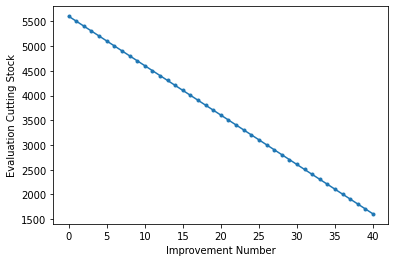

In [12]:
# Input 4
Stock_Length = 100
Requests = [22, 7, 5, 3, 28, 2, 14, 5, 32, 29, 74, 24, 67, 3, 35, 1, 6, 66, 30, 70, 65, 1, 12, 47, 33, 36, 99, 54, 4, 10, 18, 11, 5, 23, 48, 30, 44, 5, 51, 13, 13, 13, 2, 11, 60, 22, 5, 13, 10, 4, 4, 51, 50, 6, 61, 28, 15, 3, 68, 3, 69, 57, 62, 6, 9, 9, 3, 78, 22, 2, 6, 13, 20, 71, 15, 10, 12, 46, 27, 59, 87, 10, 27, 54, 61, 23, 27, 5, 8, 7, 3, 11, 36, 9, 20, 4, 66, 2, 16, 3, 34, 6, 3, 37, 36, 1, 15, 6, 1, 24, 29, 18, 5, 2, 46, 2, 46, 9, 73, 31, 33, 17, 29, 9, 51, 21, 43, 2, 18, 18, 5, 59, 91, 10, 8, 33, 14, 54, 19, 7, 46, 18, 32, 45, 17, 13, 37, 15, 6, 79, 58, 50, 53, 27, 67, 10, 25, 2, 4, 23, 73, 26, 7, 1, 43, 4, 34, 22, 52, 39, 21, 47, 11, 16, 4, 7, 58, 22, 6, 20, 5, 33, 63, 38, 6, 5, 9, 45, 1, 84, 5, 59, 4, 15, 34, 3, 20, 19, 65, 73, 8, 9, 3, 8, 15, 12, 26, 14, 7, 39, 11, 20, 12, 47, 2, 32, 2, 16, 37, 32, 8, 10, 5, 63, 35, 34, 8, 20, 9, 2, 34, 56, 26, 21, 44, 33, 14, 3, 12, 18, 22, 20, 8, 17, 55, 22, 13, 7, 18, 38, 5, 8, 44, 47, 7, 7, 15, 9, 10, 5, 4, 1, 20, 25, 27, 10, 8, 5, 1, 5, 8, 52, 6, 9, 51, 3, 2, 3, 13, 26, 4, 68, 4, 1, 38, 50, 16, 15, 57, 20, 37, 10, 16, 7, 12, 22, 12, 59, 15, 31, 12, 10, 17, 38, 5, 15, 4, 6, 17, 14, 22, 24, 20, 46, 25, 2, 81, 5, 1, 6, 18, 10, 56, 30, 95, 40, 16, 34, 7, 7, 1, 41, 81, 43, 7, 6, 50, 6, 62, 60, 19, 9, 25, 27, 24, 6, 80, 4, 4, 36, 34, 11, 8, 20, 45, 5, 61, 58, 2, 37, 33, 37, 6, 30, 2, 23, 6, 13, 11, 98, 33, 14, 25, 20, 56, 4, 6, 23, 75, 26, 51, 2, 24, 11, 10, 5, 24, 26, 22, 74, 74, 3, 15, 56, 20, 4, 6, 6, 6, 10, 1, 7, 3, 4, 9, 35, 2, 80, 6, 58, 47, 21, 44, 5, 1, 8, 4, 56, 41, 5, 46, 92, 14, 7, 65, 9, 36, 38, 25, 7, 50, 7, 21, 2, 22, 39, 89, 32, 8, 12, 67, 4, 20, 1, 36,
            10, 6, 2, 3, 90, 7, 19, 59, 6, 3, 2, 7, 47, 34, 16, 26, 1, 27, 34, 7, 27, 4, 5, 34, 16, 18, 71, 14, 2, 31, 20, 16, 11, 1, 6, 14, 4, 14, 15, 3, 61, 21, 30, 3, 20, 17, 6, 29, 31, 15, 12, 6, 8, 7, 11, 4, 2, 7, 18, 67, 23, 11, 23, 28, 13, 5, 13, 42, 1, 54, 5, 16, 44, 32, 76, 5, 17, 47, 92, 6, 29, 7, 47, 25, 2, 12, 27, 6, 4, 1, 14, 21, 6, 2, 33, 19, 44, 5, 9, 11, 14, 93, 4, 7, 2, 24, 24, 1, 12, 43, 5, 22, 3, 16, 4, 16, 9, 5, 32, 73, 31, 7, 28, 52, 20, 54, 52, 11, 15, 24, 5, 4, 2, 26, 14, 18, 5, 4, 4, 1, 20, 8, 14, 21, 34, 48, 21, 27, 11, 27, 16, 3, 12, 26, 14, 13, 4, 9, 18, 3, 47, 23, 17, 1, 51, 2, 5, 3, 38, 38, 6, 16, 13, 45, 25, 43, 8, 16, 74, 22, 40, 98, 1, 51, 88, 17, 35, 71, 5, 15, 7, 7, 10, 46, 3, 18, 18, 4, 5, 72, 10, 4, 6, 1, 12, 6, 32, 19, 10, 6, 3, 89, 7, 37, 3, 1, 44, 13, 5, 14, 2, 3, 47, 9, 21, 2, 13, 17, 2, 4, 38, 5, 37, 5, 36, 9, 5, 38, 15, 26, 29, 39, 37, 48, 9, 31, 20, 33, 48, 23, 51, 18, 1, 21, 30, 89, 14, 9, 80, 30, 11, 3, 68, 2, 72, 31, 24, 56, 28, 2, 16, 44, 21, 10, 52, 13, 9, 12, 3, 9, 3, 3, 2, 5, 3, 4, 39, 10, 18, 36, 20, 8, 43, 1, 5, 12, 15, 7, 8, 26, 1, 19, 2, 1, 21, 8, 22, 15, 66, 5, 40, 8, 3, 46, 3, 66, 19, 4, 47, 19, 22, 25, 91, 24, 2, 3, 8, 2, 2, 30, 1, 2, 2, 8, 2, 18, 4, 14, 13, 4, 5, 93, 19, 6, 18, 12, 5, 30, 21, 6, 35, 24, 2, 3, 19, 6, 21, 18, 21, 82, 26, 6, 54, 2, 24, 56, 28, 4, 20, 79, 35, 7, 6, 87, 3, 55, 12, 7, 69, 67, 8, 18, 16, 47, 5, 65, 28, 9, 32, 8, 4, 1, 13, 33, 17, 5, 6, 31, 2, 8, 1, 4, 24, 21, 9, 15, 15, 74, 1, 78, 32, 3, 6, 5, 12, 12, 13, 31, 4, 80, 6, 20, 62, 18, 13, 9, 14, 3, 14, 9, 16, 16, 2, 1, 10, 33, 1, 16, 4, 3, 5, 35, 4, 72, 43, 10, 18, 8, 68, 10, 23, 7, 3, 13, 4]

problem = Problem(Stock_Length, Requests)
scores = simulated_annealing(problem, 10000, 50)

pyplot.plot(scores, '.-')
pyplot.xlabel('Improvement Number')
pyplot.ylabel('Evaluation Cutting Stock')
pyplot.show()


### Input 5
Answer: 4286

init 4799 647456
1 4799 647456 no_change
2 4799 647456 no_change
3 4799 647456 no_change
4 4799 647456 no_change
5 4799 647456 no_change
6 4799 647456 no_change
7 4799 647456 no_change
8 4799 647456 no_change
9 4799 647456 no_change
10 4799 647456 no_change
11 4799 647456 no_change
12 4799 647456 no_change
13 4799 647456 no_change
14 4799 647456 no_change
15 4799 647456 no_change
16 4799 647456 no_change
17 4799 647456 no_change
18 4799 647456 no_change
19 4799 647456 no_change
20 4799 647456 no_change
21 4799 647456 no_change
22 4798 646775
23 4798 646775 no_change
24 4798 646775 no_change
25 4798 646775 no_change
26 4798 646775 no_change
27 4798 646775 no_change
28 4798 646775 no_change
29 4798 646775 no_change
30 4798 646775 no_change
31 4797 646094
32 4797 646094 no_change
33 4797 646094 no_change
34 4797 646094 no_change
35 4797 646094 no_change
36 4797 646094 no_change
37 4797 646094 no_change
38 4797 646094 no_change
39 4797 646094 no_change
40 4797 646094 no_change
41 4797 6460

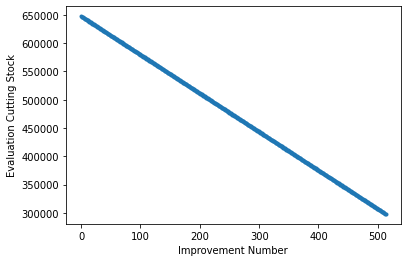

In [13]:
# Input 5
Stock_Length = 681
Requests = [5, 24, 198, 18, 5, 3, 3, 36, 2, 141, 3, 297, 23, 156, 162, 1, 24, 5, 76, 90, 13, 13, 6, 38, 19, 45, 2, 15, 20, 104, 123, 11, 4, 17, 49, 177, 2, 201, 10, 115, 105, 315, 6, 79, 464, 11, 6, 4, 327, 7, 29, 125, 72, 7, 2, 15, 34, 6, 7, 506, 7, 23, 8, 7, 22, 14, 44, 62, 33, 3, 544, 54, 152, 510, 20, 78, 4, 3, 5, 7, 6, 6, 83, 9, 140, 3, 43, 4, 9, 17, 30, 57, 14, 5, 36, 1, 56, 2, 259, 13, 13, 3, 120, 440, 3, 14, 15, 301, 8, 30, 91, 46, 149, 3, 2, 277, 5, 77, 39, 30, 69, 2, 2, 1, 224, 335, 79, 244, 113, 74, 250, 10, 344, 163, 282, 41, 1, 3, 2, 49, 12, 183, 7, 20, 123, 86, 332, 78, 592, 3, 255, 3, 8, 121, 7, 316, 8, 2, 51, 212, 112, 7, 83, 1, 70, 3, 2, 69, 3, 17, 143, 95, 455, 8, 20, 45, 8, 12, 2, 3, 12, 9, 15, 64, 8, 3, 174, 300, 2, 176, 91, 443, 4, 476, 587, 229, 3, 310, 10, 491, 2, 4, 25, 79, 22, 412, 162, 7, 153, 27, 260, 174, 121, 4, 59, 10, 450, 9, 341, 396, 103, 9, 141, 546, 2, 10, 114, 621, 69, 233, 47, 239, 3, 14, 40, 74, 15, 246, 52, 48, 13, 4, 630, 25, 32, 1, 6, 59, 67, 4, 2, 5, 274, 1, 316, 2, 1, 6, 298, 60, 9, 227, 70, 3, 41, 433, 148, 2, 76, 64, 4, 4, 21, 235, 86, 14, 245, 78, 163, 228, 242, 172, 558, 60, 263, 1, 7, 17, 11, 1, 10, 383, 176, 11, 3, 20, 9, 22, 446, 2, 83, 2, 9, 4, 2, 29, 511, 27, 389, 6, 86, 11, 14, 3, 79, 14, 2, 10, 2, 30, 109, 5, 11, 11, 79, 6, 51, 2, 54, 102, 34, 277, 98, 127, 184, 16, 6, 14, 122, 2, 2, 13, 6, 165, 1, 668, 3, 400, 2, 207, 1, 72, 282, 2, 2, 398, 75, 213, 91, 1, 60, 391, 189, 2, 5, 8, 420, 59, 16, 3, 73, 23, 127, 243, 2, 1, 33, 2, 48, 61, 50, 44, 338, 12, 17, 13, 73, 51, 4, 32, 40, 7, 85, 13, 82, 551, 8, 44, 156, 177, 5, 2, 2, 48, 171, 75, 3, 2, 8, 2, 2, 408, 117, 242, 69, 1, 6, 35, 1, 17, 52, 7, 2, 2, 3, 8, 5, 37, 14, 10, 147, 119, 129, 18, 5, 52, 41, 13, 268, 522, 213, 12, 15, 118, 26, 82, 155, 75, 4, 8, 171, 30, 74, 3, 2, 435, 11, 2, 19, 17, 238, 44, 111, 4, 1, 10, 3, 1, 6, 9, 8, 7, 15, 1, 242, 3, 48, 2, 142, 3, 1, 263, 127, 6, 18, 44, 25, 102, 381, 7, 113, 3, 3, 235, 2, 4, 308, 65, 173, 18, 57, 2, 29, 61, 197, 310, 72, 4, 2, 92, 13, 1, 1, 334, 4, 2, 3, 8, 25, 14, 1, 80, 373, 59, 234, 10, 1, 5, 281, 5, 14, 3, 33, 447, 47, 456, 9, 5, 52, 31, 503, 5, 200, 64, 7, 8, 9, 27, 12, 178, 268, 14, 181, 30, 620, 2, 73, 32, 320, 155, 4, 1, 2, 162, 43, 39, 232, 343, 3, 4, 24, 206, 70, 7, 6, 16, 195, 149, 397, 244, 68, 423, 5, 6, 4, 3, 4, 34, 47, 106, 636, 3, 5, 5, 4, 256, 26, 270, 2, 6, 31, 413, 280, 2, 132, 1, 54, 62, 411, 20, 22, 208, 14, 42, 167, 161, 164, 4, 560, 7, 4, 228, 45, 169, 260, 490, 2, 7, 9, 115, 1, 4, 93, 3, 12, 17, 179, 326, 32, 173, 97, 5, 1, 283, 9, 623, 5, 100, 45, 1, 1, 29, 282, 30, 353, 267, 195, 37, 266, 244, 53, 15, 11, 486, 4, 2, 9, 2, 8, 49, 6, 35, 22, 107, 108, 1, 80, 76, 1, 13, 1, 15, 3, 2, 7, 451, 12, 309, 31, 1, 12, 261, 98, 379, 5, 12, 6, 134, 40, 16, 17, 6, 20, 379, 13, 35, 247, 1, 26, 162, 209, 17, 2, 26, 30, 1, 3, 3, 84, 4, 111, 17, 7, 70, 191, 45, 77, 1, 24, 6, 200, 1, 9, 53, 9, 227, 3, 4, 6, 2, 90, 15, 163, 82, 636, 51, 60, 1, 201, 224, 50, 53, 67, 27, 64, 242, 26, 2, 6, 10, 4, 102, 2, 28, 54, 39, 279, 1, 458, 86, 154, 73, 383, 99, 1, 6, 9, 671, 146, 49, 8, 3, 62, 31, 119, 5, 1, 11, 1, 25, 166, 294, 454, 60, 2, 4, 136, 116, 2, 4, 259, 20, 85, 6, 156, 76, 105, 4, 5, 3, 3, 4, 150, 69, 281, 2, 3, 257, 4, 2, 10, 22, 2, 12, 2, 10, 30, 59, 57, 44, 9, 15, 115, 218, 590, 91, 177, 5, 35, 2, 15, 1, 1, 42, 67, 39, 121, 3, 445, 2, 8, 8, 223, 3, 5, 309, 373, 134, 104, 471, 58, 110, 2, 42, 176, 7, 2, 142, 41, 34, 14, 16, 16, 24, 19, 541, 10, 10, 62, 2, 28, 68, 455, 9, 158, 7, 13, 39, 6, 103, 1, 15, 2, 1, 20, 2, 28, 26, 3, 7, 274, 5, 211, 5, 1, 53, 1, 5, 195, 299, 97, 10, 6, 19, 22, 9, 156, 11, 264, 155, 101, 8, 4, 15, 1, 8, 4, 546, 4, 298, 25, 1, 6, 3, 12, 11, 1, 5, 5, 10, 45, 4, 148, 127, 28, 88, 2, 82, 29, 153, 8, 68, 195, 465, 74, 3, 211, 143, 40, 118, 2, 209, 5, 62, 26, 185, 133, 152, 10, 8, 17, 326, 493, 15, 94, 41, 1, 3, 137, 83, 328, 152, 77, 2, 1, 118, 1, 14, 17, 1, 81, 347, 166, 38, 1, 260, 13, 1, 3, 246, 6, 143, 2, 42, 4, 28, 3, 64, 20, 5, 11, 1, 207, 19, 181, 22, 161, 13, 2, 178, 257, 2, 310, 58, 4, 1, 54, 211, 88, 106, 7, 16, 26, 15, 2, 231, 284, 32, 39, 4, 180, 2, 1, 3, 57, 2, 5, 332, 19, 14, 6, 68, 13, 30, 31, 1, 42, 4, 19, 160, 18, 1, 93, 51, 60, 35, 598, 122, 4, 5, 23, 38, 18, 273, 140, 25, 9, 494, 9, 81, 27, 123, 2, 4, 63, 14, 14, 163, 96, 393, 3, 9, 4, 83, 158, 11, 140, 590, 193, 200, 148, 76, 2, 2, 24, 4, 3, 3, 4, 3, 5, 22, 121, 21, 30, 23, 20, 6, 8, 18, 11, 2, 134, 13, 12, 66, 12, 25, 25, 11, 132, 448, 23, 104, 4, 9, 1, 3, 11, 230, 47, 1, 10, 12, 107, 8, 66, 16, 1, 27, 5, 72, 1, 1, 7, 70, 100, 28, 121, 9, 306, 3, 218, 5, 2, 85, 234, 2, 33, 188, 220, 7, 128, 36, 14, 8, 20, 1, 52, 20, 3, 15, 1, 8, 1, 4, 79, 101, 6, 12, 2, 4, 11, 2, 5, 276, 2, 3, 87, 100, 4, 4, 45, 23, 100, 212, 9, 1, 7, 1, 181, 246, 212, 349, 106, 81, 8, 8, 227, 44, 179, 5, 4, 331, 24, 66, 3, 3, 258, 42, 175, 31, 3, 2, 1, 180, 109, 22, 156, 6, 353, 4, 18, 230, 13, 10, 2, 68, 3, 102, 362, 1, 207, 153, 57, 193, 6, 7, 85, 42, 4, 219, 38, 61, 220, 44, 3, 122, 8, 7, 5, 9, 88, 5, 1, 372, 3, 213, 3, 125, 345, 2, 120, 5, 29, 188, 81, 55, 6, 26, 2, 19, 516, 2, 47, 54, 19, 3, 11, 267, 3, 49, 102, 219, 161, 25, 17, 13, 3, 571, 8, 20, 22, 61, 1, 5, 202, 4, 289, 24, 48, 1, 166, 210, 9, 48, 5, 96, 73, 380, 4, 3, 42, 10, 2, 6, 6, 6, 161, 296, 108, 69, 523, 438, 19, 8, 1, 3, 2, 7, 1, 7, 25, 8, 4, 118, 3, 5, 28, 4, 469, 13, 125, 154, 26, 9, 158, 234, 42, 9, 220, 21, 4, 3, 30, 18, 52, 10, 403, 7, 81, 11, 82, 162, 15, 62, 284, 52, 65, 169, 171, 225, 5, 3, 14, 1, 41, 10, 380, 14, 20, 206, 20, 111, 408, 3, 4, 250, 21, 71, 22, 72, 379, 239, 2, 57, 44, 14, 3, 57, 1, 2, 12, 343, 641, 115, 121, 84, 3, 356, 205, 10, 5, 3, 68, 46, 2, 200, 2, 3, 5, 3, 288, 476, 30, 51, 22, 4, 70, 22, 106, 63, 14, 6, 82, 5, 16, 243, 13, 351, 63, 119, 12, 18, 7, 19, 8, 44, 143, 9, 79, 4, 18, 224, 8, 4, 9, 593, 8, 7, 7, 400, 282, 7, 6, 1, 16, 548, 43, 84, 7, 165, 2, 3, 436, 135, 11, 14, 3, 3, 11, 5, 154, 5, 25, 545, 4, 1, 1, 206, 49, 7, 2, 374, 11, 1, 120, 1, 3, 7, 599, 4, 63, 36, 64, 4, 232, 8, 59, 76, 27, 21, 4, 67, 23, 1, 41, 4, 17, 6, 38, 5, 180, 2, 6, 9, 42, 11, 9, 7, 23, 31, 5, 12, 25, 198, 73, 145, 2, 27, 8, 11, 122, 20, 14, 43, 59, 210, 50, 56, 2, 323, 478, 31, 22, 36, 1, 59, 7, 15, 8, 2, 10, 43, 2, 5, 279, 101, 553, 24, 90, 137, 471, 7, 8, 34, 494, 43, 5, 2, 174, 174, 46, 152, 4, 210, 13, 45, 5, 228, 6, 274, 3, 1, 469, 390, 15, 6, 665, 428, 19, 4, 29, 2, 303, 200, 238, 650, 147, 12, 26, 537, 13, 8, 375, 32, 12, 309, 8, 1, 92, 3, 24, 548, 3, 74, 20, 5, 17, 10, 35, 23, 1, 10, 60, 14, 82, 362, 7, 12, 2, 13, 400, 268, 5, 12, 13, 44, 129, 431, 78, 3, 2, 83, 274, 80, 2, 485, 5, 12, 6, 1, 4, 442, 53, 9, 96, 7, 26, 41, 500, 49, 35, 62, 25, 71, 23, 71, 10, 8, 280, 86, 59, 28, 32, 177, 353, 38, 470, 3, 8, 196, 8, 11, 563, 135, 108, 2, 9, 142, 81, 100, 10, 196, 171, 25, 615, 110, 21, 5, 317, 18, 17, 155, 11, 2, 14, 23, 189, 17, 6, 82, 5, 3, 180, 6, 4, 243, 52, 4, 11, 8, 120, 11, 320, 41, 264, 29, 92, 130, 78, 4, 251, 619, 42, 7, 72, 15, 2, 1, 257, 202, 42, 94, 91, 172, 316, 4, 18, 92, 3, 4, 69, 122, 4, 616, 26, 153, 288, 5, 70, 10, 12, 37, 154, 3, 5, 168, 105, 1, 230, 18, 6, 194, 358, 9, 7, 24, 219, 14, 5, 28, 74, 62, 56, 126, 16, 244, 158, 42, 4, 23, 130, 1, 6, 1, 2, 80, 8, 4, 6, 26, 23, 525, 11, 76, 299, 1, 622, 370, 22, 420, 16, 239, 30, 61, 144, 37, 247, 28, 101, 24, 5, 48, 8, 2, 35, 12, 4, 84, 13, 43, 97, 27, 3, 34, 180, 1, 11, 6, 98, 5, 373, 4, 312, 15, 13, 22, 12, 43, 112, 236, 47, 142, 90, 174, 86, 79, 3, 1, 57, 3, 37, 391, 250, 643, 15, 10, 463, 1, 30, 22, 1, 2, 1, 3, 135, 299, 9, 285, 488, 150, 4, 10, 53, 42, 150, 6, 2, 5, 5, 3, 7, 43, 1, 119, 245, 3, 10, 162, 8, 67, 101, 50, 332, 134, 184, 113, 2, 1, 96, 6, 119, 201, 6, 188, 4, 398, 160, 1, 24, 25, 308, 3, 230, 303, 4, 39, 2, 72, 70, 67, 6, 54, 95, 341, 159, 12, 252, 211, 17, 3, 27, 26, 236, 2, 151, 3, 8, 303, 203, 242, 311, 8, 235, 83, 6, 95, 115, 7, 43, 88, 7, 297, 1, 50, 286, 112, 115, 113, 181, 3, 660, 14, 74, 13, 69, 6, 156, 3, 1, 6, 12, 326, 172, 109, 2, 133, 11, 103, 58, 4, 6, 20, 14, 88, 10, 95, 52, 23, 1, 94, 80, 265, 233, 6, 14, 139, 251, 12, 1, 88, 41, 223, 9, 245, 53, 140, 153, 11, 53, 23, 7, 3, 155, 242, 287, 7, 20, 26, 10, 13, 1, 130, 21, 34, 446, 3, 31, 11, 13, 180, 19, 2, 143, 7, 22, 170, 74, 145, 4, 199, 71, 36, 1, 18, 2, 210, 70, 151, 219, 7, 179, 4, 4, 18, 5, 5, 1, 4, 92, 4, 7, 50, 1, 548, 5, 11, 6, 175, 26, 8, 197, 15, 5, 129, 7, 114, 162, 55, 4, 4, 512, 17, 33, 12, 39, 207, 88, 13, 11, 343, 12, 204, 1, 535, 209, 4, 14, 122, 206, 7, 146, 69, 67, 11, 9, 2, 114, 427, 8, 11, 92, 2, 10, 43, 178, 3, 160, 61, 4, 368, 279, 117, 438, 1, 23, 15, 2, 26, 1, 26, 16, 138, 458, 78, 28, 1, 3, 162, 28, 9, 61, 1, 37, 47, 3, 83, 24, 4, 5, 30, 2, 51, 6, 41, 159, 42, 43, 11, 516, 6, 124, 282, 197, 15, 20, 150, 153, 49, 8, 32, 118, 15, 62, 46, 1, 380, 11, 4, 16, 277, 7, 443, 190, 39, 139, 17, 139, 57, 14, 6, 99, 30, 180, 10, 143, 61, 609, 4, 204, 9, 98, 364, 108, 24, 7, 140, 2, 45, 277, 8, 1, 4, 15, 1, 291, 6, 70, 216, 146, 1, 495, 340, 126, 324, 292, 16, 15, 432, 57, 1, 12, 351, 14, 182, 12, 4, 450, 288, 6, 5, 4, 389, 217, 3, 90, 20, 643, 182, 5, 110, 463, 61, 238, 5, 7, 4, 20, 9, 5, 108, 1, 7, 7, 2, 77, 5, 251, 17, 11, 1, 3, 186, 21, 2, 6, 11, 221, 9, 33, 24, 30, 9, 4, 87, 379, 3, 60, 14, 229, 6, 466, 141, 13, 9, 108, 8, 5, 6, 1, 404, 93, 62, 129, 187, 3, 2, 72, 32, 473, 435, 29, 6, 18, 39, 388, 15, 15, 16, 9, 7, 61, 2, 181, 36, 4, 6, 23, 2, 83, 224, 145, 205, 4, 7, 3, 9, 2, 411, 12, 13, 280, 1, 10, 155, 7, 2, 7, 9, 116, 11, 32, 4, 47, 2, 1, 285, 5, 22, 259, 9, 343, 16, 338, 55, 59, 31, 1, 1, 1, 116, 50, 2, 9, 95, 2, 110, 1, 2, 24, 5, 72, 95, 8, 2, 101, 11, 410, 2, 12, 4, 13, 13, 33, 38, 4, 228, 82, 5, 106, 15, 93, 4, 4, 8, 12, 147, 464, 428, 588, 9, 156, 4, 9, 44, 175, 8, 12, 279, 96, 2, 3, 188, 6, 418, 7, 57, 147, 215, 15, 54, 128, 19, 10, 181, 20, 26, 1, 3, 13, 400, 3, 46, 165, 18, 1, 111, 153, 14, 175, 445, 249, 24, 172, 113, 2, 85, 141, 9, 165, 10, 8, 9, 17, 3, 69, 49, 123, 240, 13, 58, 16, 41, 28, 113, 5, 4, 11, 22, 9, 57, 74, 3, 127, 629, 9, 9, 54, 468, 545, 201, 407, 16, 3, 32, 178, 410, 380, 290, 2, 8, 126, 18, 26, 244, 43, 21, 185, 32, 15, 386, 78, 14, 23, 328, 584, 31, 3, 9, 17, 233, 363, 2, 5, 18, 162, 53, 281, 6, 77, 29, 1, 16, 283, 379, 29, 552, 15, 3, 15, 98, 15, 4, 13, 11, 19, 7, 11, 5, 6, 9, 223, 370, 53, 141, 29, 33, 168, 166, 2, 10, 11, 3, 15, 16, 122, 153, 2, 20, 139, 9, 320, 17, 95, 20, 6, 542, 142, 11, 5, 2, 104, 279, 7, 8, 1, 98, 15, 1, 102, 5, 6, 7, 14, 45, 11, 381, 3, 133, 14, 153, 92, 113, 4, 15, 132, 98, 560, 53, 8, 25, 365, 129, 4, 460, 223, 65, 17, 112, 2, 504, 44, 86, 50, 147, 1, 3, 17, 2, 113, 41, 7, 18, 15, 9, 20, 10, 4, 6, 205, 68, 13, 16, 6, 21, 4, 9, 3, 7, 230, 9, 450, 8, 21, 581, 3, 31, 123, 4, 23, 2, 39, 201, 4, 148, 157, 119, 97, 292, 1, 5, 5, 7, 230, 310, 47, 22, 395, 1, 57, 1, 1, 7, 79, 3, 110, 123, 7, 227, 167, 8, 2, 3, 37, 14, 63, 509, 23, 9, 3, 335, 191, 308, 3, 21, 47, 444, 10, 22, 296, 10, 2, 1, 14, 226, 16, 7, 5, 4, 27, 157, 4, 171, 112, 209, 21, 21, 121, 611, 9, 1, 23, 308, 1, 188, 177, 386, 18, 20, 47, 68, 4, 252, 42, 14, 476, 242, 14, 275, 7, 9, 73, 178, 356, 6, 13, 20, 348, 132, 2, 146, 37, 215, 310, 14, 57, 130, 17, 588, 2, 33, 3, 5, 25, 5, 3, 4, 68, 94, 2, 2, 335, 9, 105, 11, 18, 433, 9, 111, 37, 260, 3, 13, 64, 30, 188, 101, 3, 108, 199, 2, 5, 8, 6, 225, 1, 31, 1, 122, 17, 69, 1, 234, 113, 6, 14, 3, 69, 1, 10, 2, 2, 13, 34, 12, 335, 9, 50, 392, 69, 7, 3, 7, 30, 103, 2, 72, 188, 7, 6, 2, 133, 428, 8, 16, 17, 17, 195, 40, 8, 8, 26, 3, 32, 141, 6, 544, 5, 91, 85, 3, 29, 4, 15, 2, 6, 7, 339, 171, 8, 59, 1, 9, 281, 1, 5, 2, 120, 15, 162, 29, 1, 7, 8, 19, 49, 97, 29, 28, 1, 11, 651, 24, 61, 16, 245, 46, 39, 105, 9, 1, 2, 4, 65, 10, 7, 3, 53, 301, 183, 1, 2, 61, 84, 60, 2, 13, 127, 58, 219, 3, 10, 10, 2, 14, 2, 93, 504, 2, 38, 4, 7, 77, 157, 602, 4, 548, 291, 4, 2, 450, 240, 2, 115, 19, 161, 19, 490, 22, 2, 150, 509, 188, 108, 159, 25, 1, 524, 7, 19, 70, 10, 6, 31, 1, 32, 26, 9, 3, 2, 156, 259, 38, 468, 31, 184, 108, 85, 20, 19, 21, 5, 2, 13, 4, 17, 31, 2, 5, 44, 6, 631, 64, 3, 98, 2, 19, 407, 1, 276, 118, 102, 39, 4, 233, 62, 97, 2, 40, 13, 13, 40, 21, 234, 3, 253, 179, 196, 119, 8, 3, 8, 137, 23, 252, 548, 26, 46, 5, 14, 487, 4, 6, 69, 6, 11, 2, 162, 578, 2, 1, 54, 29, 436, 13, 643, 16, 87, 9, 28, 24, 2, 13, 23, 4, 3, 613, 24, 14, 8, 1, 17, 8, 96, 29, 85, 147, 91, 27, 10, 1, 130, 213, 25, 4, 28, 72, 3, 47, 3, 36, 143, 490, 244, 128, 580, 9, 86, 10, 39, 6, 94, 4, 207, 25, 6, 91, 2, 1, 22, 4, 7, 16, 6, 2, 57, 13, 76, 1, 8, 4, 182, 49, 105, 5, 211, 477, 360, 17, 5, 119, 10, 66, 132, 8, 3, 2, 16, 62, 4, 1, 6, 17, 55, 87, 253, 1, 7, 234, 263, 73, 14, 20, 65, 229, 4, 480, 99, 10, 313, 1, 269, 37, 1, 6, 7, 2, 11, 14, 151, 277, 3, 333, 334, 62, 1, 2, 2, 13, 196, 8, 2, 161, 3, 1, 5, 9, 1, 451, 6, 33, 3, 7, 184, 5, 13, 332, 144, 50, 9, 190, 2, 383, 4, 342, 11, 6, 93, 28, 14, 5, 94, 668, 16, 2, 97, 2, 37, 68, 6, 280, 421, 127, 109, 53, 66, 41, 10, 3, 3, 13, 42, 19, 6, 42, 2, 167, 212, 32, 206, 178, 123, 1, 15, 9, 156, 370, 4, 4, 34, 3, 22, 296, 6, 34, 1, 10, 196, 12, 254, 511, 92, 3, 89, 14, 620, 9, 168, 2, 12, 157, 2, 10, 80, 241, 23, 6, 7, 27, 52, 6, 1, 5, 10, 162, 10, 5, 146, 6, 255, 2, 3, 13, 11, 37, 1, 109, 2, 373, 51, 26, 278, 2, 43, 6, 2, 5, 3, 2, 4, 123, 17, 98, 173, 57, 7, 155, 5, 209, 104, 7, 370, 2, 40, 7, 13, 1, 3, 194, 184, 411, 34, 60, 4, 11, 23, 9, 7, 123, 42, 9, 100, 14, 398, 1, 88, 169, 29, 10, 200, 4, 15, 2, 20, 22, 3, 41, 47, 13, 179, 5, 178, 5, 1, 16, 20, 135, 78, 85, 181, 13, 70, 658, 4, 285, 34, 146, 8, 1, 1, 10, 567, 1, 8, 85, 4, 53, 79, 3, 6, 10, 8, 8, 57, 156, 2, 2, 16, 61, 9, 6, 8, 60, 16, 14, 108, 6, 10, 112, 243, 45, 6, 39, 6, 563, 22, 413, 1, 3, 163, 17, 4, 2, 2, 10, 1, 4, 17, 185, 242, 21, 189, 331, 3, 4, 24, 7, 33, 4, 67, 113, 5, 25, 41, 136, 18, 15, 4, 9, 157, 1, 81, 9, 517, 135, 313, 1, 24, 1, 3, 2, 81, 3, 6, 25, 254, 52, 15, 172, 173, 112, 81, 383, 156, 28, 54, 56, 317, 32, 480, 6, 61, 45, 206, 2, 235, 166, 9, 5, 23, 103, 103, 4, 67, 3, 1, 3, 115, 2, 28, 175, 487, 4, 9, 78, 177, 343, 2, 226, 582, 10, 160, 54, 353, 174, 3, 168, 1, 9, 21, 99, 180, 8, 108, 99, 2, 65, 138, 9, 19, 1, 46, 6, 13, 250, 177, 145, 6, 194, 57, 1, 138, 10, 473, 290, 340, 3, 23, 1, 249, 18, 116, 361, 295, 93, 4, 3, 4, 2, 21, 75, 11, 126, 2, 42, 325, 4, 17, 228, 15, 24, 3, 268, 48, 283, 3, 1, 589, 24, 2, 16, 11, 178, 160, 54, 35, 5, 1, 6, 38, 3, 541, 18, 54, 267, 9, 10, 9, 161, 10, 5, 557, 178, 9, 5, 59, 202, 175, 9, 479, 19, 259, 3, 229, 150, 126, 24, 15, 145, 1, 559, 599, 31, 27, 1, 20, 205, 4, 24, 23, 74, 267, 216, 58, 13, 32, 304, 178, 1, 3, 72, 48, 161, 1, 10, 61, 165, 10, 205, 8, 152, 8, 16, 393, 5, 30, 429, 1, 12, 211, 601, 7, 417, 313, 225, 10, 10, 6, 360, 21, 268, 184, 415, 188, 174, 113, 17, 480, 181, 153, 5, 125, 4, 13, 1, 85, 92, 16, 36, 1, 33, 2, 3, 214, 7, 1, 40, 227, 46, 2, 42, 244, 614, 5, 146, 13, 24, 3, 5, 34, 2, 4, 2, 11, 2, 7, 160, 19, 74, 173, 73, 34, 21, 19, 1, 2, 17, 10, 72, 2, 1, 151, 103, 61, 16, 8, 8, 220, 115, 186, 19, 3, 6, 507, 9, 89, 36, 41, 6, 2, 195, 55, 496, 1, 300, 37, 1, 321, 17, 7, 160, 200, 27, 15, 58, 4, 3, 1, 56, 209, 2, 317, 49, 157, 4, 520, 27, 8, 3, 252, 204, 4, 8, 25, 14, 1, 3, 2, 369, 4, 6, 9, 208, 3, 4, 414, 7, 95, 5, 7, 6, 8, 1, 7, 60, 88, 5, 25, 7, 39, 14, 3, 8, 187, 23, 624, 1, 5, 116, 123, 9, 120, 216, 38, 288, 133, 2, 35, 233, 16, 261, 86, 439, 423, 11, 330, 95, 24, 136, 4, 7, 163, 102, 6, 56, 155, 9, 4, 1, 61, 11, 557, 336, 106, 31, 77, 19, 71, 8, 101, 179, 397, 8, 4, 15, 26, 22, 38, 55, 209, 507, 173, 10, 19, 458, 3, 52, 486, 244, 4, 20, 77, 218, 31, 53, 6, 21, 112, 5, 242, 9, 33, 7, 3, 4, 8, 13, 8, 83, 165, 80, 5, 61, 8, 12, 3, 267, 45, 11, 2, 268, 184, 266, 3, 4, 113, 4, 9, 6, 81, 343, 213, 12, 38, 4, 5, 269, 12, 97, 10, 2, 118, 65, 142, 45, 1, 224, 3, 145, 13, 84, 15, 169, 184, 69, 97, 154, 9, 83, 1, 3, 49, 5, 3, 11, 168, 107, 653, 94, 111, 82, 2, 128, 8, 14, 2, 70, 188, 4, 4, 21, 24, 63, 6, 310, 9, 161, 608, 1, 101, 111, 86, 2, 11, 56, 5, 90, 1, 270, 195, 35, 9, 74, 93, 263, 28, 26, 2, 8, 5, 66, 162, 60, 513, 4, 97, 11, 55, 2, 46, 1, 18, 73, 369, 64, 49, 112, 1, 2, 10, 26, 23, 44, 2, 3, 38, 1, 2, 3, 142, 409, 158, 4, 1, 459, 10, 1, 194, 442, 198, 5, 385, 42, 25, 118, 471, 4, 1, 30, 5, 5, 29, 245, 15, 59, 2, 313, 53, 25, 245, 7, 73, 105, 1, 216, 4, 36, 3, 471, 20, 234, 8, 497, 290, 82, 1, 71, 5, 76, 66, 46, 294, 136, 33, 24, 9, 41, 215, 18, 19, 163, 3, 135, 99, 12, 21, 5, 5, 11, 507, 242, 3, 5, 7, 76, 13, 2, 255, 14, 15, 1, 8, 20, 445, 73, 1, 13, 4, 21, 336, 126, 451, 15, 109, 120, 7, 219, 4, 26, 18, 129, 84, 12, 19, 436, 2, 11, 167, 156, 58, 48, 31, 236, 36, 77, 3, 125, 3, 72, 61, 1, 126, 570, 3, 55, 13, 25, 13, 18, 52, 480, 78, 34, 35, 36, 274, 10, 275, 14, 103, 235, 3, 334, 70, 4, 11, 7, 22, 6, 13, 9, 20, 85, 7, 177, 5, 1, 15, 142, 22, 514, 25, 11, 148, 351, 136, 67, 99, 8, 106, 46, 41, 6, 423, 9, 303, 3, 76, 485, 2, 46, 9, 3, 101, 23, 6, 191, 10, 662, 6, 671, 29, 496, 18, 533, 271, 20, 53, 5, 592, 8, 13, 50, 7, 93, 3, 12, 35, 3, 8, 2, 12, 118, 276, 3, 3, 2, 22, 7, 45, 3, 164, 10, 111, 35, 31, 14, 27, 59, 76, 137, 90, 155, 11, 12, 39, 64, 100, 10, 2, 91, 12, 12, 27, 2, 6, 12, 1, 80, 13, 388, 233, 74, 41, 8, 20, 10, 2, 24, 19, 668, 16, 267, 72, 6, 18, 19, 9, 1, 28, 22, 48, 9, 4, 9, 114, 99, 28, 34, 112, 72, 256, 448, 37, 81, 7, 6, 102, 5, 37, 20, 2, 196, 20, 128, 14, 419, 35, 8, 1, 37, 5, 37, 45, 5, 17, 2, 517, 150, 2, 334, 6, 1, 508, 181, 236, 16, 510, 32, 81, 46, 17, 79, 558, 21, 16, 83, 121, 3, 17, 71, 5, 19, 608, 35, 62, 7, 1, 11, 24, 49, 269, 80, 5, 11, 7, 4, 358, 9, 23, 288, 6, 58, 37, 16, 112, 20, 178, 22, 387, 3, 1, 24, 7, 196, 63, 232, 389, 610, 85, 1, 6, 158, 3, 17, 16, 8, 143, 17, 11, 68, 35, 9, 57, 56, 124, 9, 65, 4, 9, 494, 310, 36, 5, 304, 24, 57, 18, 36, 144, 193, 297, 11, 3, 7, 30, 577, 3, 38, 20, 4, 122, 17, 449, 259, 411, 17, 16, 289, 11, 82, 37, 189, 9, 73, 644, 24, 73, 8, 173, 7, 126, 4, 29, 17, 312, 140, 29, 47, 143, 15, 5, 12, 7, 431, 76, 41, 5, 87, 106, 5, 170, 25, 9, 13, 86, 58, 2, 88, 21, 1, 18, 215, 206, 69, 249, 8, 1, 2, 20, 13, 39, 288, 71, 39, 11, 1, 81, 1, 13, 520, 35, 597, 5, 8, 12, 12, 5, 23, 7, 13, 539, 19, 42, 98, 2, 11, 3, 74, 4, 9, 2, 2, 39, 162, 3, 9, 2, 4, 14, 212, 19, 3, 676, 129, 296, 2, 10, 55, 31, 4, 2, 10, 381, 30, 130, 2, 13, 77, 3, 17, 397, 1, 15, 7, 25, 3, 45, 248, 96, 2, 108, 6, 10, 6, 21, 166, 9, 2, 14, 189, 14, 24, 2, 50, 2, 11, 1, 28, 438, 404, 8, 352, 251, 1, 71, 2, 6, 22, 22, 583, 7, 72, 45, 1, 28, 79, 2, 4, 468, 32, 124, 13, 6, 292, 5, 70, 3, 13, 1, 351, 10, 30, 2, 174, 1, 88, 109, 5, 1, 17, 93, 16, 575, 6, 294, 633, 14, 114, 2, 15, 36, 1, 21, 32, 16, 245, 211, 549, 8, 115, 19, 63, 1, 20, 162, 142, 4, 25, 19, 3, 77, 2, 2, 251, 25, 4, 3, 157, 96, 35, 5, 172, 4, 2, 12, 18, 500, 12, 3, 38, 45, 7, 23, 193, 146, 88, 2, 116, 41, 169, 338, 35, 4, 321, 85, 2, 1, 9, 6, 102, 1, 1, 2, 47, 2, 130, 29, 69, 486, 574, 566, 99, 61, 510, 68, 125, 12, 1, 4, 5, 10, 128, 270, 30, 390, 1, 3, 3, 11, 27, 19, 5, 1, 14, 32, 362, 43, 490, 107, 1, 135, 26, 35, 12, 21, 35, 1, 546, 2, 8, 50, 11, 85, 1, 7, 13, 16, 85, 5, 26, 119, 232, 3, 263, 224, 132, 268, 130, 280, 29, 257, 292, 8, 21, 22, 578, 182, 7, 2, 2, 6, 13, 13, 1, 5, 21, 118, 56, 2, 88, 5, 6, 206, 14, 3, 370, 1, 12, 14, 7, 59, 138, 34, 70, 1, 155, 7, 52, 291, 29, 74, 40, 9, 1, 308, 13, 72, 24, 146, 106, 12, 63, 193, 1, 18, 70, 8, 232, 17, 8, 152, 3, 3, 3, 17, 8, 176, 145, 2, 403, 22, 40, 4, 257, 91, 2, 38, 4, 271, 25, 6, 8, 303, 90, 6, 239, 5, 7, 2, 9, 7, 30, 487, 46, 4, 466, 46, 91, 1, 247, 23, 358, 2, 4, 6, 357, 2, 138, 3, 56, 42, 3, 5, 122, 4, 172, 4, 6, 4, 37, 24, 36, 15, 19, 7, 9, 6, 8, 132, 143, 1, 255, 11, 198, 28, 2, 422, 69, 371, 499, 255, 181, 9, 20, 8, 211, 219, 165, 276, 7, 141, 277, 15, 83, 83, 130, 107, 283, 7, 17, 15, 61, 10, 266, 596, 209, 7, 107, 591, 1, 23, 49, 54, 23, 5, 170, 234, 74, 30, 97, 15, 2, 117, 19, 255, 2, 14, 18, 87, 7, 175, 65, 160, 131, 5, 2, 12, 23, 135, 12, 101, 49, 9, 1, 215, 44, 9, 56, 33, 8, 10, 113, 12, 15, 11, 8, 222, 35, 216, 15, 12, 20, 209, 16, 1, 4, 19, 9, 564, 35, 31, 2, 4, 464, 81, 332, 6, 465, 94, 1, 3, 7, 193, 422, 4, 105, 1, 11, 18, 188, 8, 266, 23, 16, 194, 230, 2, 12, 650, 4, 137, 2, 13, 5, 8, 27, 2, 178, 11, 115, 128, 597, 25, 4, 154, 7, 11, 4, 180, 153, 3, 336, 21, 90, 2, 7, 104, 10, 228, 35, 11, 270, 294, 232, 66, 182, 5, 447, 3, 94, 410, 70, 4, 9, 21, 247, 137, 3, 109, 5, 6, 8, 91, 125, 3, 289, 9, 69, 15, 15, 3, 7, 11, 2, 262, 6, 40, 201, 56, 3, 10, 211, 3, 27, 25, 41, 213, 5, 47, 3, 69, 24, 57, 34, 21, 11, 72, 5, 8, 44, 22, 41, 4, 4, 107, 601, 37, 73, 187, 15, 9, 566, 410, 111, 37, 11, 464, 26, 5, 142, 119, 4, 3, 118, 7, 1, 1, 3, 101, 157, 23, 3, 7, 362, 7, 9, 94, 25, 93, 458, 117, 63, 18, 444, 345, 215, 7, 12, 3, 64, 156, 249, 2, 68, 8, 222, 1, 6, 40, 305, 201, 13, 12, 6, 7, 17, 30, 7, 75, 12, 3, 95, 2, 2, 70, 12, 20, 1, 4, 8, 89, 2, 153, 8, 4, 7, 212, 2, 33, 5, 7, 2, 3, 8, 16, 7, 161, 3, 189, 365, 139, 3, 170, 150, 23, 2, 6, 1, 9, 7, 1, 49, 7, 81, 36, 105, 7, 162, 6, 207, 1, 65, 21, 288, 24, 180, 120, 1, 68, 3, 84, 17, 129, 4, 4, 44, 19, 9, 80, 198, 159, 9, 51, 274, 1, 3, 27, 1, 31, 60, 37, 23, 26, 9, 103, 59, 4, 245, 2, 18, 8, 6, 6, 43, 3, 1, 78, 20, 68, 260, 154, 141, 40, 16, 3, 7, 19, 29, 4, 10, 44, 32, 246, 21, 4, 19, 58, 22, 45, 301, 89, 5, 8, 142, 477, 8, 94, 1, 146, 81, 199, 74, 44, 159, 14, 19, 22, 6, 192, 14, 17, 15, 10, 76, 11, 6, 48, 197, 8, 119, 3, 11, 21, 31, 4, 17, 36, 11, 21, 17, 2, 76, 5, 2, 49, 11, 13, 181, 93, 14, 8, 262, 57, 1, 5, 1, 20, 78, 292, 3, 3, 2, 129, 1, 10, 131, 5, 5, 13, 206, 459, 94, 12, 144, 301, 2, 8, 1, 3, 113, 257, 37, 46, 250, 15, 35, 2, 282, 21, 2, 4, 170, 152, 18, 23, 19, 5, 372, 1, 285, 42, 653, 18, 33, 3, 20, 78, 141, 37, 356, 19, 7, 4, 36, 7, 13, 1, 274, 17, 24, 81, 154, 276, 3, 1, 3, 11, 5, 4, 1, 4, 56, 378, 4, 17, 3, 15, 65, 268, 2, 93, 17, 6, 411, 5, 264, 7, 12, 210, 7, 479, 72, 35, 3, 7, 17, 66, 80, 9, 2, 11, 424, 10, 261, 2, 145, 26, 18, 150, 1, 9, 289, 76, 8, 6, 11, 389, 62, 71, 31, 58, 5, 109, 26, 13, 15, 8, 50, 146, 67, 3, 1, 87, 11, 9, 5, 589, 17, 240, 370, 22, 371, 15, 157, 117, 267, 222, 1, 255, 48, 119, 9, 1, 136, 12, 155, 343, 309, 19, 251, 1, 16, 6, 1, 119, 7, 162, 11, 7, 6, 16, 8, 6, 33, 160, 66, 434, 8, 17, 20, 3, 4, 21, 73, 296, 1, 10, 72, 15, 202, 21, 409, 2, 6, 24, 84, 41, 8, 62, 3, 275, 90, 273, 19, 359, 166, 38, 7, 7, 2, 230, 84, 6, 188, 89, 71, 164, 7, 100, 1, 568, 18, 244, 103, 439, 164, 10, 4, 204, 2, 52, 47, 5, 7, 3, 177, 1, 6, 7, 11, 5, 254, 201, 15, 4, 104, 1, 16, 2, 209, 6, 153, 32, 6, 11, 19, 11, 190, 81, 29, 3, 4, 1, 177, 7, 77, 9, 10, 1, 594, 2, 45, 76, 28, 2, 1, 3, 1, 43, 59, 18, 13, 7, 12, 139, 25, 4, 16, 32, 7, 22, 14, 16, 16, 75, 7, 7, 5, 2, 6, 9, 172, 26, 5, 85, 1, 3, 207, 180, 26, 3, 26, 8, 13, 56, 2, 6, 95, 40, 4, 75, 109, 57, 3, 196, 4, 78, 8, 60, 552, 40, 5, 5, 7, 453, 223, 28, 174, 528, 77, 2, 13, 6, 351, 443, 47, 108, 116, 166, 5, 2, 32, 18, 6, 10, 1, 119, 3, 8, 119, 7, 35, 10, 598, 303, 168, 6, 9, 15, 92, 8, 6, 44, 1, 57, 2, 2, 17, 15, 22, 19, 1, 121, 3, 89, 77, 2, 55, 4, 8, 2, 292, 77, 47, 89, 4, 164, 27, 58, 7, 32, 28, 1, 213, 32, 7, 13, 6, 17, 5, 281, 285, 8, 1, 58, 7, 61, 3, 609, 24, 191, 3, 6, 16, 10, 2, 89, 10, 2, 7, 2, 45, 2, 270, 94, 396, 76, 14, 9, 233, 7, 15, 21, 2, 102, 171, 130, 42, 15, 15, 557, 14, 32, 219, 6, 14, 11, 84, 361, 3, 114, 4, 10, 24, 438, 12, 5, 7, 214, 615, 4, 250, 2, 53, 146, 5, 7, 31, 13, 511, 400, 270, 7, 3, 115, 6, 142, 9, 53, 11, 3, 162, 309, 40, 4, 117, 18, 301, 1, 29, 339, 117, 133, 2, 6, 110, 88, 25, 24, 2, 18, 400, 129, 101, 5, 3, 6, 28, 139, 266, 207, 2, 310, 187, 5, 562, 4, 77, 17, 69, 1, 342, 225, 515, 10, 11, 15, 21, 5, 6, 16, 24, 14, 131, 2, 1, 292, 462, 9, 45, 12, 15, 11, 3, 60, 18, 73, 415, 14, 51, 343, 30, 1, 155, 417, 56, 9, 1, 1, 159, 595, 126, 11, 28, 26, 56, 31, 1, 9, 112, 185, 13, 3, 7, 548, 21, 21, 1, 52, 472, 171, 163, 271, 123, 110, 35, 5, 29, 97, 5, 37, 359, 652, 176, 4, 7, 8, 12, 8, 2, 6, 3, 6, 434, 120, 299, 199, 366, 17, 287, 161, 98, 56, 34, 36, 29, 22, 12, 4, 6, 93, 234, 274, 13, 8, 6, 591, 112, 7, 29, 488, 23, 7, 3, 72, 95, 34, 7, 74, 1, 51, 9, 140, 439, 352, 5, 1, 10, 2, 74, 182, 72, 233, 547, 338, 104, 23, 35, 3, 151, 254, 4, 94, 113, 14, 4, 115, 1, 10, 5, 56, 3, 11, 208, 9, 6, 10, 8, 6, 79, 88, 36, 3, 61, 17, 4, 4, 214, 120, 236, 8, 591, 1, 21, 133, 591, 3, 13, 18, 1, 109, 23, 1, 39, 172, 218, 2, 141, 330, 100, 68, 409, 34, 19, 8, 563, 23, 6, 8, 6, 2, 136, 10, 8, 8, 10, 50, 233, 16, 3, 2, 344, 69, 66, 32, 3, 57, 1, 160, 10, 120, 3, 239, 17, 3, 3, 41, 2, 198, 5, 17, 15, 3, 95, 292, 220, 4, 7, 3, 2, 9, 28, 8, 3, 26, 64, 148, 156, 177, 14, 158, 23, 2, 83, 13, 1, 162, 3, 83, 9, 7, 11, 3, 348, 1, 429, 1, 344, 2, 167, 12, 1, 5, 13, 6, 2, 45, 145, 14, 64, 1, 3, 7, 2, 6, 221, 3, 66, 9, 7, 120, 10, 445, 1, 99, 36, 49, 7, 5, 248, 20, 14, 2, 18, 192, 11, 310, 63, 95, 1, 209, 64, 4, 609, 50, 9, 10, 55, 5, 7, 7, 1, 4, 5, 3, 405, 5, 160, 2, 250, 91, 3, 317, 20, 162, 5, 22, 133, 14, 7, 6, 285, 3, 514, 207, 119, 2, 94, 5, 447, 81, 377, 9, 18, 151, 23, 144, 22, 408, 17, 5, 129, 45, 252, 290, 123, 46, 3, 5, 657, 28, 54, 3, 17, 1, 74, 5, 343, 252, 18, 22, 11, 9, 4, 10, 7, 176, 54, 10, 68, 456, 205, 499, 5, 18, 6, 290, 276, 1, 35, 2, 43, 230, 267, 350, 23, 14, 10, 9, 27, 35, 420, 30, 100, 234, 302, 166, 40, 61, 9, 75, 262, 558, 671, 2, 11, 159, 39, 56, 676, 158, 48, 11, 12, 16, 378, 7, 277, 7, 2, 13, 121, 477, 247, 127, 151, 5, 157, 80, 4, 5, 10, 586, 10, 6, 2, 46, 76, 5, 4, 5, 523, 65, 5, 443, 10, 4, 6, 6, 7, 431, 468, 40, 234, 50, 15, 175, 4, 10, 70, 224, 388, 140, 533, 236, 182, 4, 73, 268, 2, 1, 266, 4, 418, 21, 4, 187, 3, 14, 2, 231, 4, 485, 2, 6, 11, 300, 23, 72, 19, 284, 50, 7, 324, 12, 155, 637, 533, 4, 334, 35, 4, 49, 222, 7, 335, 205, 29, 6, 101, 96, 19, 24, 4, 2, 6, 6, 2, 73, 91, 5, 1, 62, 277, 9, 131, 5, 14, 216, 162, 14, 108, 47, 2, 587, 262, 193, 15, 10, 8, 31, 436, 45, 40, 17, 11, 18, 12, 32, 667, 24, 37, 20, 9, 25, 1, 4, 85, 7, 19, 13, 194, 3, 10, 9, 1, 173, 1, 14, 23, 66, 352, 20, 3, 251, 6, 5, 86, 38, 152, 164, 14, 14, 62, 79, 13, 363, 413, 238, 9, 13, 88, 82, 237, 316, 117, 314, 174, 30, 148, 76, 3, 3, 13, 5, 5, 11, 357, 5, 7, 51, 99, 133, 25, 2, 448, 43, 53, 247, 379, 27, 12, 30, 164, 2, 15, 20, 39, 83, 174, 10, 45, 229, 6, 94, 615, 117, 172, 304, 195, 14, 5, 176, 12, 5, 8, 76, 4, 13, 14, 3, 8, 2, 8, 12, 4, 86, 539, 316, 123, 36, 3, 5, 48, 6, 16, 55, 6, 389, 4, 8, 3, 12, 2, 20, 3, 6, 1, 9, 237, 28, 2, 1, 2, 35, 208, 367, 16, 8, 525, 84, 169, 48, 55, 5, 11, 83, 4, 10, 17, 381, 7, 4, 116, 4, 41, 3, 122, 9, 22, 3, 31, 85, 2, 1, 304, 7, 17, 4, 13, 28, 9, 240, 7, 265, 19, 170, 236, 257, 31, 14, 38, 159, 2, 6, 17, 85, 2, 24, 5, 217, 11, 6, 52, 198, 31, 4, 15, 272, 48, 48, 119, 8, 22, 8, 6, 2, 94, 174, 11, 34, 4, 68, 12, 2, 130, 3, 8, 1, 44, 13, 47, 81, 1, 319, 46, 64, 4, 16, 67, 151, 7, 48, 13, 323, 90, 34, 234, 5, 44, 246, 4, 1, 429, 1, 3, 5, 9, 1, 259, 2, 518, 18, 7, 18, 3, 195, 8, 1, 37, 3, 2, 402, 344, 238, 7, 23, 22, 328, 6, 17, 36, 2, 128, 4, 2, 282, 1, 435, 2, 5, 28, 23, 97, 3, 152, 57, 512, 9, 33, 2, 433, 36, 18, 2, 127, 3, 1, 17, 159, 19, 95, 77, 1, 10, 10, 7, 1, 29, 77, 1, 201, 25, 27, 7, 9, 19, 131, 393, 2, 8, 116, 6, 73, 13, 542, 14, 120, 355, 23, 163, 3, 2, 5, 5, 13, 62, 214, 3, 11, 41, 11, 17, 13, 155, 10, 12, 4, 32, 38, 2, 327, 57, 6, 55, 288, 16, 26, 6, 152, 386, 1, 5, 27, 389, 57, 9, 27, 7, 7, 27, 336, 126, 133, 278, 5, 7, 3, 2, 2, 408, 142, 16, 544, 159, 350, 1, 5, 1, 3, 26, 2, 1, 119, 235, 6, 71, 411, 475, 6, 9, 3, 4, 2, 10, 3, 2, 22, 3, 226, 56, 71, 95, 30, 24, 54, 15, 7, 12, 4, 8, 232, 9, 4, 20, 239, 245, 109, 305, 23, 601, 76, 24, 389, 12, 461, 3, 6, 78, 114, 17, 29, 1, 261, 1, 92, 74, 232, 156, 11, 8, 389, 257, 2, 8, 30, 89, 11, 143, 1, 126, 100, 10, 10, 3, 11, 376, 9, 3, 69, 6, 1, 288, 1, 372, 13, 10, 58, 437, 1, 64, 2, 77, 7, 68, 5, 9, 3, 236, 2, 262, 31, 9, 108, 1, 141, 1, 127, 80, 12, 4, 4, 12, 6, 145, 227, 46, 8, 1, 6, 10, 37, 243, 6, 8, 5, 74, 104, 5, 321, 2, 18, 2, 149, 164, 23, 8, 39, 1, 93, 27, 8, 319, 427, 29, 458, 9, 397, 194, 6, 2, 85, 8, 2, 7, 218, 2, 3, 50, 161, 67, 11, 438, 12, 23, 156, 35, 66, 2, 145, 1, 9, 10, 3, 79, 567, 3, 240, 34, 129, 20, 5, 498, 3, 189, 5, 40, 34, 27, 69, 4, 25, 26, 1, 1, 225, 182, 4, 5, 1, 154, 5, 64, 3, 2, 5, 484, 5, 9, 3, 4, 11, 382, 1, 225, 176, 5, 534, 13, 7, 98, 13, 72, 581, 71, 52, 103, 16, 31, 31, 10, 1, 56, 248, 2, 4, 7, 11, 142, 305, 24, 7, 7, 1, 1, 323, 6, 105, 3, 6, 10, 29, 82, 156, 15, 3, 188, 44, 420, 125, 286, 14, 14, 5, 9, 604, 233, 19, 108, 10, 499, 78, 49, 1, 17, 676, 30, 1, 335, 3, 108, 4, 187, 669, 179, 4, 135, 11, 507, 65, 131, 62, 14, 265, 26, 87, 6, 179, 90, 55, 6, 11, 4, 9, 428, 3, 79, 189, 6, 4, 485, 171, 2, 57, 8, 137, 194, 10, 1, 201, 23, 128, 8, 8, 2, 3, 4, 21, 7, 130, 95, 8, 3, 161, 31, 65, 20, 428, 10, 5, 23, 22, 418, 8, 3, 336, 349, 219, 36, 177, 78, 649, 116, 171, 184, 347, 3, 85, 4, 3, 2, 3, 36, 81, 3, 128, 76, 125, 31, 26, 33, 328, 166, 9, 16, 14, 5, 163, 433, 118, 16, 13, 5, 15, 10, 53, 3, 2, 537, 9, 13, 156, 74, 39, 25, 360, 5, 63, 43, 402, 242, 16, 174, 4, 10, 3, 10, 11, 8, 1, 238, 241, 166, 65, 95, 15, 1, 12, 46, 1, 21, 27, 18, 1, 11, 3, 14, 72, 58, 671, 428, 10, 15, 5, 4, 70, 29, 6, 12, 3, 231, 352, 13, 55, 46, 69, 453, 12, 16, 6, 13, 45, 114, 22, 294, 8, 4, 1, 13, 5, 22, 265, 1, 379, 232, 63, 117, 365, 20, 14, 299, 6, 56, 1, 131, 3, 10, 1, 16, 9, 21, 7, 5, 2, 283, 2, 164, 78, 15, 65, 34, 114, 27, 96, 184, 184, 4, 254, 636, 11, 288, 11, 22, 22, 351, 2, 161, 138, 17, 73, 3, 466, 169, 298, 25, 143, 27, 65, 73, 525, 117, 234, 26, 121, 14, 29, 39, 674, 7, 79, 263, 498, 4, 459, 47, 5, 160, 42, 1, 3, 5, 128, 236, 614, 60, 17, 300, 7, 353, 3, 21, 161, 267, 80, 376, 36, 3, 573, 199, 6, 21, 1, 14, 36, 1, 32, 7, 462, 3, 15, 15, 20, 3, 1, 51, 3, 31, 25, 143, 598, 41, 39, 68, 104, 209, 175, 259, 38, 15, 106, 2, 72, 21, 1, 2, 32, 9, 12, 8, 127, 3, 505, 2, 160, 586, 12, 8, 136, 83, 10, 157, 4, 1, 5, 1, 312, 33, 15, 74, 476, 53, 28, 240, 311, 86, 7, 157, 12, 17, 8, 6, 267, 7, 7, 490, 1, 48, 360, 20, 14, 5, 8, 158, 20, 11, 29, 5, 52, 3, 2, 4, 47, 542, 114, 176, 14, 266, 33, 194, 2, 18, 4, 10, 2, 2, 14, 45, 16, 3, 1, 4, 138, 27, 17, 258, 2, 4, 26, 67, 92, 121, 146, 20, 183, 42, 31, 257, 380, 4, 619, 277, 16, 191, 1, 8, 249, 29, 160, 5, 1, 60, 460, 28, 25, 598, 171, 25, 113, 43, 329, 2, 5, 19, 5, 412, 1, 24, 275, 69, 424, 2, 1, 6, 419, 25, 407, 49, 4, 470, 33, 2, 5, 264, 421, 3, 227, 84, 15, 22, 285, 332, 37, 269, 1, 126, 38, 11, 2, 20, 513, 26, 372, 492, 17, 1, 74, 137, 19, 14, 19, 35, 6, 152, 2, 5, 15, 118, 80, 43, 8, 109, 6, 58, 11, 35, 424, 15, 391, 236, 5, 6, 4, 41, 75, 2, 2, 39, 31, 12, 278, 37, 41, 22, 222, 109, 2, 2, 32, 190, 2, 90, 126, 185, 10, 5, 212, 20, 2, 11, 9, 11, 14, 9, 40, 3, 101, 131, 87, 8, 297, 65, 183, 392, 174, 489, 96, 15, 1, 534, 33, 15, 6, 100, 1, 4, 3, 44, 132, 81, 12, 260, 48, 9, 228, 3, 43, 13, 151, 5, 17, 1, 38, 7, 260, 15, 211, 47, 20, 87, 8, 6, 563, 262, 93, 87, 55, 212, 15, 8, 6, 46, 45, 80, 232, 3, 20, 102, 610, 23, 3, 2, 169, 32, 46, 90, 9, 17, 12, 242, 44, 160, 251, 1, 11, 116, 8, 52, 368, 4, 127, 58, 85, 5, 7, 314, 58, 8, 2, 497, 15, 58, 186, 5, 135, 43, 93, 270, 8, 25, 167, 2, 3, 13, 4, 5, 9, 11, 92, 18, 15, 1, 54, 6, 27, 18, 15, 382, 50, 174, 4, 2, 302, 1, 12, 223, 7, 1, 507, 58, 2, 13, 266, 428, 237, 237, 40, 5, 3, 34, 63, 27, 4, 143, 10, 52, 14, 26, 17, 1, 4, 20, 5, 281, 2, 27, 231, 1, 4, 137, 35, 25, 109, 6, 11, 34, 137, 84, 20, 587, 7, 9, 8, 49, 298, 16, 23, 31, 66, 9, 679, 54, 2, 9, 19, 17, 5, 8, 3, 124, 111, 24, 9, 20, 4, 130, 227, 1, 5, 71, 4, 8, 622, 123, 98, 11, 4, 1, 10, 649, 13, 6, 90, 69, 96, 2, 104, 6, 20, 2, 543, 4, 34, 2, 6, 118, 8, 360, 257, 298, 363, 123, 14, 16, 5, 432, 223, 7, 75, 26, 106, 76, 4, 4, 6, 10, 7, 465, 198, 35, 17, 4, 5, 2, 1, 51, 10, 15, 11, 158, 167, 2, 19, 21, 2, 7, 13, 464, 7, 371, 135, 8, 1, 22, 9, 602, 20, 30, 4, 2, 55, 239, 6, 232, 12, 9, 38, 200, 12, 2, 11, 3, 99, 1, 193, 4, 107, 7, 4, 13, 19, 639, 39, 4, 212, 14, 14, 43, 147, 568, 7, 315, 5, 95, 28, 49, 47, 21, 14, 12, 16, 138, 340, 10, 212, 6, 7, 3, 12, 1, 24, 6, 283, 10, 5, 92, 13, 11, 179, 69, 23, 24, 116, 8, 2, 107, 7, 6, 179, 9, 35, 15, 376, 7, 9, 191, 151, 3, 242, 37, 6, 496, 352, 19, 6, 13, 8, 17, 14, 220, 536, 259, 15, 129, 16, 11, 4, 267, 10, 115, 56, 107, 8, 8, 120, 1, 1, 11, 205, 16, 1, 145, 289, 117, 273, 9, 20, 58, 17, 13, 5, 6, 39, 132, 16, 102, 21, 181, 104, 18, 117, 118, 1, 1, 17, 67, 261, 25, 30, 4, 4, 17, 7, 37, 116, 28, 2, 35, 9, 10, 294, 29, 148, 1, 9, 3, 409, 5, 164, 1, 134, 1, 487, 41, 53, 301, 7, 332, 21, 4, 563, 5, 19, 3, 524, 13, 4, 533, 1, 336, 2, 9, 2, 10, 2, 20, 61, 152, 128, 6, 2, 50, 82, 17, 3, 22, 15, 11, 4, 39, 2, 10, 87, 8, 6, 2, 470, 148, 129, 274, 136, 153, 589, 43, 4, 9, 2, 4, 14, 28, 236, 152, 473, 21, 68, 1, 8, 1, 5, 54, 50, 382, 11, 34, 98, 6, 82, 654, 13, 112, 64, 8, 6, 1, 81, 270, 81, 6, 396, 63, 40, 27, 3, 4, 256, 4, 6, 10, 11, 12, 1, 34, 28, 203, 120, 70, 43, 5, 63, 3, 144, 11, 69, 212, 3, 9, 15, 548, 3, 9, 9, 6, 16, 9, 4, 505, 37, 16, 4, 87, 5, 7, 2, 216, 4, 239, 84, 1, 7, 296, 14, 6, 2, 155, 51, 5, 4, 6, 195, 8, 2, 123, 7, 74, 89, 3, 17, 2, 37, 9, 11, 1, 64, 12, 564, 9, 5, 330, 501, 434, 5, 123, 17, 3, 15, 514, 52, 10, 599, 109, 180, 3, 56, 448, 168, 4, 24, 21, 286, 214, 134, 169, 1, 1, 5, 5, 404, 62, 10, 247, 17, 24, 45, 8, 59, 146, 17, 67, 2, 4, 304, 6, 9, 117, 4, 10, 245, 260, 14, 188, 572, 19, 5, 32, 10, 1, 254, 60, 49, 5, 236, 29, 108, 269, 10, 5, 110, 616, 114, 50, 13, 143, 4, 78, 21, 51, 88, 6, 32, 80, 12, 332, 33, 3, 2, 166, 227, 8, 2, 2, 598, 75, 47, 145, 6, 402, 413, 39, 7, 4, 98, 58, 496, 1, 166, 7, 147, 67, 32, 14, 126, 16, 8, 17, 168, 13, 78, 99, 18, 6, 70, 100, 77, 22, 228, 3, 4, 10, 2, 11, 12, 2, 8, 7, 333, 8, 8, 5, 137, 7, 3, 85, 3, 14, 507, 200, 4, 141, 19, 265, 7, 6, 1, 15, 70, 61, 13, 2, 4, 8, 67, 5, 98, 17, 10, 7, 36, 41, 9, 1, 175, 245, 340, 2, 130, 6, 254, 106, 9, 43, 1, 157, 97, 588, 640, 8, 7, 65, 41, 7, 363, 76, 19, 358, 28, 6, 8, 21, 335, 87, 11, 138, 215, 4, 54, 2, 1, 188, 18, 4, 12, 211, 74, 500, 42, 96, 140, 11, 56, 5, 290, 28, 128, 3, 8, 4, 82, 13, 35, 372, 665, 14, 139, 5, 116, 2, 24, 14, 6, 32, 19, 7, 174, 1, 10, 9, 6, 5, 44, 14, 59, 41, 77, 3, 492, 1, 12, 9, 166, 8, 7, 7, 422, 12, 9, 27, 29, 8, 3, 19, 225, 3, 226, 14, 11, 174, 94, 25, 13, 202, 7, 18, 28, 106, 8, 85, 6, 4, 644, 486, 3, 182, 114, 187, 121, 245, 83, 21, 439, 12, 412, 16, 3, 10, 4, 20, 454, 182, 5, 3, 4, 9, 14, 3, 5, 1, 11, 195, 105, 12, 39, 4, 138, 3, 298, 4, 12, 5, 106, 42, 225, 1, 93, 44, 16, 87, 402, 22, 6, 1, 157, 237, 61, 159, 9, 4, 266, 2, 448, 27, 86, 9, 590, 283, 2, 428, 1, 95, 149, 10, 16, 262, 5, 5, 22, 16, 135, 40, 5, 1, 6, 6, 8, 7, 42, 249, 112, 1, 104, 291, 302, 430, 31, 8, 5, 35, 66, 1, 227, 68, 301, 8, 6, 82, 13, 342, 1, 126, 5, 6, 130, 194, 14, 3, 171, 18, 3, 468, 57, 9, 4, 20, 3, 289, 15, 276, 7, 24, 437, 124, 3, 1, 6, 268, 566, 16, 384, 39, 14, 4, 9, 638, 620, 73, 629, 3, 2, 2, 59, 13, 8, 54, 48, 2, 37, 9, 22, 28, 40, 10, 7, 91, 78, 225, 25, 35, 29, 1, 353, 407, 2, 59, 139, 201, 237, 5, 3, 5, 1, 5, 21, 14, 2, 81, 32, 378, 5, 209, 27, 4, 241, 65, 268, 87, 23, 45, 88, 188, 90, 115, 5, 1, 6, 30, 220, 13, 11, 3, 11, 9, 10, 1, 86, 15, 58, 359, 5, 92, 88, 225, 219, 15, 9, 467, 367, 4, 393, 74, 77, 1, 172, 420, 67, 549, 21, 175, 1, 78, 59, 24, 78, 556, 191, 191, 17, 3, 6, 9, 385, 342, 16, 44, 65, 373, 8, 28, 10, 118, 195, 8, 7, 23, 1, 97, 15, 39, 417, 14, 118, 33, 10, 53, 80, 255, 221, 13, 16, 10, 263, 224, 44, 3, 264, 33, 54, 133, 10, 40, 305, 11, 2, 6, 4, 4, 47, 4, 339, 7, 3, 118, 560, 15, 26, 5, 17, 11, 4, 6, 67, 17, 346, 23, 98, 20, 1, 9, 64, 6, 1, 301, 10, 567, 279, 11, 2, 262, 3, 3, 98, 12, 9, 15, 12, 36, 347, 623, 662, 16, 2, 170, 1, 156, 259, 198, 4, 40, 22, 53, 15, 13, 16, 2, 2, 5, 33, 53, 117, 7, 2, 145, 362, 5, 52, 51, 441, 128, 3, 42, 102, 1, 86, 136, 110, 6, 76, 3, 44, 2, 84, 423, 5, 6, 18, 152, 63, 12, 198, 547, 301, 58, 236, 3, 9, 8, 2, 509, 10, 10, 3, 225, 5, 499, 92, 33, 148, 3, 4, 229, 6, 52, 4, 16, 6, 184, 368, 1, 352, 85, 8, 2, 115, 50, 200, 313, 4, 332, 328, 94, 8, 48, 2, 111, 14, 591, 6, 174, 26, 615, 196, 35, 5, 25, 303, 17, 559, 158, 22, 167, 113, 39, 7, 22, 177, 94, 12, 61, 166, 115, 521, 60, 8, 26, 84, 10, 9, 9, 29, 15, 48, 2, 50, 15, 28, 5, 2, 1, 17, 99, 37, 207, 69, 71, 53, 33, 8, 4, 19, 1, 9, 105, 9, 217, 2, 36, 10, 3, 164, 9, 49, 44, 46, 11, 360, 86, 549, 38, 47, 4, 1, 408, 64, 328, 1, 117, 4, 2, 302, 25, 1, 107, 54, 1, 7, 476, 4, 71, 468, 19, 15, 388, 60, 3, 115, 7, 2, 4, 1, 16, 361, 7, 3, 431, 460, 1, 445, 221, 10, 19, 16, 119, 10, 6, 244, 4, 110, 1, 160, 12, 23, 363, 154, 143, 557, 333, 475, 123, 91, 10, 8, 88, 6, 103, 11, 2, 234, 6, 77, 4, 4, 6, 79, 5, 167, 6, 344, 27, 87, 110, 121, 255, 5, 4, 306, 46, 192, 167, 75, 95, 49, 3, 28, 61, 424, 15, 235, 7, 87, 10, 33, 366, 81, 129, 279, 139, 86, 104, 71, 7, 390, 2, 73, 7, 13, 10, 42, 4, 52, 59, 165, 164, 241, 7, 422, 2, 5, 4, 9, 445, 47, 128, 5, 404, 12, 2, 62, 15, 3, 2, 63, 21, 94, 5, 364, 147, 6, 5, 5, 113, 40, 9, 5, 32, 233, 8, 20, 209, 1, 1, 9, 357, 12, 4, 3, 8, 199, 1, 132, 290, 2, 1, 7, 78, 114, 20, 269, 7, 14, 8, 14, 5, 5, 89, 129, 6, 220, 13, 67, 2, 121, 8, 1, 13, 85, 1, 68, 6, 165, 39, 6, 333, 2, 69, 87, 376, 217, 107, 12, 21, 57, 1, 1, 494, 7, 143, 1, 10, 18, 220, 211, 184, 25, 82, 2, 3, 6, 78, 3, 42, 9, 3, 17, 38, 219, 1, 47, 59, 4, 41, 21, 45, 465, 10, 163, 479, 1, 4, 21, 25, 7, 145, 1, 20, 83, 11, 1, 7, 1, 47, 72, 64, 1, 41, 22, 150, 22, 6, 11, 625, 40, 67, 2, 42, 168, 47, 60, 81, 7, 209, 312, 4, 2, 20, 16, 16, 5, 228, 7, 31, 3, 9, 57, 71, 10, 53, 119, 4, 26, 3, 1, 6, 7, 22, 5, 89, 10, 129, 26, 139, 365, 36, 8, 27, 38, 2, 32, 3, 8, 33, 17, 250, 669, 22, 602, 5, 124, 5, 5, 12, 5, 20, 2, 16, 7, 8, 207, 6, 161, 12, 4, 1, 126, 9, 678, 137, 6, 123, 29, 13, 59, 66, 4, 31, 9, 27, 299, 14, 33, 15, 4, 436, 121, 216, 109, 15, 1, 9, 450, 7, 1, 21, 348, 62, 9, 19, 28, 316, 275, 57, 5, 230, 1, 221, 5, 52, 3, 318, 26, 1, 7, 37, 78, 156, 55, 6, 458, 64, 15, 9, 7, 6, 7, 2, 7, 16, 126, 40, 74, 151, 3, 1, 143, 3, 7, 10, 69, 43, 21, 111, 272, 4, 64, 341, 128, 4, 108, 6, 137, 360, 4, 2, 1, 5, 175, 70, 7, 8, 413, 2, 1, 195, 48, 1, 94, 15, 25, 154, 83, 70, 3, 7, 91, 222, 56, 105, 3, 14, 51, 52, 6, 49, 17, 7, 223, 6, 29, 24, 188, 12, 27, 57, 349, 3, 10, 372, 14, 2, 6, 11, 81, 61, 216, 3, 55, 438, 109, 11, 2, 23, 152, 5, 2, 55, 30, 171, 14, 8, 7, 7, 314, 142, 24, 19, 72, 3, 19, 404, 22, 9, 229, 4, 22, 3, 7, 47, 587, 333, 31, 208, 5, 28, 3, 40, 2, 2, 1, 302, 101, 120, 22, 388, 50, 172, 200, 9, 9, 7, 19, 4, 669, 62, 27, 7, 5, 594, 1, 30, 4, 248, 148, 1, 43, 13, 103, 2, 7, 209, 3, 55, 82, 4, 4, 3, 198, 3, 9, 6, 35, 12, 4, 147, 5, 47, 74, 2, 172, 13, 29, 1, 5, 22, 2, 10, 278, 314, 13, 2, 3, 334, 234, 321, 43, 124, 37, 42, 382, 9, 5, 7, 76, 3, 200, 15, 169, 266, 87, 4, 401, 6, 15, 178, 53, 562, 9, 45, 4, 253, 257, 69, 109, 41, 90, 6, 324, 58, 27, 18, 156, 5, 45, 445, 108, 27, 6, 74, 24, 324, 34, 1, 92, 534, 59, 336, 149, 1, 126, 54, 2, 40, 11, 21, 7, 457, 88, 5, 9, 582, 159, 6, 102, 145, 2, 1, 183, 407, 17, 4, 18, 377, 5, 14, 67, 138, 4, 450, 20, 1, 9, 16, 231, 200, 135, 28, 305, 46, 13, 33, 100, 7, 1, 37, 3, 139, 121, 11, 45, 25, 3, 33, 27, 263, 168, 20, 428, 4, 7, 452, 523, 5, 82, 8, 27, 9, 219, 452, 74, 93, 12, 31, 16, 10, 10, 313, 581, 7, 77, 4, 6, 6, 379, 27, 12, 27, 202, 2, 119, 9, 255, 97, 6, 232, 24, 22, 26, 70, 280, 219, 1, 234, 441, 18, 1, 5, 11, 644, 95, 227, 19, 5, 1, 10, 31, 15, 365, 424, 21, 16, 30, 54, 352, 562, 97, 357, 4, 112, 1, 234, 13, 1, 89, 51, 66, 19, 1, 11, 8, 18, 26, 4, 32, 630, 4, 12, 3, 56, 10, 9, 49, 75, 7, 24, 229, 82, 7, 539, 2, 77, 3, 119, 3, 50, 200, 97, 25, 53, 6, 49, 275, 3, 430, 62, 15, 40, 136, 7, 96, 102, 329, 367, 26, 158, 18, 17, 1, 1, 246, 467, 441, 6, 120, 7, 78, 326, 14, 3, 4, 14, 22, 5, 101, 294, 4, 3, 126, 75, 359, 386, 106, 18, 1, 6, 18, 208, 19, 192, 33, 475, 78, 453, 5, 1, 1, 7, 4, 7, 10, 161, 110, 4, 26, 19, 343, 58, 6, 51, 13, 180, 4, 78, 5, 84, 34, 139, 7, 49, 101, 189, 163, 45, 4, 1, 178, 5, 9, 174, 22, 36, 201, 310, 235, 234, 208, 30, 1, 207, 176, 131, 2, 4, 206, 19, 430, 13, 202, 1, 73, 2, 38, 612, 349, 2, 3, 425, 304, 25, 160, 18, 2, 5, 6, 60, 24, 14, 7, 89, 6, 163, 64, 619, 6, 164, 253, 17, 6, 2, 9, 16, 15, 12, 15, 3, 87, 86, 153, 363, 2, 73, 12, 294, 122, 4, 8, 2, 5, 15, 240, 249, 586, 3, 1, 8, 69, 311, 3, 161, 8, 3, 16, 8, 4, 72, 31, 48, 278, 152, 6, 4, 41, 69, 405, 33, 199, 5, 249, 4, 4, 27, 20, 118, 301, 41, 71, 17, 3, 11, 3, 396, 36, 126, 14, 10, 57, 491, 157, 6, 264, 13, 9, 33, 70, 600, 1, 14, 2, 9, 5, 3, 45, 2, 160, 1, 6, 531, 36, 6, 1, 251, 161, 28, 3, 84, 12, 10, 3, 665, 14, 189, 476, 2, 16, 6, 82, 270, 53, 647, 19, 59, 4, 9, 17, 216, 1, 133, 27, 147, 462, 30, 426, 2, 44, 36, 144, 5, 490, 275, 288, 5, 517, 5, 15, 50, 247, 4, 2, 475, 168, 25, 7, 214, 10, 3, 48, 8, 5, 104, 3, 7, 366, 31, 3, 4, 19, 11, 40, 1, 2, 43, 4, 1, 401, 210, 8, 39, 1, 117, 6, 17, 455, 1, 225, 12, 96, 64, 31, 9, 431, 87, 3, 9, 160, 10, 96, 14, 233, 3, 185, 17, 292, 123, 12, 14, 1, 265, 11, 47, 2, 6, 39, 16, 10, 76, 14, 23, 11, 9, 5, 116, 12, 85, 52, 2, 8, 58, 26, 1, 57, 8, 541, 4, 43, 9, 135, 3, 312, 21, 150, 11, 184, 151, 6, 4, 318, 72, 7, 49, 424, 3, 147, 16, 197, 72, 15, 1, 395, 5, 15, 4, 4, 3, 17, 20, 50, 16, 18, 14, 20, 317, 34, 3, 6, 4, 1, 3, 2, 625, 49, 102, 124, 70, 295, 46, 16, 8, 14, 2, 252, 27, 4, 150, 2, 1, 237, 6, 249, 253, 10, 19, 1, 21, 166, 181, 389, 87, 106, 52, 17, 92, 4, 3, 1, 2, 389, 126, 14, 9, 3, 12, 66, 48, 6, 50, 13, 36, 157, 187, 637, 90, 20, 11, 1, 83, 15, 410, 183, 225, 168, 225, 138, 11, 31, 6, 492, 132, 1, 2, 86, 447, 82, 194, 177, 610, 110, 55, 5, 8, 32, 348, 44, 16, 23, 56, 11, 14, 15, 260, 7, 213, 25, 2, 533, 7, 11, 299, 38, 11, 249, 10, 430, 99, 55, 12, 8, 6, 58, 77, 109, 96, 14, 2, 198, 220, 41, 2, 279, 5, 9, 24, 1, 6, 117, 324, 7, 49, 4, 5, 239, 132, 197, 4, 4, 17, 113, 1, 13, 8, 4, 26, 3, 30, 2, 10, 552, 16, 392, 1, 207, 175, 150, 61, 36, 76, 17, 43, 171, 241, 1, 26, 5, 157, 25, 55, 96, 33, 4, 89, 33, 33, 68, 461, 576, 187, 1, 1, 291, 16, 104, 40, 106, 16, 8, 195, 75, 3, 9, 64, 25, 94, 16, 609, 6, 1, 365, 24, 209, 549, 36, 621, 122, 426, 150, 9, 1, 220, 5, 14, 3, 29, 2, 416, 115, 82, 35, 13, 7, 575, 22, 42, 9, 3, 2, 564, 5, 514, 13, 3, 642, 1, 122, 229, 77, 8, 41, 274, 175, 76, 19, 103, 56, 50, 18, 9, 152, 153, 660, 68, 126, 109, 27, 3, 3, 65, 228, 598, 145, 30, 5, 19, 13, 7, 135, 9, 148, 3, 4, 431, 19, 32, 11, 1, 8, 5, 598, 1, 2, 456, 52, 359, 18, 52, 7, 286, 73, 2, 6, 6, 607, 1, 295, 45, 18, 14, 6, 5, 1, 32, 208, 250, 343, 48, 412, 13, 6, 4, 8, 10, 131, 2, 11, 4, 92, 4, 341, 10, 9, 28, 6, 8, 38, 6, 425, 221, 92, 107, 58, 477, 126, 145, 545, 325, 54, 8, 4, 10, 20, 399, 9, 57, 7, 73, 30, 565, 58, 104, 30, 17, 44, 17, 12, 67, 8, 5, 2, 69, 30, 18, 4, 60, 10, 380, 3, 271, 5, 72, 62, 4, 210, 82, 33, 7, 90, 230, 4, 12, 28, 51, 70, 11, 159, 10, 183, 57, 1, 7, 7, 33, 11, 30, 215, 3, 68, 26, 2, 85, 565, 5, 190, 1, 10, 130, 396, 382, 85, 5, 10, 23, 4, 4, 3, 12, 4, 11, 156, 140, 1, 19, 8, 667, 637, 24, 178, 17, 3, 6, 119, 59, 5, 4, 8, 3, 8, 2, 19, 22, 3, 78, 374, 1, 144, 162, 45, 16, 5, 215, 58, 12, 9, 10, 27, 2, 12, 144, 13, 8, 1, 75, 19, 7, 1, 7, 90, 204, 33, 6, 18, 10, 83, 550, 74, 8, 2, 27, 322, 6, 9, 25, 18, 47, 30, 6, 4, 79, 290, 214, 116, 50, 3, 11, 25, 101, 90, 30, 29, 13, 11, 22, 281, 15, 150, 108, 379, 17, 6, 240, 217, 221, 10, 7, 2, 68, 33, 3, 86, 664, 384, 4, 38, 16, 13, 147, 150, 4, 44, 8, 263, 32, 103, 74, 9, 136, 3, 56, 288, 2, 199, 112, 439, 6, 4, 3, 3, 629, 26, 215, 5, 6, 2, 62, 10, 2, 17, 4, 2, 10, 20, 86, 46, 39, 1, 2, 10, 89, 5, 12, 495, 81, 16, 13, 3, 7, 283, 100, 298, 6, 10, 8, 291, 6, 119, 102, 238, 5, 12, 1, 25, 435, 14, 36, 2, 8, 23, 4, 27, 10, 1, 113, 7, 2, 13, 83, 23, 280, 6, 369, 8, 90, 23, 14, 21, 49, 4, 277, 153, 1, 24, 2, 2, 63, 1, 112, 13, 4, 179, 27, 349, 680, 25, 153, 57, 5, 98, 1, 2, 2, 78, 11, 612, 16, 103, 5, 5, 8, 122, 1, 23, 12, 12, 16, 1, 3, 5, 17, 1, 239, 36, 160, 3, 47, 14, 594, 10, 548, 1, 14, 36, 497, 533, 1, 7, 11, 6, 133, 6, 308, 1, 75, 39, 5, 93, 2, 11, 428, 18, 139, 5, 23, 37, 4, 11, 56, 15, 4, 69, 1, 7, 355, 8, 210, 72, 191, 6, 87, 4, 15, 4, 356, 3, 6, 481, 73, 181, 2, 4, 5, 170, 5, 34, 6, 53, 46, 4, 16, 43, 24, 108, 165, 102, 45, 487, 147, 4, 265, 9, 17, 313, 310, 103, 6, 17, 15, 21, 2, 9, 73, 1, 4, 19, 8, 446, 3, 111, 22, 586, 12, 4, 207, 15, 162, 7, 131, 11, 23, 44, 154, 427, 13, 376, 85, 18, 2, 31, 5, 385, 58, 104, 34, 4, 8, 4, 1, 1, 336, 2, 4, 120, 5, 210, 2, 33, 443, 3, 239, 200, 293, 193, 51, 10, 44, 11, 85, 67, 2, 24, 535, 28, 5, 4, 13, 2, 4, 195, 1, 90, 2, 219, 3, 50, 12, 3, 558, 12, 121, 79, 2, 111, 2, 22, 23, 11, 3, 9, 5, 299, 70, 2, 97, 84, 1, 38, 116, 2, 173, 25, 15, 5, 7, 2, 101, 2, 10, 2, 117, 57, 75, 23, 1, 2, 4, 254, 2, 173, 2, 11, 4, 40, 25, 1, 165, 253, 229, 1, 3, 209, 3, 286, 6, 74, 39, 41, 3, 655, 18, 2, 7, 7, 2, 69, 82, 538, 2, 55, 1, 21, 1, 44, 142, 13, 8, 20, 4, 8, 320, 1, 176, 19, 392, 11, 407, 2, 348, 31, 13, 133, 250, 50, 1, 48, 145, 13, 50, 5, 2, 156, 66, 6, 77, 28, 10, 25, 3, 7, 77, 526, 2, 52, 1, 170, 4, 65, 5, 29, 7, 189, 25, 543, 7, 118, 6, 9, 8, 600, 59, 88, 332, 119, 4, 30, 90, 31, 2, 31, 3, 96, 449, 8, 26, 158, 6, 10, 6, 12, 16, 9, 98, 466, 1, 154, 205, 15, 70, 5, 465, 164, 12, 319, 198, 15, 14, 17, 25, 61, 2, 1, 80, 11, 141, 272, 429, 172, 1, 103, 38, 222, 6, 16, 61, 6, 8, 5, 66, 295, 286, 1, 5, 106, 3, 2, 129, 6, 367, 21, 343, 61, 138, 1, 16, 5, 3, 3, 372, 25, 24, 9, 228, 3, 143, 97, 677, 211, 84, 37, 146, 6, 384, 15, 9, 8, 7, 7, 142, 7, 4, 3, 19, 15, 99, 6, 93, 1, 21, 71, 10, 334, 6, 12, 459, 7, 4, 1, 375, 13, 6, 123, 211, 2, 158, 2, 50, 247, 7, 202, 344, 475, 9, 416, 407, 7, 90, 2, 2, 7, 562, 161, 2, 1, 19, 24, 352, 7, 309, 234, 5, 41, 129, 16, 7, 3, 2, 411, 64, 34, 5, 21, 7, 7, 8, 139, 322, 43, 22, 41, 271, 270, 3, 10, 359, 16, 2, 4, 10, 31, 174, 1, 3, 83, 13, 126, 16, 101, 68, 20, 15, 2, 141, 34, 11, 4, 20, 1, 13, 137, 5, 4, 3, 4, 9, 49, 550, 422, 2, 62, 50, 184, 3, 10, 6, 128, 2, 6, 7, 566, 2, 12, 399, 102, 67, 4, 15, 6, 12, 88, 174, 6, 18, 83, 65, 103, 3, 21, 166, 2, 10, 4, 4, 516, 139, 4, 2, 237, 187, 6, 287, 2, 4, 3, 235, 16, 7, 4, 9, 19, 416, 14, 1, 4, 11, 619, 401, 368, 169, 89, 128, 202, 70, 7, 3, 650, 5, 20, 1, 52, 317, 223, 18, 123, 221, 1, 5, 35, 70, 91, 84, 11, 10, 26, 89, 137, 19, 28, 561, 2, 364, 420, 4, 461, 23, 1, 12, 368, 8, 460, 10, 9, 62, 190, 147, 39, 451, 36, 1, 134, 3, 565, 14, 5, 22, 2, 48, 439, 1, 7, 137, 538, 5, 5, 45, 76, 29, 74, 1, 27, 2, 5, 33, 63, 89, 6, 15, 8, 187, 34, 2, 23, 69, 1, 3, 25, 3, 15, 126, 32, 5, 445, 324, 49, 54, 182, 4, 32, 27, 4, 8, 38, 59, 10, 53, 111, 294, 8, 522, 24, 267, 49, 8, 7, 2, 324, 73, 10, 8, 243, 596, 6, 8, 6, 13, 10, 58, 63, 571, 62, 245, 10, 5, 154, 8, 5, 43, 17, 139, 251, 15, 29, 16, 70, 7, 612, 6, 15, 464, 537, 16, 573, 7, 46, 378, 214, 26, 14, 1, 6, 89, 97, 125, 154, 499, 8, 3, 5, 159, 361, 11, 1, 7, 11, 24, 7, 68, 30, 6, 157, 72, 265, 3, 44, 58, 251, 1, 12, 24, 53, 139, 2, 8, 192, 87, 9, 21, 1, 10, 16, 8, 142, 4, 9, 13, 15, 97, 6, 14, 4, 19, 276, 17, 28, 260, 44, 256, 1, 4, 32, 158, 11, 107, 23, 13, 1, 11, 9, 12, 45, 224, 6, 26, 18, 362, 13, 133, 101, 404, 27, 192, 175, 144, 4, 77, 6, 68, 170, 437, 3, 24, 9, 473, 295, 12, 9, 23, 10, 6, 4, 98, 6, 13, 16, 55, 91, 8, 31, 28, 6, 26, 229, 1, 29, 10, 12, 94, 6, 654, 2, 112, 159, 2, 61, 150, 118, 3, 2, 127, 6, 48, 5, 1, 191, 18, 2, 218, 67, 6, 652, 2, 2, 1, 8, 36, 7, 2, 2, 18, 67, 5, 57, 9, 19, 416, 4, 26, 31, 151, 10, 5, 33, 3, 3, 248, 6, 10, 29, 3, 82, 23, 4, 8, 5, 276, 88, 7, 7, 8, 12, 2, 602, 3, 7, 13, 1, 47, 18, 285, 4, 2, 15, 8, 160, 3, 121, 66, 96, 8, 158, 378, 19, 12, 142, 4, 254, 2, 195, 27, 25, 35, 1, 1, 47, 88, 20, 4, 4, 11, 4, 10, 35, 103, 1, 2, 5, 3, 10, 39, 1, 569, 10, 44, 4, 1, 167, 50, 15, 1, 4, 5, 18, 19, 94, 12, 8, 32, 111, 14, 15, 16, 8, 22, 305, 112, 2, 3, 192, 5, 8, 1, 24, 1, 2, 10, 361, 55, 31, 67, 3, 178, 68, 5, 29, 3, 14, 9, 113, 233, 1, 10, 211, 17, 30, 5, 150, 5, 6, 17, 2, 84, 676, 25, 2, 113, 150, 184, 29, 7, 421, 77, 408, 110, 147, 3, 5, 9, 233, 11, 13, 258, 11, 3, 32, 334, 9, 6, 2, 3, 9, 581, 31, 21, 11, 19, 239, 218, 11, 24, 14, 2, 153, 5, 6, 21, 8, 12, 40, 161, 105, 1, 6, 3, 111, 30, 46, 2, 8, 372, 6, 21, 130, 4, 139, 207, 2, 5, 6, 8, 30, 5, 3, 131, 37, 1, 209, 1, 3, 112, 6, 7, 22, 25, 27, 58, 19, 1, 24, 3, 1, 420, 3, 28, 3, 40, 10, 27, 368, 10, 53, 25, 3, 1, 18, 8, 293, 2, 166, 2, 29, 18, 577, 38, 72, 91, 11, 20, 101, 8, 7, 496, 9, 316, 13, 100, 21, 25, 160, 169, 112, 7, 27, 2, 4, 16, 52, 15, 55, 140, 15, 83, 553, 70, 359, 15, 361, 300, 206, 24, 94, 9, 5, 10, 202, 335, 48, 411, 8, 45, 161, 26, 3, 39, 57, 222, 14, 119, 15, 69, 226, 364, 12, 20, 9, 1, 15, 24, 10, 16, 254, 6, 16, 2, 21, 1, 41, 31, 105, 72, 11, 298, 83, 8, 1, 3, 1, 4, 206, 8, 180, 409, 71, 1, 4, 151, 55, 5, 7, 187, 40, 11, 17, 20, 5, 5, 22, 2, 8, 20, 36, 146, 315, 50, 4, 8, 19, 12, 183, 97, 87, 12, 2, 58, 65, 8, 14, 13, 229, 4, 1, 10, 22, 9, 600, 26, 6, 40, 51, 4, 101, 293, 47, 27, 13, 4, 119, 4, 189, 2, 21, 1, 8, 488, 250, 12, 52, 12, 31, 28, 16, 461, 10, 245, 18, 4, 9, 21, 6, 2, 336, 23, 608, 6, 8, 3, 9, 3, 3, 384, 57, 6, 269, 13, 2, 207, 384, 3, 13, 143, 8, 63, 15, 169, 12, 3, 8, 110, 90, 123, 12, 3, 73, 34, 252, 8, 370, 77, 12, 3, 9, 70, 9, 18, 9, 14, 31, 5, 21, 335, 6, 1, 134, 362, 3, 78, 643, 4, 2, 214, 289, 8, 8, 24, 286, 37, 259, 13, 4, 4, 35, 3, 1, 265, 6, 69, 4, 3, 1, 25, 14, 19, 172, 2, 101, 6, 38, 285, 93, 4, 1, 7, 27, 12, 1, 7, 26, 14, 6, 96, 207, 8, 16, 11, 280, 3, 5, 2, 9, 15, 208, 86, 7, 9, 18, 217, 106, 16, 14, 12, 23, 4, 316, 37, 155, 302, 424, 3, 2, 9, 18, 272, 6, 14, 37, 2, 2, 146, 1, 210, 58, 1, 9, 402, 178, 9, 45, 6, 424, 27, 5, 46, 1, 1, 24, 114, 84, 68, 346, 27, 267, 1, 255, 5, 8, 161, 13, 24, 515, 242, 152, 245, 3, 20, 3, 447, 7, 73, 1, 1, 18, 10, 8, 19, 4, 12, 12, 117, 6, 674, 26, 8, 189, 4, 167, 1, 62, 7, 270, 6, 64, 69, 29, 1, 1, 7, 48, 7, 3, 565, 3, 13, 2, 18, 15, 87, 52, 10, 31, 4, 89, 53, 4, 22, 323, 29, 13, 4, 10, 111, 7, 440, 107, 289, 117, 23, 3, 2, 5, 192, 4, 3, 5, 12, 18, 15, 38, 216, 8, 182, 489, 13, 226, 20, 280, 31, 12, 22, 4, 162, 510, 5, 31, 1, 12, 8, 42, 22, 7, 366, 131, 391, 17, 5, 142, 7, 273, 186, 9, 6, 6, 1, 18, 122, 14, 310, 86, 32, 14, 347, 18, 245, 21, 361, 11, 57, 10, 53, 177, 4, 431, 471, 11, 14, 142, 4, 3, 377, 193, 16, 215, 25, 401, 15, 227, 215, 333, 11, 4, 8, 14, 13, 107, 190, 55, 50, 7, 108, 424, 15, 62, 4, 1, 4, 1, 4, 26, 12, 76, 1, 111, 5, 491, 37, 347, 69, 152, 134, 221, 8, 130, 350, 60, 358, 14, 9, 16, 198, 70, 623, 3, 303, 1, 1, 6, 376, 145, 46, 8, 5, 93, 2, 5, 23, 71, 249, 76, 62, 26, 25, 243, 13, 17, 273, 57, 3, 6, 241, 24, 7, 17, 112, 243, 56, 7, 263, 346, 478, 8, 2, 1, 5, 15, 382, 13, 11, 1, 15, 14, 104, 8, 1, 516, 95, 5, 4, 336, 9, 17, 78, 7, 344, 12, 354, 199, 543, 7, 4, 339, 278, 120, 31, 2, 7, 176, 169, 138, 7, 4, 5, 6, 345, 359, 201, 91, 3, 42, 13, 210, 42, 6, 1, 19, 5, 32, 8, 14, 33, 21, 36, 67, 3, 60, 2, 6, 173, 237, 1, 165, 4, 24, 196, 2, 327, 22, 3, 3, 51, 158, 170, 2, 50, 1, 6, 45, 143, 7, 84, 3, 7, 72, 171, 494, 5, 28, 8, 4, 1, 218, 41, 225, 1, 4, 303, 1, 188, 16, 2, 63, 65, 24, 5, 3, 255, 21, 99, 1, 4, 51, 19, 1, 68, 15, 4, 6, 58, 4, 7, 9, 11, 71, 385, 52, 414, 414, 95, 5, 6, 255, 1, 2, 8, 36, 4, 348, 183, 18, 1, 11, 1, 5, 137, 183, 18, 4, 1, 8, 5, 3, 10, 108, 8, 15, 5, 15, 149, 102, 1, 257, 19, 200, 38, 79, 1, 1, 6, 16, 19, 95, 41, 94, 369, 163, 8, 37, 7, 37, 35, 125, 158, 13, 22, 265, 101, 283, 10, 7, 402, 47, 159, 3, 81, 53, 83, 426, 221, 166, 49, 35, 13, 3, 1, 22, 4, 1, 89, 582, 1, 33, 4, 168, 17, 24, 8, 217, 4, 259, 23, 121, 14, 89, 117, 498, 1, 194, 8, 2, 1, 9, 3, 74, 457, 38, 15, 129, 430, 48, 1, 77, 9, 184, 5, 40, 4, 13, 38, 1, 20, 238, 109, 264, 28, 9, 5, 16, 6, 32, 673, 4, 25, 644, 49, 10, 119, 258, 45, 1, 105, 505, 119, 289, 5, 12, 149, 3, 8, 227, 158, 9, 67, 4, 9, 156, 9, 3, 39, 458, 24, 596, 24, 175, 1, 56, 2, 2, 1, 145, 2, 5, 487, 2, 5, 10, 14, 357, 89, 19, 227, 6, 20, 155, 1, 36, 34, 34, 125, 78, 101, 367, 3, 41, 37, 110, 176, 3, 10, 30, 180, 114, 132, 28, 26, 347, 162, 135, 420, 72, 3, 171, 74, 4, 164, 8, 252, 164, 1, 2, 161, 68, 47, 610, 14, 5, 274, 4, 93, 147, 46, 111, 18, 1, 1, 8, 9, 1, 18, 19, 25, 7, 22, 4, 225, 141, 488, 6, 121, 124, 153, 168, 2, 3, 6, 27, 4, 65, 19, 3, 1, 124, 15, 12, 8, 538, 25, 3, 25, 58, 667, 24, 192, 609, 205, 55, 253, 44, 5, 4, 510, 19, 132, 377, 1, 189, 56, 31, 25, 27, 5, 9, 1, 233, 7, 14, 201, 18, 41, 72, 18, 1, 101, 3, 305, 641, 82, 146, 57, 127, 2, 5, 2, 27, 10, 336, 1, 176, 353, 30, 8, 276, 2, 1, 6, 2, 99, 2, 377, 6, 313, 32, 14, 21, 94, 3, 81, 6, 211, 6, 334, 7, 67, 22, 7, 9, 6, 8, 193, 1, 8, 47, 13, 17, 14, 109, 25, 3, 7, 5, 1, 311, 2, 18, 118, 43, 73, 6, 18, 4, 9, 2, 523, 5, 61, 43, 3, 11, 65, 3, 37, 571, 6, 185, 25, 233, 112, 4, 42, 14, 143, 96, 332, 25, 80, 246, 28, 12, 14, 16, 181, 5, 80, 132, 4, 4, 2, 55, 13, 2, 5, 2, 11, 105, 36, 341, 10, 55, 30, 143, 23, 10, 16, 576, 12, 10, 165, 3, 259, 147, 162, 3, 4, 13, 4, 3, 7, 88, 1, 61, 26, 8, 31, 8, 20, 4, 474, 7, 3, 9, 263, 115, 98, 14, 2, 10, 12, 117, 6, 21, 3, 64, 4, 7, 51, 29, 127, 4, 69, 92, 75, 313, 1, 113, 24, 12, 7, 2, 106, 5, 23, 161, 160, 3, 28, 61, 78, 9, 17, 580, 329, 3, 53, 525, 168, 11, 78, 6, 13, 68, 3, 4, 14, 1, 166, 12, 68, 207, 381, 494, 127, 15, 13, 12, 17, 31, 9, 9, 44, 81, 239, 30, 6, 1, 40, 1, 36, 1, 525, 241, 3, 11, 6, 178, 37, 207, 204, 382, 7, 18, 174, 3, 7, 1, 8, 9, 17, 6, 125, 3, 2, 78, 12, 256, 1, 4, 15, 4, 5, 19, 13, 2, 380, 43, 9, 2, 6, 310, 34, 203, 6, 5, 4, 223, 70, 238, 473, 372, 57, 2, 10, 55, 4, 20, 97, 57, 9, 11, 139, 41, 105, 493, 103, 322, 1, 5, 44, 10, 2, 285, 9, 67, 7, 324, 2, 35, 23, 134, 35, 2, 55, 98, 484, 168, 35, 3, 169, 9, 145, 5, 243, 27, 133, 1, 215, 166, 6, 382, 394, 56, 3, 366, 152, 41, 136, 25, 7, 131, 10, 8, 52, 54, 11, 91, 68, 279, 276, 143, 23, 20, 362, 12, 189, 17, 225, 43, 1, 97, 231, 4, 3, 6, 2, 23, 446, 1, 2, 603, 16, 16, 77, 2, 3, 17, 4, 2, 17, 320, 16, 233, 437, 12, 5, 6, 2, 11, 116, 1, 4, 15, 5, 3, 5, 14, 228, 579, 37, 398, 359, 4, 23, 6, 16, 1, 541, 13, 49, 1, 4, 5, 14, 105, 264, 20, 400, 285, 230, 26, 11, 183, 415, 178, 108, 468, 12, 130, 107, 85, 19, 2, 208, 1, 3, 72, 42, 89, 3, 6, 1, 52, 34, 15, 71, 14, 4, 10, 58, 13, 9, 4, 179, 107, 70, 1, 27, 4, 85, 7, 11, 28, 1, 7, 3, 8, 1, 11, 82, 163, 1, 43, 8, 5, 83, 6, 24, 208, 5, 2, 407, 131, 90, 11, 75, 100, 7, 4, 59, 34, 5, 45, 1, 108, 13, 83, 1, 6, 47, 32, 448, 42, 5, 438, 69, 24, 2, 70, 6, 117, 1, 44, 9, 3, 70, 4, 10, 263, 28, 16, 7, 231, 136, 126, 441, 99, 9, 16, 130, 39, 9, 17, 17, 137, 105, 8, 491, 92, 260, 15, 29, 9, 211, 38, 7, 7, 237, 389, 38, 69, 9, 160, 76, 4, 195, 7, 42, 251, 68, 19, 2, 422, 34, 1, 218, 9, 11, 191, 4, 54, 465, 105, 105, 40, 245, 196, 2, 556, 208, 5, 5, 120, 4, 9, 277, 39, 64, 7, 36, 405, 1, 8, 570, 1, 452, 38, 346, 3, 1, 12, 2, 19, 8, 7, 1, 61, 132, 55, 9, 159, 63, 370, 490, 40, 2, 590, 9, 1, 19, 651, 235, 17, 4, 23, 188, 117, 262, 1, 4, 97, 214, 38, 267, 424, 14, 6, 79, 14, 56, 7, 258, 48, 112, 5, 11, 331, 1, 641, 14, 23, 179, 6, 116, 4, 62, 22, 249, 49, 4, 188, 3, 4, 404, 189, 4, 21, 8, 186, 1, 60, 5, 4, 2, 12, 259, 61, 24, 7, 18, 456, 48, 2, 42, 13, 4, 270, 3, 167, 27, 189, 77, 168, 1, 77, 20, 7, 14, 181, 5, 4, 187, 213, 60, 5, 75, 418, 526, 14, 5, 102, 13, 4, 121, 54, 527, 40, 10, 2, 8, 5, 225, 96, 32, 3, 24, 90, 64, 64, 1, 1, 18, 139, 15, 265, 20, 1, 308, 2, 2, 3, 196, 371, 224, 2, 8, 2, 163, 362, 8, 33, 174, 322, 2, 12, 240, 126, 4, 22, 14, 14, 58, 5, 33, 1, 9, 35, 30, 4, 4, 31, 5, 5, 15, 136, 232, 35, 1, 102, 14, 7, 126, 11, 1, 6, 68, 132, 2, 26, 5, 576, 86, 13, 10, 1, 6, 26, 73, 220, 6, 32, 191, 313, 11, 616, 12, 10, 14, 4, 14, 20, 118, 1, 5, 16, 11, 2, 588, 97, 138, 50, 138, 383, 20, 4, 42, 4, 73, 26, 223, 35, 19, 18, 39, 23, 116, 2, 1, 448, 5, 1, 15, 18, 27, 2, 73, 3, 158, 24, 1, 51, 148, 71, 96, 1, 232, 51, 3, 64, 130, 10, 64, 22, 10, 2, 45, 5, 8, 157, 7, 3, 133, 84, 157, 11, 248, 46, 399, 4, 80, 7, 4, 2, 3, 13, 263, 276, 39, 56, 58, 569, 6, 1, 247, 34, 1, 375, 366, 71, 4, 11, 17, 152, 3, 2, 23, 17, 571, 480, 30, 4, 30, 35, 212, 604, 8, 3, 19, 235, 2, 55, 8, 440, 61, 8, 5, 350, 436, 161, 8, 60, 2, 144, 9, 18, 3, 35, 14, 120, 62, 4, 55, 200, 19, 14, 43, 285, 15, 4, 12, 177, 5, 7, 2, 98, 1, 324, 144, 18, 35, 342, 13, 4, 88, 455, 370, 1, 11, 11, 28, 12, 58, 97, 418, 3, 10, 33, 584, 14, 23, 19, 221, 122, 35, 46, 13, 11, 166, 2, 329, 10, 103, 197, 13, 373, 6, 8, 117, 14, 17, 34, 494, 188, 157, 292, 179, 21, 197, 3, 331, 5, 3, 6, 7, 4, 147, 33, 29, 111, 14, 13, 21, 20, 11, 14, 6, 24, 11, 26, 227, 28, 2, 23, 405, 32, 2, 5, 137, 2, 8, 311, 4, 16, 5, 574, 2, 2, 621, 68, 92, 310, 10, 6, 43, 40, 335, 19, 8, 250, 251, 29, 14, 5, 5, 22, 105, 19, 218, 18, 220, 2, 3, 229, 1, 9, 6, 17, 1, 95, 321, 6, 49, 2, 57, 346, 5, 1, 3, 101, 174, 37, 77, 200, 200, 350, 319, 8, 42, 149, 2, 13, 158, 3, 1, 518, 3, 393, 321, 2, 107, 25, 167, 5, 122, 3, 4, 6, 245, 43, 7, 101, 26, 23, 1, 181, 356, 5, 385, 214, 231, 17, 388, 441, 1, 70, 4, 41, 1, 17, 13, 19, 27, 170, 4, 115, 4, 148, 61, 8, 80, 21, 3, 2, 18, 15, 24, 5, 24, 372, 9, 143, 127, 72, 2, 149, 10, 66, 556, 2, 361, 538, 73, 12, 141, 34, 4, 4, 4, 6, 1, 2, 88, 2, 8, 7, 20, 55, 72, 273, 10, 60, 8, 18, 4, 51, 7, 45, 186, 2, 126, 149, 3, 455, 200, 158, 270, 75, 465, 276, 40, 94, 5, 5, 80, 1, 464, 121, 441, 40, 85, 2, 1, 216, 77, 593, 14, 419, 261, 324, 599, 16, 11, 289, 131, 415, 7, 51, 4, 166, 7, 6, 27, 34, 22, 104, 64, 147, 1, 36, 17, 4, 6, 5, 3, 3, 113, 16, 159, 23, 312, 7, 6, 25, 210, 123, 368, 246, 75, 1, 7, 344, 13, 33, 170, 180, 1, 421, 58, 11, 608, 48, 267, 3, 1, 641, 7, 39, 155, 57, 2, 4, 2, 11, 117, 2, 14, 50, 22, 8, 44, 3, 12, 66, 1, 12, 13, 3, 55, 143, 102, 116, 5, 26, 16, 511, 107, 10, 15, 21, 24, 12, 5, 22, 71, 5, 2, 3, 9, 5, 6, 80, 144, 4, 15, 10, 40, 18, 8, 17, 407, 644, 355, 453, 4, 41, 24, 82, 50, 20, 193, 4, 70, 561, 106, 139, 104, 64, 4, 552, 8, 237, 509, 5, 8, 10, 6, 88, 323, 124, 1, 7, 3, 667, 80, 2, 31, 266, 587, 23, 5, 38, 407, 12, 39, 507, 21, 12, 5, 5, 102, 547, 18, 486, 5, 12, 13, 9, 122, 245, 106, 9, 9, 420, 589, 5, 364, 9, 9, 14, 7, 13, 5, 65, 6, 97, 8, 6, 247, 12, 531, 8, 279, 312, 13, 12, 7, 77, 27, 28, 25, 10, 1, 10, 98, 623, 64, 57, 257, 5, 238, 2, 14, 3, 5, 355, 146, 8, 16, 15, 4, 92, 8, 248, 147, 29, 274, 14, 12, 13, 669, 431, 173, 19, 86, 26, 22, 50, 594, 5, 303, 360, 97, 140, 71, 21, 5, 139, 3, 128, 22, 10, 7, 663, 201, 6, 24, 9, 276, 1, 86, 31, 89, 102, 337, 21, 7, 293, 2, 57, 294, 5, 6, 124, 240, 105, 155, 255, 81, 48, 395, 9, 15, 6, 276, 384, 6, 4, 6, 115, 6, 35, 23, 153, 58, 7, 3, 297, 64, 59, 8, 180, 385, 23, 303, 123, 21, 6, 462, 211, 169, 56, 40, 1, 61, 47, 89, 2, 2, 27, 15, 5, 204, 36, 3, 2, 8, 3, 12, 13, 99, 22, 249, 27, 39, 1, 77, 5, 452, 90, 8, 79, 89, 28, 323, 8, 11, 133, 5, 37, 90, 354, 1, 3, 302, 336, 2, 184, 365, 1, 165, 21, 26, 84, 15, 87, 194, 103, 267, 293, 10, 21, 232, 194, 8, 118, 5, 105, 4, 1, 6, 5, 99, 12, 6, 6, 155, 10, 15, 1, 15, 59, 3, 82, 47, 281, 358, 11, 5, 8, 78, 18, 361, 75, 69, 2, 256, 98, 463, 8, 7, 5, 79, 57, 8, 57, 23, 73, 561, 23, 239, 60, 23, 4, 81, 431, 3, 32, 2, 22, 87, 2, 105, 2, 40, 7, 6, 7, 12, 394, 16, 27, 12, 116, 60, 15, 575, 58, 5, 132, 63, 22, 2, 4, 69, 7, 12, 13, 51, 69, 39, 3, 139, 271, 11, 114, 324, 26, 55, 11, 42, 9, 194, 2, 140, 7, 1, 12, 1, 5, 15, 285, 3, 260, 9, 8, 40, 25, 5, 96, 190, 5, 13, 33, 5, 5, 119, 41, 13, 5, 14, 34, 67, 110, 455, 65, 223, 398, 214, 48, 81, 204, 21, 51, 1, 104, 17, 80, 103, 7, 355, 4, 4, 4, 3, 88, 13, 351, 393, 14, 92, 1, 10, 77, 8, 21, 5, 5, 84, 1, 25, 84, 60, 2, 1, 171, 6, 11, 288, 163, 7, 1, 104, 1, 309, 48, 7, 14, 49, 49, 2, 64, 165, 234, 3, 159, 70, 8, 4, 2, 3, 22, 8, 62, 12, 2, 676, 17, 184, 1, 4, 5, 224, 6, 66, 19, 49, 4, 130, 5, 55, 7, 123, 49, 3, 6, 494, 32, 1, 227, 81, 2, 5, 10, 109, 46, 656, 81, 21, 1, 93, 2, 4, 6, 124, 1, 330, 16, 123, 176, 398, 18, 8, 1, 136, 419, 27, 19, 12, 25, 27, 180, 77, 38, 10, 8, 9, 10, 13, 222, 7, 17, 251, 57, 4, 19, 392, 3, 606, 21, 36, 1, 5, 7, 19, 226, 20, 57, 4, 3, 408, 3, 17, 229, 209, 44, 19, 13, 17, 24, 17, 16, 7, 390, 3, 14, 5, 15, 407, 79, 391, 48, 62, 7, 620, 11, 105, 6, 10, 4, 112, 3, 71, 10, 676, 13, 233, 27, 10, 21, 33, 21, 40, 234, 10, 7, 7, 8, 7, 34, 139, 17, 2, 19, 14, 2, 24, 3, 5, 600, 60, 327, 4, 3, 15, 86, 35, 295, 2, 91, 16, 21, 18, 17, 151, 4, 58, 3, 57, 3, 3, 285, 30, 88, 112, 113, 36, 19, 22, 33, 585, 97, 48, 499, 22, 72, 359, 243, 3, 142, 24, 1, 555, 156, 62, 284, 1, 2, 256, 32, 93, 60, 10, 42, 50, 446, 512, 5, 212, 39, 463, 188, 1, 10, 360, 33, 205, 13, 2, 22, 4, 2, 90, 144, 194, 3, 291, 18, 7, 1, 17, 179, 2, 7, 61, 320, 4, 4, 87, 63, 50, 8, 3, 7, 377, 6, 155, 2, 31, 513, 4, 7, 2, 2, 40, 280, 7, 3, 149, 666, 95, 340, 240, 38, 38, 3, 3, 29, 367, 11, 20, 95, 409, 2, 12, 15, 9, 44, 36, 121, 2, 46, 405, 207, 103, 4, 4, 6, 253, 6, 4, 18, 1, 12, 140, 6, 23, 1, 53, 9, 13, 54, 87, 2, 2, 81, 183, 100, 9, 9, 1, 14, 97, 312, 309, 39, 281, 2, 17, 116, 167, 3, 17, 254, 227, 337, 1, 11, 22, 13, 1, 8, 27, 73, 5, 10, 42, 5, 163, 110, 3, 23, 7, 142, 176, 84, 11, 12, 9, 23, 5, 129, 8, 4, 9, 31, 52, 7, 11, 5, 8, 459, 6, 5, 661, 347, 204, 10, 2, 11, 43, 23, 2, 9, 152, 68, 52, 37, 621, 15, 118, 11, 8, 164, 8, 31, 10, 1, 83, 107, 623, 6, 24, 2, 361, 4, 139, 130, 213, 18, 38, 17, 11, 56, 10, 416, 12, 11, 19, 29, 212, 166, 455, 12, 125, 5, 4, 3, 3, 145, 22, 44, 7, 2, 124, 140, 7, 108, 8, 22, 6, 6, 201, 21, 4, 633, 39, 4, 69, 1, 200, 130, 81, 12, 64, 25, 8, 9, 41, 81, 19, 12, 3, 57, 51, 103, 60, 3, 23, 43, 51, 352, 376, 358, 1, 2, 11, 12, 22, 41, 9, 4, 11, 30, 23, 239, 4, 22, 93, 3, 138, 14, 17, 52, 6, 4, 3, 5, 320, 24, 2, 4, 13, 3, 6, 200, 120, 78, 6, 15, 247, 6, 117, 21, 257, 7, 41, 18, 24, 1, 20, 6, 7, 4, 5, 118, 6, 8, 10, 78, 69, 58, 4, 277, 17, 12, 33, 227, 15, 6, 32, 152, 33, 81, 439, 1, 102, 5, 67, 19, 8, 308, 17, 4, 14, 14, 62, 17, 8, 2, 96, 284, 155, 326, 21, 52, 7, 21, 617, 124, 65, 23, 19, 28, 33, 76, 573, 61, 8, 10, 9, 12, 10, 33, 316, 139, 38, 208, 45, 281, 8, 3, 30, 403, 6, 2, 3, 240, 359, 5, 33, 10, 14, 9, 2, 424, 6, 14, 340, 43, 484, 10, 15, 167, 153, 250, 5, 279, 8, 13, 1, 315, 5, 16, 7, 28, 435, 6, 92, 149, 31, 83, 49, 8, 5, 36, 89, 50, 78, 323, 6, 41, 92, 41, 13, 308, 1, 16, 75, 346, 114, 26, 113, 124, 8, 6, 3, 6, 49, 28, 139, 1, 16, 18, 71, 10, 4, 119, 284, 547, 80, 212, 432, 5, 490, 85, 12, 10, 5, 1, 5, 47, 46, 264, 134, 32, 192, 233, 13, 374, 9, 11, 9, 22, 23, 72, 219, 215, 12, 22, 10, 8, 6, 144, 21, 4, 16, 134, 2, 2, 2, 23, 1, 21, 278, 1, 6, 138, 5, 5, 65, 2, 135, 16, 1, 3, 42, 7, 2, 64, 210, 23, 84, 6, 7, 134, 44, 288, 7, 148, 223, 1, 18, 88, 3, 21, 10, 35, 35, 2, 13, 7, 521, 43, 5, 2, 3, 2, 5, 8, 2, 495, 24, 2, 667, 18, 97, 37, 10, 588, 125, 6, 94, 17, 559, 12, 44, 24, 8, 5, 583, 104, 2, 1, 3, 285, 33, 2, 75, 176, 543, 21, 4, 124, 9, 17, 249, 642, 107, 5, 9, 217, 187, 3, 16, 22, 1, 27, 355, 2, 39, 311, 16, 23, 15, 7, 192, 276, 1, 316, 22, 18, 48, 310, 10, 137, 269, 116, 1, 6, 2, 354, 444, 72, 8, 23, 42, 2, 24, 26, 4, 1, 461, 153, 4, 55, 1, 23, 6, 8, 226, 318, 2, 133, 313, 24, 36, 3, 2, 155, 1, 11, 31, 63, 96, 10, 11, 9, 1, 157, 2, 4, 67, 36, 16, 85, 123, 9, 170, 2, 3, 185, 115, 95, 229, 51, 22, 71, 3, 2, 7, 12, 407, 10, 2, 6, 113, 5, 26, 14, 1, 350, 65, 49, 324, 382, 293, 4, 170, 158, 182, 81, 137, 215, 6, 2, 31, 5, 22, 169, 8, 9, 17, 595, 216, 3, 235, 3, 3, 1, 16, 158, 339, 12, 61, 4, 13, 31, 109, 9, 389, 2, 9, 33, 10, 5, 1, 29, 4, 143, 48, 44, 26, 1, 4, 4, 651, 170, 12, 153, 200, 23, 11, 137, 1, 447, 179, 174, 99, 4, 123, 277, 107, 1, 17, 220, 444, 659, 99, 313, 3, 1, 12, 342, 2, 4, 316, 24, 336, 54, 184, 7, 41, 38, 7, 3, 6, 5, 6, 17, 6, 2, 300, 586, 12, 4, 154, 12, 5, 11, 2, 581, 600, 6, 436, 1, 2, 116, 1, 480, 419, 156, 410, 3, 22, 1, 385, 3, 8, 24, 415, 86, 46, 14, 4, 26, 422, 123, 134, 10, 6, 18, 63, 16, 43, 15, 3, 10, 22, 21, 1, 13, 6, 12, 45, 74, 10, 259, 475, 457, 88, 5, 5, 7, 139, 229, 40, 209, 59, 522, 15, 4, 221, 14, 195, 5, 16, 2, 434, 136, 24, 19, 532, 378, 77, 14, 180, 41, 78, 50, 15, 168, 61, 6, 73, 34, 6, 16, 1, 181, 1, 234, 34, 11, 1, 24, 336, 4, 2, 4, 45, 19, 17, 6, 51, 8, 11, 42, 15, 292, 3, 4, 47, 469, 4, 70, 18, 4, 1, 2, 29, 319, 175, 653, 275, 223, 4, 95, 393, 87, 144, 168, 394, 7, 6, 3, 2, 5, 5, 8, 10, 273, 5, 1, 257, 26, 302, 23, 23, 64, 32, 17, 8, 262, 42, 147, 94, 1, 3, 3, 13, 41, 448, 219, 37, 126, 18, 33, 4, 356, 157, 53, 1, 7, 2, 10, 6, 17, 213, 20, 77, 39, 532, 240, 87, 55, 1, 185, 120, 11, 188, 6, 39, 2, 175, 87, 71, 15, 4, 4, 265, 429, 5, 586, 370, 2, 9, 76, 3, 70, 521, 329, 7, 11, 266, 27, 424, 478, 2, 1, 49, 138, 4, 9, 51, 1, 3, 3, 128, 1, 2, 14, 3, 8, 18, 376, 11, 2, 172, 4, 57, 17, 3, 27, 1, 1, 16, 16, 259, 43, 175, 209, 16, 30, 4, 5, 292, 1, 78, 192, 422, 267, 8, 254, 1, 9, 389, 2, 3, 36, 9, 16, 42, 183, 6, 40, 151, 12, 8, 6, 6, 354, 1, 220, 6, 79, 17, 16, 6, 2, 240, 1, 41, 4, 40, 154, 4, 127, 106, 249, 9, 5, 38, 36, 24, 6, 108, 2, 1, 2, 31, 419, 12, 71, 436, 2, 89, 32, 18, 30, 247, 8, 28, 43, 91, 51, 6, 10, 477, 12, 22, 44, 60, 108, 2, 37, 162, 301, 3, 7, 494, 6, 104, 14, 220, 8, 32, 362, 1, 11, 24, 2, 6, 7, 168, 1, 1, 1, 15, 205, 22, 68, 3, 101, 349, 86, 173, 89, 145, 10, 1, 2, 7, 3, 7, 6, 1, 562, 13, 138, 17, 19, 2, 11, 4, 32, 6, 2, 3, 3, 472, 640, 283, 1, 85, 3, 429, 71, 156, 1, 504, 14, 23, 1, 53, 303, 2, 5, 12, 214, 392, 141, 100, 212, 24, 5, 7, 13, 239, 14, 73, 1, 4, 14, 45, 2, 312, 177, 5, 11, 17, 92, 11, 3, 90, 2, 11, 117, 5, 74, 10, 8, 6, 8, 85, 1, 12, 71, 6, 21, 3, 29, 4, 218, 97, 4, 102, 48, 69, 49, 39, 179, 5, 161, 3, 14, 5, 23, 2, 141, 41, 175, 22, 6, 31, 654, 89, 1, 17, 14, 1, 190, 299, 38, 21, 1, 9, 44, 454, 35, 9, 143, 7, 70, 8, 650, 21, 2, 16, 123, 8, 282, 3, 4, 21, 173, 136, 190, 103, 481, 8, 54, 54, 7, 39, 19, 392, 60, 201, 28, 121, 33, 110, 2, 48, 2, 14, 80, 6, 490, 93, 335, 6, 10, 2, 78, 464, 2, 3, 496, 1, 383, 12, 7, 59, 26, 138, 202, 8, 39, 1, 443, 41, 44, 306, 9, 15, 239, 18, 14, 2, 1, 165, 28, 16, 502, 3, 28, 9, 61, 23, 6, 113, 31, 20, 5, 51, 89, 1, 6, 8, 6, 5, 449, 29, 2, 29, 9, 35, 125, 13, 29, 8, 447, 63, 127, 664, 9, 10, 82, 1, 1, 15, 2, 177, 1, 144, 1, 4, 92, 10, 12, 366, 35, 39, 465, 29, 2, 5, 28, 131, 384, 60, 147, 18, 306, 14, 9, 18, 139, 251, 153, 4, 113, 76, 1, 665, 87, 1, 71, 13, 5, 5, 20, 40, 2, 3, 108, 456, 1, 15, 4, 3, 2, 2, 66, 267, 11, 393, 1, 603, 5, 368, 1, 6, 290, 18, 5, 54, 1, 9, 107, 304, 103, 52, 26, 33, 11, 9, 515, 227, 7, 236, 4, 160, 6, 9, 534, 17, 8, 602, 74, 214, 45, 27, 1, 172, 27, 75, 9, 10, 1, 120, 1, 372, 283, 27, 18, 4, 672, 97, 107, 9, 50, 39, 25, 1, 435, 233, 32, 25, 9, 5, 19, 8, 24, 333, 5, 255, 181, 17, 9, 5, 3, 199, 9, 202, 5, 479, 6, 613, 143, 241, 21, 15, 368, 7, 10, 1, 37, 674, 24, 61, 5, 45, 14, 99, 15, 32, 4, 20, 6, 4, 8, 487, 17, 88, 40, 132, 1, 58, 1, 7, 3, 6, 243, 8, 54, 367, 5, 4, 5, 24, 50, 15, 1, 496, 55, 21, 221, 337, 6, 6, 7, 7, 21, 2, 3, 2, 55, 307, 116, 284, 8, 93, 3, 1, 21, 4, 19, 4, 3, 11, 1, 489, 170, 2, 11, 68, 204, 93, 7, 115, 137, 32, 1, 580, 108, 25, 19, 1, 148, 470, 8, 262, 54, 243, 113, 66, 363, 109, 174, 232, 151, 14, 366, 228, 629, 322, 11, 581, 264, 13, 183, 25, 25, 10, 15, 21, 119, 2, 245, 11, 2, 1, 7, 427, 12, 4, 105, 29, 92, 7, 19, 44, 26, 10, 259, 36, 153, 86, 608, 3, 4, 39, 259, 21, 291, 204, 10, 60, 2, 86, 17, 11, 93, 1, 7, 4, 307, 2, 103, 6, 109, 79, 1, 20, 21, 352, 314, 18, 3, 59, 102, 361, 415, 4, 1, 3, 4, 15, 85, 6, 119, 56, 679, 5, 5, 5, 6, 14, 19, 9, 31, 2, 51, 423, 374, 428, 304, 24, 14, 21, 305, 5, 4, 163, 3, 2, 5, 149, 214, 95, 297, 79, 72, 9, 6, 30, 4, 22, 187, 11, 154, 188, 9, 21, 22, 15, 90, 3, 107, 2, 31, 99, 48, 9, 21, 32, 11, 89, 38, 2, 5, 21, 14, 41, 3, 61, 16, 1, 121, 423, 111, 309, 3, 39, 7, 302, 4, 335, 4, 206, 3, 559, 81, 159, 22, 243, 332, 228, 1, 39, 11, 218, 60, 121, 5, 115, 176, 13, 8, 180, 47, 21, 157, 10, 16, 5, 78, 425, 2, 6, 81, 5, 97, 128, 24, 74, 2, 49, 42, 18, 7, 21, 69, 8, 228, 25, 2, 7, 9, 37, 163, 94, 28, 8, 182, 35, 233, 43, 6, 30, 11, 64, 120, 110, 418, 105, 178, 2, 20, 29, 19, 18, 13, 483, 17, 14, 100, 16, 93, 4, 7, 24, 20, 156, 12, 32, 14, 73, 326, 7, 46, 7, 212, 16, 37, 8, 10, 112, 254, 4, 9, 6, 37, 5, 3, 256, 35, 5, 2, 191, 101, 212, 375, 32, 4, 25, 5, 5, 5, 286, 323, 3, 282, 55, 20, 266, 6, 136, 7, 228, 80, 534, 3, 20, 99, 46, 38, 10, 73, 2, 16, 155, 136, 492, 4, 351, 12, 21, 70, 11, 159, 5, 110, 91, 17, 42, 17, 35, 217, 504, 2, 15, 8, 122, 339, 181, 370, 3, 16, 4, 1, 145, 35, 305, 167, 159, 2, 149, 8, 7, 14, 20, 154, 1, 59, 508, 115, 21, 244, 134, 114, 116, 14, 18, 6, 47, 8, 18, 17, 387, 2, 14, 12, 33, 474, 231, 116, 655, 42, 53, 1, 2, 3, 15, 10, 222, 10, 33, 26, 4, 35, 177, 107, 18, 41, 18, 57, 196, 36, 139, 1, 53, 233, 144, 16, 9, 13, 49, 15, 145, 5, 13, 2, 9, 1, 12, 154, 21, 83, 364, 169, 411, 100, 87, 30, 98, 109, 203, 11, 1, 12, 11, 1, 28, 2, 2, 131, 2, 9, 102, 51, 28, 68, 1, 8, 2, 2, 3, 192, 1, 330, 29, 5, 51, 137, 3, 5, 5, 20, 3, 2, 7, 16, 4, 376, 92, 7, 71, 1, 332, 1, 80, 1, 21, 8, 225, 392, 58, 2, 41, 24, 509, 10, 188, 172, 1, 44, 16, 217, 60, 5, 163, 2, 14, 167, 1, 44, 288, 661, 679, 25, 104, 35, 3, 5, 263, 44, 71, 10, 27, 24, 2, 1, 21, 2, 13, 81, 435, 41, 173, 82, 16, 2, 75, 46, 6, 39, 15, 38, 227, 6, 92, 30, 1, 47, 20, 132, 27, 206, 11, 144, 1, 5, 43, 6, 25, 13, 16, 5, 5, 161, 5, 148, 1, 7, 3, 230, 267, 402, 125, 327, 353, 4, 5, 6, 4, 6, 2, 8, 87, 175, 574, 5, 37, 15, 4, 3, 103, 2, 10, 91, 71, 251, 6, 5, 8, 7, 30, 48, 54, 19, 86, 264, 11, 102, 226, 17, 127, 1, 3, 130, 192, 32, 10, 19, 243, 85, 31, 3, 74, 241, 264, 2, 109, 2, 23, 7, 8, 16, 346, 6, 76, 12, 42, 16, 502, 15, 3, 22, 99, 11, 35, 125, 226, 5, 375, 606, 15, 236, 6, 8, 90, 18, 4, 275, 11, 21, 136, 5, 442, 3, 327, 18, 37, 1, 509, 107, 112, 2, 2, 7, 161, 51, 4, 574, 183, 90, 21, 95, 4, 20, 8, 3, 87, 86, 27, 10, 5, 459, 175, 344, 335, 2, 361, 37, 16, 4, 12, 2, 7, 5, 13, 10, 116, 70, 94, 31, 260, 18, 128, 271, 303, 123, 323, 6, 1, 677, 71, 8, 48, 18, 272, 92, 2, 1, 316, 276, 10, 325, 8, 490, 359, 8, 6, 382, 2, 307, 347, 42, 14, 174, 10, 9, 6, 12, 1, 96, 114, 151, 194, 36, 4, 5, 4, 39, 3, 1, 49, 63, 5, 3, 236, 1, 125, 343, 233, 2, 16, 2, 13, 40, 2, 247, 73, 157, 465, 7, 17, 63, 10, 2, 56, 2, 65, 8, 172, 562, 486, 167, 1, 21, 76, 59, 10, 5, 35, 2, 1, 186, 5, 224, 348, 6, 15, 67, 10, 444, 10, 7, 5, 3, 6, 1, 23, 11, 1, 94, 665, 195, 11, 14, 118, 3, 545, 12, 63, 81, 246, 78, 2, 25, 184, 5, 29, 9, 8, 34, 4, 195, 3, 253, 6, 225, 188, 27, 3, 73, 440, 1, 92, 11, 6, 6, 151, 11, 14, 5, 49, 182, 116, 3, 5, 3, 367, 2, 426, 242, 113, 59, 4, 14, 157, 20, 28, 6, 38, 222, 5, 6, 1, 17, 123, 31, 27, 269, 104, 161, 1, 65, 121, 8, 174, 100, 667, 14, 6, 8, 7, 25, 5, 7, 186, 29, 24, 25, 35, 72, 564, 211, 1, 4, 137, 14, 6, 4, 13, 2, 10, 5, 13, 39, 66, 131, 2, 2, 29, 1, 119, 5, 61, 38, 6, 157, 530, 2, 47, 40, 240, 117, 6, 21, 15, 5, 92, 3, 19, 3, 76, 481, 280, 11, 10, 511, 123, 319, 135, 116, 3, 1, 7, 3, 14, 8, 40, 300, 5, 27, 175, 149, 65, 22, 150, 51, 160, 6, 239, 19, 18, 5, 8, 7, 221, 22, 38, 21, 18, 42, 127, 5, 1, 30, 21, 4, 5, 230, 342, 14, 2, 4, 151, 4, 16, 145, 10, 448, 326, 52, 137, 277, 5, 5, 29, 64, 64, 3, 9, 6, 525, 2, 26, 36, 12, 345, 10, 464, 105, 308, 437, 50, 173, 10, 27, 124, 123, 1, 4, 3, 4, 2, 77, 3, 37, 216, 14, 10, 276, 155, 1, 7, 7, 122, 6, 14, 2, 148, 55, 17, 1, 3, 9, 318, 28, 147, 4, 3, 2, 52, 9, 4, 29, 3, 149, 24, 29, 8, 5, 1, 3, 1, 5, 9, 212, 258, 22, 159, 73, 507, 3, 226, 11, 342, 482, 5, 5, 39, 5, 96, 370, 3, 131, 29, 52, 144, 243, 87, 3, 534, 5, 558, 195, 1, 143, 22, 37, 141, 199, 23, 3, 6, 74, 107, 5, 440, 4, 20, 16, 127, 22, 37, 289, 1, 329, 27, 7, 4, 1, 3, 4, 2, 3, 1, 9, 172, 35, 213, 1, 56, 75, 133, 533, 2, 2, 2, 7, 450, 11, 307, 16, 11, 247, 50, 43, 105, 11, 15, 64, 349, 55, 1, 214, 13, 7, 10, 224, 19, 13, 288, 71, 133, 134, 27, 21, 3, 155, 20, 3, 4, 9, 78, 11, 71, 169, 45, 88, 84, 40, 12, 14, 15, 101, 183, 24, 64, 41, 285, 121, 3, 51, 8, 16, 550, 129, 11, 19, 6, 282, 5, 44, 7, 192, 11, 16, 355, 237, 2, 648, 100, 4, 12, 121, 11, 2, 82, 28, 401, 21, 86, 374, 6, 159, 3, 1, 20, 14, 14, 461, 151, 3, 3, 29, 397, 5, 2, 4, 1, 5, 591, 214, 11, 75, 39, 31, 19, 58, 8, 74, 14, 39, 636, 74, 62, 2, 6, 112, 86, 338, 5, 24, 3, 7, 12, 558, 8, 433, 371, 100, 341, 122, 42, 4, 4, 81, 115, 124, 410, 1, 14, 17, 2, 24, 239, 6, 417, 9, 7, 32, 3, 4, 88, 286, 17, 20, 5, 15, 2, 22, 90, 11, 569, 2, 23, 30, 1, 7, 52, 2, 30, 2, 60, 37, 35, 238, 5, 103, 14, 9, 3, 8, 606, 94, 11, 1, 2, 4, 38, 342, 4, 283, 40, 512, 214, 9, 205, 7, 6, 2, 9, 96, 1, 91, 6, 548, 7, 5, 7, 242, 122, 65, 91, 11, 428, 120, 9, 4, 3, 44, 55, 73, 4, 9, 29, 5, 78, 463, 22, 9, 9, 1, 85, 3, 5, 10, 51, 15, 61, 21, 5, 401, 32, 360, 2, 2, 1, 6, 85, 5, 5, 2, 30, 98, 6, 53, 21, 20, 17, 33, 3, 1, 20, 92, 6, 2, 17, 4, 433, 3, 1, 13, 8, 81, 9, 4, 2, 478, 73, 13, 3, 92, 4, 40, 64, 5, 457, 29, 65, 54, 1, 1, 104, 15, 1, 80, 5, 5, 277, 69, 6, 6, 6, 1, 11, 12, 1, 2, 136, 349, 7, 26, 1, 1, 2, 10, 1, 17, 1, 8, 4, 158, 40, 10, 2, 400, 548, 326, 17, 7, 235, 16, 96, 31, 42, 12, 2, 12, 305, 274, 14, 13, 71, 1, 386, 113, 151, 55, 93, 7, 5, 41, 3, 143, 222, 2, 127, 5, 31, 100, 2, 215, 112, 1, 86, 37, 83, 21, 84, 42, 4, 506, 1, 74, 1, 20, 1, 29, 15, 9, 10, 2, 5, 2, 3, 57, 26, 6, 12, 173, 123, 176, 10, 13, 624, 67, 336, 117, 36, 114, 106, 2, 1, 19, 274, 23, 103, 78, 69, 156, 98, 63, 206, 249, 577, 16, 32, 23, 128, 147, 14, 1, 198, 54, 2, 6, 5, 522, 19, 11, 94, 13, 249, 7, 7, 6, 14, 53, 16, 3, 95, 24, 49, 154, 3, 6, 59, 27, 3, 139, 1, 331, 41, 490, 12, 629, 48, 87, 19, 283, 58, 4, 14, 477, 1, 25, 74, 2, 4, 3, 157, 4, 157, 27, 2, 1, 200, 244, 4, 15, 206, 24, 124, 75, 255, 4, 180, 180, 15, 3, 22, 11, 86, 10, 153, 9, 200, 4, 1, 587, 8, 389, 4, 11, 222, 22, 93, 197, 47, 57, 7, 105, 10, 19, 169, 8, 1, 70, 4, 2, 12, 127, 96, 215, 246, 415, 380, 164, 213, 7, 185, 133, 13, 144, 35, 75, 425, 15, 201, 29, 8, 4, 163, 77, 1, 344, 110, 52, 100, 70, 49, 25, 89, 10, 19, 342, 9, 1, 137, 648, 25, 432, 39, 4, 87, 90, 32, 32, 11, 17, 8, 20, 4, 497, 59, 277, 1, 47, 4, 178, 1, 44, 155, 6, 11, 48, 134, 549, 4, 233, 65, 5, 17, 36, 11, 12, 1, 415, 29, 55, 39, 135, 25, 256, 1, 43, 1, 13, 1, 76, 2, 4, 384, 637, 4, 5, 14, 7, 2, 452, 7, 4, 6, 156, 12, 49, 130, 4, 4, 3, 352, 3, 219, 366, 4, 463, 136, 237, 61, 3, 154, 12, 4, 14, 43, 4, 6, 47, 33, 27, 94, 4, 85, 2, 350, 358, 5, 2, 3, 8, 62, 39, 174, 233, 543, 6, 8, 74, 12, 197, 25, 24, 38, 11, 17, 4, 533, 5, 134, 5, 1, 15, 8, 16, 8, 633, 616, 127, 4, 62, 85, 16, 1, 420, 4, 29, 6, 5, 5, 4, 10, 276, 1, 103, 2, 22, 41, 8, 348, 535, 29, 1, 3, 146, 3, 4, 32, 75, 471, 17, 134, 155, 12, 3, 6, 19, 128, 213, 11, 233, 30, 8, 11, 2, 599, 15, 397, 202, 503, 16, 13, 68, 133, 7, 43, 1, 14, 4, 7, 30, 489, 2, 102, 3, 38, 3, 8, 1, 13, 9, 47, 49, 10, 5, 10, 9, 4, 40, 107, 5, 6, 21, 20, 102, 74, 29, 221, 1, 55, 48, 60, 1, 592, 2, 7, 109, 102, 15, 128, 14, 4, 184, 7, 6, 4, 104, 192, 99, 3, 134, 27, 27, 322, 25, 1, 74, 1, 3, 71, 3, 72, 158, 538, 2, 24, 36, 65, 6, 1, 7, 4, 10, 2, 515, 11, 193, 7, 370, 629, 102, 59, 10, 15, 371, 14, 9, 1, 47, 175, 1, 501, 210, 126, 307, 33, 6, 549, 291, 96, 4, 5, 5, 84, 172, 73, 8, 39, 82, 26, 6, 85, 2, 2, 22, 438, 115, 6, 8, 194, 26, 5, 9, 52, 9, 4, 110, 17, 246, 27, 3, 19, 85, 46, 418, 10, 3, 1, 8, 181, 1, 2, 1, 3, 7, 1, 145, 1, 2, 15, 258, 427, 1, 157, 2, 19, 1, 43, 3, 1, 261, 4, 428, 194, 52, 2, 1, 159, 259, 128, 22, 124, 15, 15, 100, 2, 62, 22, 8, 16, 46, 78, 182, 51, 8, 96, 118, 2, 8, 452, 2, 39, 3, 7, 56, 149, 13, 4, 21, 10, 80, 569, 652, 58, 104, 3, 17, 9, 158, 8, 115, 3, 1, 132, 43, 15, 4, 1, 54, 314, 5, 1, 65, 5, 10, 247, 11, 179, 589, 81, 102, 255, 1, 43, 79, 6, 426, 5, 6, 47, 367, 288, 395, 72, 70, 30, 7, 245, 21, 3, 1, 588, 2, 162, 63, 4, 224, 4, 8, 406, 24, 48, 2, 4, 6, 22, 3, 1, 99, 12, 285, 9, 1, 6, 13, 6, 28, 1, 3, 32, 24, 44, 110, 1, 525, 35, 3, 123, 48, 28, 16, 54, 69, 10, 21, 1, 8, 204, 9, 10, 343, 161, 7, 34, 2, 6, 91, 41, 17, 23, 304, 210, 13, 51, 170, 524, 1, 109, 157, 91, 48, 531, 162, 23, 219, 8, 1, 41, 501, 119, 14, 10, 5, 4, 423, 548, 251, 7, 542, 58, 14, 66, 4, 14, 236, 218, 261, 293, 10, 9, 4, 12, 165, 1, 42, 5, 82, 3, 15, 6, 15, 425, 45, 67, 55, 4, 177, 2, 30, 1, 87, 25, 162, 140, 236, 105, 2, 250, 149, 4, 47, 270, 6, 340, 4, 19, 295, 102, 10, 3, 81, 10, 4, 2, 3, 7, 3, 18, 51, 81, 2, 14, 7, 15, 25, 18, 5, 218, 2, 322, 263, 8, 8, 281, 5, 47, 20, 73, 4, 8, 4, 118, 39, 2, 1, 404, 5, 3, 52, 34, 93, 36, 488, 420, 5, 3, 280, 9, 14, 5, 4, 585, 15, 28, 21, 12, 344, 1, 13, 484, 4, 302, 126, 11, 7, 2, 127, 16, 15, 1, 10, 2, 4, 197, 46, 160, 91, 1, 242, 346, 22, 127, 11, 2, 248, 48, 7, 5, 569, 310, 126, 1, 436, 1, 6, 5, 9, 5, 26, 327, 67, 4, 92, 21, 178, 3, 3, 21, 156, 93, 446, 142, 146, 62, 101, 26, 37, 191, 100, 38, 48, 4, 108, 1, 1, 314, 33, 8, 91, 366, 3, 16, 439, 27, 1, 13, 3, 521, 150, 10, 50, 7, 28, 2, 4, 3, 1, 19, 14, 521, 5, 1, 13, 14, 2, 59, 49, 357, 42, 31, 66, 29, 576, 2, 70, 416, 42, 2, 29, 12, 85, 21, 143, 6, 4, 203, 22, 1, 247, 82, 2, 7, 9, 556, 263, 18, 111, 21, 624, 373, 38, 51, 45, 2, 457, 11, 18, 14, 1, 8, 2, 28, 90, 4, 259, 23, 5, 3, 331, 227, 18, 235, 55, 4, 27, 10, 12, 482, 7, 166, 212, 2, 35, 23, 8, 90, 332, 15, 587, 172, 70, 252, 5, 516, 2, 666, 44, 15, 8, 295, 17, 9, 122, 12, 231, 6, 647, 9, 134, 128, 76, 8, 18, 320, 7, 34, 29, 101, 519, 65, 29, 137, 313, 16, 147, 70, 69, 20, 535, 192, 3, 5, 22, 58, 601, 39, 7, 4, 18, 114, 25, 163, 66, 124, 7, 446, 284, 4, 4, 5, 158, 5, 8, 44, 3, 5, 72, 49, 3, 218, 4, 3, 35, 1, 201, 322, 57, 4, 6, 532, 4, 144, 6, 29, 370, 363, 102, 2, 593, 61, 8, 91, 48, 85, 20, 4, 128, 1, 11, 476, 1, 174, 4, 110, 1, 108, 617, 540, 151, 47, 5, 25, 8, 21, 4, 481, 127, 3, 18, 20, 66, 76, 38, 21, 115, 61, 89, 128, 15, 83, 11, 94, 179, 130, 10, 241, 235, 1, 7, 9, 464, 15, 10, 8, 15, 34, 5, 6, 58, 2, 2, 6, 1, 90, 65, 419, 7, 338, 12, 53, 15, 48, 81, 7, 18, 11, 189, 37, 11, 54, 99, 5, 33, 34, 14, 125, 220, 26, 43, 4, 1, 3, 22, 270, 7, 8, 7, 507, 34, 115, 21, 23, 1, 256, 117, 3, 29, 32, 11, 95, 448, 2, 2, 15, 19, 39, 21, 215, 12, 4, 190, 5, 192, 33, 576, 93, 7, 5, 20, 2, 14, 78, 403, 18, 196, 8, 85, 261, 564, 27, 5, 17, 6, 55, 100, 1, 26, 7, 317, 20, 3, 22, 304, 23, 30, 149, 293, 2, 13, 71, 28, 214, 110, 2, 7, 2, 2, 91, 236, 193, 339, 123, 40, 118, 3, 108, 19, 381, 13, 2, 32, 14, 11, 85, 5, 2, 8, 7, 292, 272, 240, 2, 91, 1, 1, 2, 15, 163, 72, 1, 7, 10, 17, 70, 11, 201, 1, 14, 23, 42, 25, 250, 10, 2, 3, 26, 226, 1, 6, 23, 1, 3, 9, 15, 7, 43, 111, 29, 36, 160, 90, 355, 2, 3, 2, 17, 10, 2, 45, 2, 148, 71, 346, 23, 4, 22, 44, 158, 561, 75, 6, 334, 7, 2, 1, 2, 41, 5, 7, 1, 13, 53, 2, 90, 98, 4, 5, 124, 74, 2, 368, 4, 3, 4, 62, 125, 63, 228, 502, 1, 7, 17, 1, 28, 4, 160, 3, 25, 2, 18, 42, 227, 11, 6, 2, 15, 2, 536, 17, 7, 13, 27, 40, 108, 12, 178, 3, 8, 280, 39, 22, 54, 8, 2, 5, 7, 2, 5, 206, 2, 4, 1, 368, 4, 126, 3, 6, 94, 122, 1, 3, 13, 27, 38, 43, 398, 4, 83, 236, 113, 13, 5, 22, 58, 94, 2, 1, 5, 42, 58, 470, 469, 8, 150, 1, 41, 157, 73, 2, 37, 12, 97, 156, 171, 18, 8, 33, 198, 6, 10, 2, 5, 8, 20, 16, 10, 1, 64, 14, 67, 59, 12, 22, 6, 4, 2, 60, 277, 458, 44, 26, 272, 18, 3, 2, 252, 11, 4, 2, 5, 639, 10, 155, 71, 2, 203, 81, 1, 3, 45, 4, 56, 55, 8, 7, 74, 7, 1, 248, 14, 5, 8, 10, 17, 3, 123, 170, 208, 171, 1, 10, 8, 354, 320, 17, 629, 18, 14, 95, 276, 71, 188, 29, 575, 594, 69, 11, 155, 26, 4, 13, 14, 1, 10, 111, 185, 9, 5, 7, 61, 74, 3, 258, 68, 1, 376, 266, 43, 29, 558, 9, 16, 9, 8, 13, 107, 1, 89, 346, 1, 371, 129, 443, 1, 191, 1, 377, 251, 1, 443, 7, 463, 229, 7, 14, 172, 27, 513, 3, 8, 4, 31, 13, 54, 76, 122, 83, 67, 4, 25, 20, 425, 421, 5, 7, 74, 364, 23, 148, 165, 11, 20, 77, 8, 27, 64, 9, 4, 19, 8, 9, 5, 131, 47, 8, 23, 7, 14, 6, 178, 74, 5, 14, 36, 15, 496, 616, 2, 107, 47, 7, 7, 14, 149, 9, 4, 24, 11, 2, 566, 111, 135, 7, 21, 79, 31, 13, 184, 8, 2, 52, 1, 632, 1, 13, 15, 1, 8, 176, 47, 391, 1, 103, 2, 205, 517, 2, 29, 3, 250, 16, 13, 316, 4, 47, 17, 220, 2, 8, 20, 119, 3, 27, 3, 238, 437, 142, 2, 240, 2, 479, 20, 23, 154, 4, 3, 11, 140, 90, 4, 311, 8, 5, 112, 7, 24, 646, 68, 1, 12, 174, 37, 3, 18, 334, 13, 11, 26, 1, 13, 70, 72, 83, 506, 7, 6, 3, 1, 4, 47, 25, 5, 4, 25, 40, 204, 8, 304, 7, 83, 4, 350, 3, 7, 139, 176, 316, 305, 14, 17, 1, 155, 42, 192, 1, 170, 94, 155, 113, 232, 10, 263, 15, 109, 122, 165, 28, 5, 29, 102, 67, 25, 153, 35, 33, 56, 4, 34, 326, 150, 447, 35, 330, 6, 20, 7, 27, 5, 2, 171, 430, 7, 2, 3, 57, 112, 226, 6, 15, 22, 5, 7, 266, 3, 6, 642, 13, 2, 6, 65, 5, 172, 13, 318, 3, 13, 9, 6, 262, 5, 224, 16, 3, 52, 14, 25, 65, 2, 14, 66, 58, 167, 308, 61, 2, 41, 92, 4, 18, 97, 34, 258, 67, 2, 9, 2, 14, 316, 9, 8, 2, 3, 107, 54, 8, 12, 483, 5, 14, 14, 111, 56, 258, 7, 8, 10, 11, 7, 5, 2, 19, 48, 5, 184, 12, 10, 8, 2, 14, 27, 1, 1, 26, 9, 18, 22, 128, 305, 4, 270, 21, 19, 1, 11, 59, 142, 322, 15, 538, 22, 48, 21, 366, 15, 199, 15, 5, 44, 3, 42, 56, 5, 34, 68, 4, 80, 13, 473, 1, 114, 14, 1, 29, 21, 6, 40, 255, 11, 2, 6, 26, 478, 60, 647, 67, 6, 2, 347, 180, 7, 126, 2, 79, 1, 227, 346, 17, 1, 13, 355, 532, 3, 93, 25, 4, 8, 242, 6, 5, 85, 209, 2, 31, 146, 163, 11, 1, 6, 57, 175, 163, 12, 4, 65, 262, 11, 10, 15, 2, 98, 398, 8, 4, 308, 143, 10, 332, 323, 66, 29, 10, 293, 49, 14, 3, 3, 426, 507, 595, 42, 413, 382, 562, 111, 2, 16, 4, 58, 544, 13, 60, 12, 8, 211, 111, 2, 437, 9, 9, 86, 69, 4, 439, 16, 190, 3, 26, 26, 197, 89, 2, 27, 27, 635, 27, 237, 302, 195, 62, 213, 9, 6, 25, 36, 284, 118, 6, 141, 16, 225, 234, 1, 39, 2, 1, 2, 5, 6, 166, 178, 3, 330, 214, 456, 34, 14, 15, 489, 37, 511, 26, 229, 459, 448, 1, 8, 7, 199, 6, 13, 13, 5, 44, 3, 12, 439, 8, 96, 172, 217, 3, 169, 18, 185, 185, 59, 64, 7, 53, 11, 302, 56, 1, 3, 121, 373, 625, 9, 11, 11, 9, 1, 278, 268, 78, 78, 419, 43, 285, 12, 1, 2, 38, 15, 77, 19, 32, 9, 3, 21, 76, 4, 264, 14, 2, 457, 15, 32, 3, 26, 67, 2, 73, 88, 191, 188, 3, 244, 24, 113, 2, 22, 6, 6, 1, 6, 4, 2, 1, 6, 3, 11, 65, 16, 7, 12, 2, 3, 31, 27, 368, 83, 3, 97, 1, 67, 12, 30, 36, 510, 4, 5, 3, 7, 11, 341, 84, 237, 12, 193, 509, 58, 114, 29, 3, 29, 4, 419, 2, 2, 161, 7, 7, 1, 2, 199, 6, 144, 16, 9, 404, 228, 151, 6, 11, 404, 241, 156, 409, 3, 1, 1, 128, 129, 197, 212, 8, 5, 60, 1, 406, 4, 17, 15, 33, 79, 4, 93, 18, 10, 5, 15, 24, 535, 8, 223, 373, 5, 324, 3, 3, 3, 1, 34, 2, 147, 5, 2, 76, 19, 134, 592, 42, 7, 13, 19, 62, 140, 5, 16, 10, 646, 54, 1, 20, 6, 7, 30, 10, 1, 10, 91, 35, 331, 104, 3, 11, 50, 92, 20, 86, 32, 288, 16, 285, 7, 221, 2, 308, 1, 2, 220, 63, 5, 8, 2, 444, 3, 26, 29, 84, 2, 5, 181, 30, 33, 13, 27, 32, 100, 2, 88, 43, 102, 44, 7, 11, 52, 44, 8, 2, 6, 3, 436, 41, 438, 6, 381, 8, 10, 15, 107, 2, 8, 8, 526, 5, 5, 11, 3, 99, 45, 4, 4, 7, 10, 2, 24, 1, 7, 16, 35, 4, 19, 203, 19, 52, 237, 10, 339, 2, 239, 606, 16, 13, 2, 10, 2, 38, 5, 14, 10, 8, 35, 326, 11, 114, 320, 251, 3, 76, 34, 354, 1, 55, 11, 56, 203, 137, 113, 15, 47, 330, 70, 9, 271, 21, 18, 25, 4, 30, 2, 77, 196, 346, 149, 15, 17, 15, 12, 31, 30, 1, 43, 8, 3, 100, 64, 7, 9, 119, 553, 250, 38, 2, 46, 7, 124, 185, 150, 16, 227, 1, 23, 14, 32, 129, 4, 302, 258, 2, 9, 24, 14, 27, 7, 9, 85, 13, 2, 4, 4, 113, 124, 3, 188, 5, 15, 70, 419, 18, 563, 268, 1, 223, 49, 333, 53, 312, 7, 337, 18, 68, 3, 6, 257, 1, 1, 7, 9, 63, 5, 435, 10, 101, 34, 3, 4, 9, 3, 106, 191, 3, 189, 69, 72, 8, 576, 6, 423, 12, 307, 160, 2, 1, 3, 6, 105, 5, 147, 6, 8, 618, 11, 100, 202, 180, 6, 425, 181, 5, 114, 172, 6, 384, 110, 6, 13, 364, 3, 349, 16, 95, 227, 4, 9, 7, 4, 49, 1, 7, 15, 11, 17, 2, 58, 23, 10, 233, 5, 10, 13, 1, 12, 16, 1, 23, 89, 129, 517, 29, 129, 4, 3, 23, 42, 409, 3, 8, 100, 5, 1, 322, 2, 42, 75, 1, 50, 90, 16, 102, 4, 441, 27, 12, 11, 602, 108, 160, 6, 474, 9, 1, 8, 606, 17, 19, 101, 436, 99, 23, 23, 320, 226, 146, 1, 493, 6, 6, 97, 5, 28, 351, 27, 18, 13, 182, 5, 150, 2, 5, 28, 78, 4, 32, 2, 62, 321, 11, 10, 10, 2, 5, 9, 6, 4, 7, 102, 7, 52, 91, 2, 108, 442, 4, 25, 122, 63, 47, 205, 6, 182, 449, 8, 5, 98, 10, 6, 117, 56, 3, 10, 325, 72, 538, 12, 65, 8, 337, 1, 9, 8, 83, 12, 248, 213, 3, 393, 48, 27, 5, 122, 82, 28, 11, 38, 1, 207, 13, 38, 169, 6, 289, 7, 14, 14, 145, 12, 84, 14, 30, 84, 10, 3, 267, 1, 388, 89, 230, 43, 24, 7, 30, 52, 281, 187, 4, 140, 92, 11, 210, 500, 356, 42, 582, 130, 4, 58, 11, 5, 39, 3, 7, 1, 148, 130, 4, 88, 33, 5, 29, 483, 14, 46, 46, 60, 104, 29, 5, 5, 41, 134, 9, 8, 11, 25, 353, 84, 13, 7, 2, 7, 20, 1, 3, 21, 13, 9, 2, 106, 1, 8, 244, 7, 159, 9, 10, 48, 51, 11, 16, 8, 552, 456, 61, 359, 116, 6, 8, 13, 63, 399, 1, 458, 246, 16, 6, 2, 134, 1, 8, 9, 7, 3, 428, 1, 161, 15, 671, 294, 13, 30, 190, 78, 20, 15, 95, 77, 668, 526, 4, 246, 1, 44, 6, 377, 46, 123, 6, 27, 5, 188, 29, 2, 8, 14, 55, 27, 13, 274, 5, 49, 8, 84, 105, 4, 17, 2, 43, 3, 6, 7, 5, 4, 140, 4, 10, 2, 156, 176, 191, 4, 9, 23, 9, 32, 6, 121, 267, 20, 266, 233, 124, 6, 351, 61, 49, 14, 14, 1, 25, 21, 40, 299, 6, 16, 16, 11, 1, 20, 10, 12, 68, 466, 2, 14, 14, 33, 31, 60, 25, 14, 5, 12, 600, 22, 12, 57, 67, 12, 119, 132, 6, 288, 238, 3, 131, 7, 129, 12, 4, 26, 3, 89, 131, 298, 6, 29, 6, 11, 36, 57, 91, 7, 395, 200, 9, 393, 544, 116, 9, 2, 120, 9, 2, 10, 180, 157, 339, 8, 10, 661, 128, 10, 22, 15, 70, 1, 151, 1, 353, 180, 14, 257, 16, 403, 145, 2, 78, 9, 384, 7, 6, 3, 2, 17, 448, 4, 8, 12, 39, 2, 47, 14, 5, 4, 99, 1, 3, 10, 8, 224, 5, 13, 79, 13, 46, 328, 91, 615, 231, 74, 13, 2, 5, 6, 4, 246, 14, 1, 592, 7, 22, 15, 14, 71, 86, 10, 101, 24, 86, 20, 2, 154, 49, 46, 4, 102, 9, 2, 4, 3, 389, 3, 358, 28, 261, 163, 15, 10, 20, 31, 497, 12, 74, 6, 54, 358, 16, 300, 37, 74, 3, 9, 2, 22, 3, 7, 2, 34, 25, 65, 16, 327, 50, 6, 55, 17, 7, 4, 6, 11, 11, 489, 30, 18, 1, 19, 42, 8, 1, 4, 86, 14, 248, 13, 25, 6, 51, 23, 47, 508, 1, 8, 305, 27, 9, 319, 13, 39, 8, 11, 5, 429, 242, 215, 3, 129, 13, 6, 10, 1, 4, 178, 37, 89, 3, 15, 100, 1, 141, 6, 16, 31, 565, 8, 501, 1, 35, 10, 66, 4, 24, 5, 2, 2, 37, 1, 148, 6, 6, 63, 13, 50, 499, 7, 38, 16, 629, 4, 35, 2, 7, 308, 8, 55, 11, 231, 8, 5, 11, 8, 4, 454, 16, 6, 341, 38, 191, 27, 114, 38, 349, 91, 135, 174, 19, 9, 34, 398, 15, 42, 74, 46, 192, 44, 7, 12, 133, 7, 551, 456, 12, 8, 1, 3, 251, 277, 4, 1, 34, 9, 6, 18, 473, 4, 38, 10, 30, 283, 17, 69, 3, 44, 109, 5, 1, 37, 30, 2, 33, 2, 212, 39, 16, 168, 459, 49, 66, 42, 7, 4, 24, 72, 550, 18, 97, 2, 19, 2, 515, 130, 10, 19, 93, 14, 9, 170, 65, 400, 424, 361, 6, 140, 10, 633, 4, 5, 94, 562, 157, 47, 321, 1, 16, 156, 4, 146, 4, 164, 150, 195, 38, 149, 4, 272, 619, 63, 18, 13, 15, 6, 115, 197, 119, 285, 14, 53, 43, 562, 10, 633, 6, 58, 233, 319, 2, 8, 3, 5, 107, 13, 362, 137, 143, 3, 522, 44, 19, 268, 161, 14, 19, 11, 256, 1, 45, 36, 2, 98, 121, 77, 207, 505, 13, 44, 38, 346, 31, 18, 1, 221, 6, 6, 114, 388, 89, 86, 35, 12, 83, 6, 4, 24, 2, 172, 135, 39, 15, 55, 4, 4, 4, 344, 18, 651, 12, 50, 6, 12, 54, 164, 1, 11, 27, 446, 34, 117, 7, 1, 11, 372, 6, 414, 498, 3, 39, 148, 114, 205, 300, 9, 65, 61, 553, 60, 26, 5, 22, 412, 3, 343, 22, 15, 125, 2, 598, 568, 6, 16, 18, 72, 47, 383, 3, 17, 53, 9, 7, 15, 32, 4, 258, 3, 218, 9, 38, 5, 48, 4, 581, 12, 253, 3, 17, 383, 476, 208, 59, 34, 1, 74, 52, 5, 12, 11, 2, 155, 180, 1, 2, 11, 129, 114, 57, 319, 1, 1, 208, 54, 121, 147, 4, 46, 286, 4, 8, 4, 2, 4, 71, 1, 119, 213, 56, 333, 23, 2, 6, 30, 138, 181, 19, 8, 3, 318, 40, 113, 1, 3, 480, 138, 2, 586, 32, 3, 170, 6, 7, 71, 53, 5, 7, 2, 248, 529, 11, 4, 314, 45, 651, 4, 12, 8, 124, 102, 61, 120, 8, 11, 321, 652, 6, 3, 115, 475, 7, 47, 9, 32, 3, 2, 187, 9, 30, 69, 551, 20, 676, 8, 16, 38, 276, 7, 1, 5, 8, 40, 3, 409, 38, 171, 159, 10, 161, 2, 287, 76, 15, 339, 17, 84, 40, 7, 11, 8, 318, 10, 48, 3, 67, 159, 13, 1, 122, 33, 31, 26, 4, 42, 2, 97, 60, 118, 9, 208, 41, 2, 3, 27, 13, 115, 8, 2, 4, 118, 57, 226, 180, 50, 17, 12, 3, 3, 674, 4, 19, 59, 69, 190, 66, 40, 1, 494, 21, 14, 298, 363, 60, 74, 123, 319, 2, 6, 71, 297, 153, 3, 356, 11, 425, 5, 9, 39, 4, 237, 19, 67, 8, 34, 2, 2, 87, 60, 277, 1, 9, 178, 45, 5, 421, 51, 411, 10, 8, 41, 47, 153, 13, 519, 329, 66, 10, 20, 244, 1, 10, 264, 3, 293, 155, 5, 26, 1, 201, 16, 6, 107, 22, 6, 26, 144, 471, 3, 99, 256, 543, 5, 122, 110, 322, 7, 1, 67, 5, 31, 1, 2, 194, 345, 164, 148, 18, 1, 492, 17, 8, 5, 35, 51, 528, 158, 8, 144, 1, 3, 208, 1, 127, 149, 45, 464, 533, 6, 138, 12, 2, 8, 11, 169, 2, 169, 82, 86, 656, 37, 127, 6, 23, 18, 11, 377, 217, 25, 487, 39, 115, 4, 4, 13, 15, 267, 9, 318, 5, 498, 1, 31, 161, 99, 446, 7, 1, 9, 17, 1, 74, 115, 624, 14, 39, 416, 2, 242, 9, 443, 4, 2, 12, 15, 324, 3, 21, 9, 18, 13, 8, 204, 3, 2, 75, 4, 19, 4, 53, 2, 1, 1, 252, 1, 301, 556, 18, 12, 7, 245, 22, 445, 190, 2, 51, 23, 3, 1, 54, 15, 10, 5, 1, 37, 80, 9, 6, 10, 7, 59, 18, 643, 324, 74, 293, 134, 23, 13, 18, 280, 134, 4, 4, 93, 103, 15, 8, 3, 196, 58, 233, 34, 270, 111, 8, 80, 1, 139, 3, 458, 28, 38, 83, 2, 25, 8, 458, 137, 16, 17, 2, 8, 9, 6, 438, 568, 454, 18, 484, 7, 52, 239, 8, 9, 404, 122, 2, 52, 9, 227, 1, 11, 2, 3, 349, 6, 42, 154, 1, 8, 2, 10, 11, 4, 101, 2, 9, 27, 9, 24, 70, 3, 18, 13, 10, 3, 13, 1, 9, 4, 11, 225, 8, 227, 50, 637, 24, 5, 221, 4, 82, 16, 12, 1, 5, 85, 218, 9, 43, 171, 8, 75, 6, 7, 203, 108, 44, 450, 40, 40, 309, 2, 115, 18, 49, 74, 19, 257, 222, 1, 7, 7, 2, 45, 3, 154, 10, 181, 365, 6, 111, 8, 2, 2, 6, 1, 20, 10, 27, 10, 109, 7, 13, 423, 34, 423, 235, 167, 1, 10, 189, 252, 80, 1, 82, 11, 2, 20, 8, 1, 230, 256, 14, 4, 5, 175, 353, 6, 71, 16, 49, 356, 2, 113, 5, 24, 28, 33, 186, 476, 2, 4, 18, 91, 2, 11, 25, 2, 16, 13, 9, 316, 1, 3, 394, 11, 5, 264, 31, 5, 4, 448, 12, 114, 381, 3, 4, 27, 151, 137, 517, 9, 12, 291, 81, 1, 141, 449, 24, 238, 122, 241, 194, 19, 2, 252, 9, 123, 5, 4, 143, 23, 333, 1, 386, 475, 16, 8, 19, 5, 66, 393, 590, 51, 17, 154, 3, 2, 74, 50, 205, 20, 10, 299, 18, 222, 3, 195, 19, 14, 3, 32, 221, 5, 8, 12, 39, 122, 5, 360, 15, 51, 276, 2, 325, 9, 4, 10, 141, 2, 20, 132, 2, 26, 1, 14, 11, 103, 5, 10, 182, 183, 1, 510, 158, 3, 168, 225, 13, 6, 7, 118, 3, 303, 26, 449, 4, 76, 25, 68, 14, 4, 50, 162, 2, 2, 80, 5, 484, 6, 21, 670, 153, 11, 4, 161, 8, 88, 10, 13, 105, 25, 7, 32, 624, 5, 85, 167, 89, 97, 6, 39, 269, 3, 7, 63, 12, 2, 1, 119, 15, 3, 257, 144, 133, 97, 14, 45, 8, 327, 18, 12, 1, 1, 30, 50, 365, 27, 81, 12, 147, 81, 10, 505, 5, 170, 54, 8, 472, 1, 370, 104, 79, 127, 256, 167, 5, 326, 20, 102, 77, 97, 139, 278, 24, 1, 3, 324, 260, 11, 7, 286, 37, 71, 12, 3, 11, 3, 1, 113, 4, 83, 3, 351, 84, 384, 469, 117, 25, 9, 461, 1, 5, 10, 204, 45, 3, 5, 418, 150, 1, 4, 1, 44, 3, 4, 23, 8, 35, 1, 15, 6, 66, 9, 7, 119, 26, 7, 7, 66, 9, 72, 15, 1, 6, 42, 26, 6, 18, 33, 19, 71, 23, 312, 422, 6, 2, 150, 10, 1, 91, 2, 11, 10, 5, 4, 229, 96, 45, 1, 113, 52, 344, 218, 145, 6, 66, 1, 1, 26, 29, 2, 12, 14, 63, 238, 150, 22, 5, 2, 160, 489, 2, 1, 7, 329, 3, 7, 238, 6, 30, 4, 9, 7, 11, 183, 1, 71, 2, 49, 13, 126, 11, 309, 18, 52, 13, 37, 23, 46, 4, 6, 230, 465, 1, 285, 7, 10, 31, 2, 13, 25, 18, 181, 11, 58, 1, 3, 10, 44, 12, 267, 5, 3, 562, 529, 110, 217, 40, 91, 214, 2, 5, 1, 509, 6, 17, 49, 1, 87, 5, 19, 41, 171, 43, 33, 79, 60, 3, 133, 10, 94, 2, 8, 255, 43, 3, 124, 10, 415, 267, 85, 5, 6, 342, 8, 13, 103, 3, 116, 18, 379, 10, 138, 36, 19, 12, 9, 1, 22, 5, 139, 241, 192, 36, 177, 2, 645, 22, 6, 541, 187, 190, 6, 63, 1, 128, 267, 3, 81, 5, 16, 3, 38, 1, 7, 3, 7, 8, 35, 6, 24, 3, 17, 2, 18, 69, 3, 33, 3, 130, 194, 136, 7, 116, 6, 1, 134, 6, 68, 7, 162, 1, 12, 98, 97, 8, 4, 90, 105, 467, 2, 100, 7, 9, 1, 108, 369, 2, 32, 2, 402, 97, 393, 2, 17, 6, 14, 78, 162, 4, 478, 2, 137, 225, 450, 2, 4, 530, 12, 2, 7, 12, 3, 144, 501, 11, 99, 273, 122, 8, 3, 398, 305, 17, 12, 1, 638, 3, 651, 38, 7, 4, 22, 40, 93, 33, 14, 218, 57, 45, 4, 53, 23, 488, 82, 9, 158, 3, 15, 2, 121, 19, 7, 131, 88, 2, 37, 15, 159, 215, 4, 8, 68, 5, 1, 3, 1, 6, 118, 24, 82, 326, 82, 6, 57, 3, 23, 28, 12, 6, 4, 34, 45, 360, 12, 11, 9, 289, 77, 4, 19, 131, 47, 45, 101, 195, 15, 456, 8, 5, 47, 9, 13, 20, 269, 44, 214, 155, 55, 3, 33, 1, 18, 69, 401, 6, 3, 5, 16, 12, 19, 245, 83, 206, 9, 64, 1, 273, 28, 13, 116, 14, 75, 5, 1, 149, 127, 2, 420, 630, 49, 24, 10, 17, 485, 5, 34, 239, 20, 210, 3, 5, 10, 260, 12, 16, 1, 10, 5, 2, 266, 244, 3, 355, 3, 12, 402, 106, 27, 148, 121, 7, 7, 1, 23, 6, 549, 9, 3, 4, 1, 47, 6, 14, 2, 43, 3, 6, 3, 3, 68, 8, 95, 5, 14, 10, 304, 5, 81, 28, 501, 572, 12, 5, 10, 38, 1, 5, 16, 16, 590, 30, 8, 4, 21, 178, 2, 156, 113, 5, 670, 6, 116, 667, 165, 135, 19, 28, 5, 1, 3, 8, 55, 73, 402, 4, 98, 39, 621, 545, 40, 33, 319, 16, 93, 7, 5, 13, 7, 34, 3, 163, 91, 36, 158, 4, 95, 606, 11, 3, 2, 511, 3, 6, 53, 75, 141, 5, 27, 374, 576, 62, 26, 11, 3, 207, 34, 2, 132, 1, 309, 558, 193, 243, 355, 61, 19, 2, 143, 3, 503, 71, 7, 3, 11, 3, 5, 124, 72, 5, 40, 72, 1, 19, 225, 2, 196, 23, 3, 128, 17, 139, 183, 141, 445, 9, 2, 5, 8, 366, 45, 47, 204, 6, 1, 6, 95, 16, 21, 13, 7, 20, 17, 20, 1, 28, 363, 4, 214, 24, 2, 84, 34, 431, 91, 1, 25, 78, 238, 123, 2, 30, 2, 92, 30, 26, 4, 20, 21, 2, 1, 18, 6, 1, 12, 25, 2, 14, 53, 87, 226, 3, 360, 468, 3, 495, 4, 205, 4, 55, 3, 245, 161, 11, 32, 456, 3, 5, 38, 1, 3, 143, 109, 15, 38, 15, 104, 200, 2, 119, 65, 11, 5, 9, 3, 350, 2, 20, 2, 285, 419, 348, 24, 10, 199, 18, 313, 176, 264, 6, 3, 365, 16, 25, 23, 614, 57, 21, 7, 53, 4, 464, 15, 10, 225, 19, 15, 4, 120, 18, 29, 674, 522, 9, 151, 12, 502, 19, 281, 155, 125, 10, 34, 30, 19, 14, 1, 14, 4, 3, 5, 63, 15, 101, 31, 84, 8, 9, 532, 10, 26, 9, 210, 4, 1, 43, 66, 4, 112, 41, 184, 27, 35, 9, 3, 27, 3, 41, 17, 1, 22, 580, 79, 16, 246, 174, 98, 88, 6, 86, 2, 1, 2, 6, 6, 147, 138, 58, 24, 118, 125, 96, 1, 160, 121, 548, 6, 47, 24, 8, 1, 6, 3, 4, 37, 132, 18, 1, 101, 211, 1, 9, 403, 1, 18, 5, 186, 2, 10, 67, 424, 4, 512, 3, 196, 2, 106, 11, 2, 170, 23, 123, 1, 72, 15, 212, 53, 2, 76, 26, 17, 27, 5, 491, 79, 42, 402, 1, 20, 29, 260, 170, 14, 4, 4, 324, 3, 51, 16, 28, 571, 4, 5, 1, 21, 9, 15, 2, 154, 4, 10, 4, 9, 4, 25, 5, 3, 1, 9, 204, 3, 10, 7, 156, 30, 3, 14, 11, 53, 212, 98, 329, 79, 30, 1, 21, 33, 64, 12, 90, 233, 20, 23, 272, 2, 31, 2, 31, 20, 247, 367, 4, 6, 423, 5, 207, 2, 143, 7, 2, 1, 120, 11, 20, 2, 2, 28, 19, 301, 11, 3, 17, 129, 49, 8, 74, 12, 17, 119, 35, 258, 156, 113, 22, 7, 3, 10, 4, 3, 224, 5, 3, 133, 15, 3, 662, 348, 196, 113, 243, 3, 106, 444, 194, 4, 9, 2, 27, 1, 1, 14, 8, 1, 22, 58, 268, 72, 10, 417, 86, 253, 79, 8, 207, 460, 9, 7, 2, 266, 5, 13, 3, 4, 604, 6, 68, 275, 4, 9, 7, 233, 164, 4, 17, 105, 5, 91, 2, 79, 34, 164, 5, 94, 107, 395, 19, 5, 71, 358, 23, 71, 111, 160, 187, 12, 231, 2, 2, 263, 1, 12, 5, 8, 7, 5, 1, 23, 26, 424, 15, 85, 109, 114, 4, 412, 8, 46, 3, 162, 6, 111, 311, 287, 5, 5, 8, 9, 136, 1, 514, 2, 6, 47, 3, 51, 1, 28, 1, 504, 2, 374, 1, 184, 80, 2, 31, 18, 305, 31, 4, 21, 3, 4, 37, 1, 89, 64, 200, 15, 88, 5, 537, 11, 5, 6, 12, 4, 311, 5, 13, 12, 250, 69, 12, 104, 77, 10, 1, 7, 13, 4, 9, 5, 86, 534, 177, 147, 2, 173, 2, 661, 13, 8, 153, 422, 281, 303, 1, 137, 13, 2, 2, 4, 3, 4, 18, 2, 26, 1, 210, 3, 2, 173, 5, 177, 4, 101, 1, 137, 106, 3, 31, 246, 12, 215, 50, 6, 13, 9, 227, 59, 9, 71, 113, 9, 59, 3, 8, 93, 1, 193, 16, 3, 239, 187, 173, 12, 9, 1, 88, 5, 74, 4, 163, 45, 156, 1, 4, 202, 13, 2, 18, 4, 49, 1, 4, 119, 11, 18, 27, 109, 5, 105, 9, 32, 14, 6, 14, 18, 1, 349, 185, 3, 93, 317, 98, 41, 172, 2, 17, 3, 175, 2, 87, 410, 4, 7, 1, 104, 45, 71, 1, 27, 158, 24, 1, 10, 85, 24, 103, 218, 14, 10, 121, 248, 188, 121, 19, 66, 1, 15, 5, 5, 221, 46, 2, 6, 84, 3, 88, 30, 86, 1, 107, 656, 23, 321, 395, 48, 54, 71, 16, 3, 76, 7, 15, 6, 43, 11, 15, 40, 11, 123, 20, 346, 21, 3, 4, 5, 233, 3, 4, 26, 4, 433, 492, 18, 526, 25, 297, 361, 6, 300, 163, 247, 1, 64, 57, 9, 1, 2, 172, 344, 121, 179, 123, 22, 82, 14, 423, 8, 30, 1, 24, 7, 7, 104, 2, 2, 423, 58, 4, 20, 135, 2, 118, 9, 74, 4, 295, 251, 1, 7, 154, 590, 172, 25, 37, 104, 69, 34, 160, 3, 201, 302, 2, 247, 282, 473, 269, 3, 10, 17, 15, 236, 40, 2, 1, 423, 1, 6, 2, 32, 104, 6, 426, 3, 12, 123, 7, 499, 229, 8, 6, 17, 85, 14, 10, 208, 41, 182, 17, 5, 351, 18, 22, 157, 149, 16, 404, 15, 16, 5, 5, 73, 5, 305, 2, 9, 3, 85, 9, 6, 22, 36, 309, 40, 177, 12, 223, 532, 36, 17, 9, 9, 40, 7, 6, 55, 128, 10, 1, 19, 21, 39, 27, 17, 6, 84, 27, 66, 4, 77, 102, 1, 340, 530, 58, 29, 2, 219, 11, 41, 1, 4, 3, 440, 144, 16, 417, 4, 198, 1, 11, 317, 18, 20, 2, 315, 1, 31, 191, 8, 2, 568, 249, 1, 652, 245, 155, 24, 1, 69, 46, 17, 6, 3, 345, 30, 99, 2, 8, 12, 6, 485, 8, 402, 97, 5, 2, 20, 614, 73, 3, 114, 4, 287, 6, 10, 413, 230, 124, 56, 58, 7, 216, 8, 8, 2, 270, 209, 11, 160, 14, 2, 2, 242, 46, 60, 348, 178, 61, 10, 6, 79, 14, 61, 9, 51, 7, 246, 157, 4, 194, 7, 36, 1, 2, 16, 79, 41, 28, 8, 45, 187, 301, 8, 181, 644, 1, 121, 6, 35, 254, 63, 1, 4, 20, 113, 9, 8, 6, 5, 88, 55, 6, 2, 215, 12, 92, 411, 656, 19, 135, 228, 3, 8, 24, 9, 6, 5, 175, 8, 3, 581, 79, 2, 406, 1, 5, 7, 39, 20, 57, 27, 16, 233, 106, 87, 7, 171, 399, 10, 25, 110, 54, 21, 184, 45, 7, 48, 39, 1, 276, 17, 49, 513, 56, 70, 201, 644, 3, 597, 2, 441, 11, 58, 75, 5, 3, 3, 10, 42, 3, 175, 543, 37, 225, 86, 349, 160, 215, 6, 45, 8, 83, 37, 3, 8, 445, 2, 393, 63, 362, 5, 482, 47, 10, 2, 99, 2, 1, 6, 103, 5, 52, 2, 428, 609, 238, 542, 6, 4, 4, 11, 8, 3, 100, 140, 16, 39, 46, 155, 2, 79, 2, 10, 274, 67, 236, 6, 1, 20, 175, 374, 585, 76, 40, 4, 30, 24, 22, 109, 3, 23, 286, 7, 16, 2, 443, 3, 5, 3, 34, 11, 136, 13, 105, 77, 3, 5, 7, 7, 509, 88, 54, 29, 67, 54, 4, 13, 10, 85, 11, 7, 21, 118, 115, 11, 26, 66, 2, 9, 3, 75, 21, 120, 7, 4, 7, 329, 304, 2, 61, 3, 30, 178, 158, 319, 6, 18, 2, 269, 58, 11, 332, 37, 6, 5, 18, 64, 88, 15, 7, 380, 51, 407, 182, 7, 23, 180, 14, 1, 75, 353, 238, 202, 316, 79, 13, 619, 55, 21, 1, 15, 105, 140, 6, 1, 59, 6, 125, 8, 6, 3, 556, 9, 2, 333, 33, 5, 9, 102, 5, 128, 3, 41, 55, 15, 1, 4, 613, 10, 26, 150, 1, 350, 3, 12, 679, 15, 17, 29, 10, 22, 46, 18, 25, 112, 54, 179, 54, 3, 18, 1, 36, 1, 56, 281, 1, 6, 51, 7, 173, 23, 131, 39, 339, 29, 4, 100, 15, 5, 413, 287, 100, 7, 336, 382, 242, 31, 3, 2, 3, 2, 78, 147, 4, 8, 7, 7, 33, 2, 11, 233, 128, 1, 25, 1, 2, 42, 19, 166, 46, 45, 484, 30, 8, 180, 182, 1, 56, 11, 11, 180, 9, 136, 15, 1, 9, 38, 149, 109, 39, 9, 2, 11, 95, 22, 89, 25, 6, 26, 106, 2, 6, 144, 42, 99, 470, 131, 93, 17, 1, 31, 45, 9, 19, 105, 17, 354, 652, 91, 6, 18, 22, 241, 2, 1, 11, 97, 131, 5, 20, 46, 21, 114, 1, 32, 4, 15, 39, 218, 14, 23, 1, 72, 67, 328, 61, 127, 14, 8, 22, 519, 1, 136, 354, 149, 48, 336, 108, 2, 5, 11, 229, 171, 9, 30, 71, 2, 440, 120, 109, 12, 1, 56, 16, 10, 43, 224, 34, 277, 10, 23, 16, 5, 474, 423, 95, 54, 18, 5, 10, 488, 67, 5, 73, 584, 1, 129, 2, 679, 93, 3, 460, 356, 49, 2, 5, 62, 4, 165, 4, 2, 4, 3, 86, 5, 182, 4, 1, 16, 10, 5, 4, 18, 27, 131, 1, 8, 1, 13, 56, 18, 6, 6, 4, 142, 8, 8, 89, 46, 12, 20, 11, 39, 204, 30, 375, 71, 14, 2, 53, 613, 3, 83, 70, 32, 79, 414, 4, 10, 241, 416, 73, 2, 19, 90, 3, 14, 189, 318, 1, 40, 4, 455, 244, 362, 14, 9, 164, 8, 2, 7, 17, 96, 5, 341, 14, 113, 37, 10, 119, 211, 19, 41, 10, 12, 134, 19, 12, 35, 66, 103, 6, 150, 464, 9, 346, 7, 22, 1, 6, 64, 4, 68, 10, 2, 58, 3, 89, 4, 162, 166, 12, 61, 5, 427, 10, 160, 6, 3, 3, 5, 544, 616, 138, 99, 15, 4, 16, 33, 2, 18, 26, 35, 8, 79, 4, 20, 70, 3, 65, 1, 3, 7, 18, 2, 144, 38, 48, 54, 101, 206, 179, 1, 189, 9, 350, 1, 21, 1, 4, 6, 219, 73, 4, 4, 6, 393, 31, 33, 43, 200, 1, 20, 419, 2, 16, 45, 50, 2, 24, 177, 17, 11, 4, 99, 39, 2, 8, 32, 2, 12, 160, 60, 21, 14, 10, 315, 4, 11, 23, 179, 4, 75, 422, 24, 24, 68, 660, 16, 12, 40, 11, 197, 85, 13, 121, 15, 247, 2, 232, 9, 93, 4, 28, 17, 4, 370, 2, 206, 101, 1, 224, 7, 1, 305, 2, 556, 14, 4, 110, 4, 16, 35, 29, 64, 119, 415, 213, 10, 6, 6, 470, 49, 220, 55, 1, 252, 69, 4, 119, 362, 5, 679, 58, 504, 469, 179, 511, 1, 2, 151, 24, 5, 16, 3, 5, 2, 282, 90, 9, 212, 1, 13, 15, 6, 139, 1, 3, 2, 66, 13, 56, 2, 191, 5, 139, 23, 589, 4, 632, 204, 671, 56, 139, 47, 14, 157, 67, 3, 2, 17, 284, 8, 10, 611, 10, 11, 621, 649, 79, 3, 13, 28, 11, 27, 114, 7, 3, 12, 10, 19, 191, 58, 145, 203, 14, 8, 5, 1, 3, 326, 2, 342, 16, 5, 78, 103, 41, 3, 289, 41, 112, 41, 30, 67, 76, 2, 404, 54, 92, 112, 255, 79, 17, 4, 3, 5, 19, 1, 153, 13, 653, 39, 143, 79, 4, 30, 178, 8, 232, 3, 259, 184, 28, 6, 267, 8, 8, 144, 12, 150, 10, 6, 14, 58, 43, 161, 57, 131, 5, 314, 8, 47, 1, 453, 228, 247, 116, 9, 12, 4, 2, 48, 9, 28, 191, 15, 48, 502, 177, 22, 3, 179, 11, 8, 2, 236, 8, 547, 3, 135, 4, 4, 237, 28, 7, 5, 134, 6, 43, 289, 4, 5, 17, 22, 593, 180, 5, 225, 5, 109, 332, 6, 175, 7, 36, 30, 253, 75, 67, 12, 142, 72, 205, 30, 245, 5, 9, 11, 10, 203, 23, 469, 147, 3, 21, 94, 374, 29, 2, 33, 65, 187, 3, 38, 1, 362, 150, 3, 95, 316, 3, 20, 303, 16, 302, 298, 8, 5, 38, 325, 121, 148, 557, 170, 13, 606, 5, 103, 5, 12, 8, 12, 5, 93, 28, 1, 3, 421, 110, 2, 82, 474, 2, 2, 27, 1, 5, 1, 55, 16, 8, 17, 77, 359, 413, 61, 653, 63, 336, 407, 12, 14, 162, 1, 17, 20, 38, 4, 23, 3, 20, 84, 124, 213, 7, 9, 62, 7, 8, 14, 4, 111, 24, 87, 2, 8, 467, 343, 9, 403, 61, 3, 45, 2, 95, 34, 65, 465, 41, 300, 9, 2, 45, 2, 4, 17, 3, 186, 18, 4, 14, 7, 123, 48, 10, 40, 33, 31, 225, 13, 103, 3, 9, 3, 8, 10, 29, 168, 343, 8, 1, 453, 1, 404, 14, 259, 66, 58, 2, 29, 2, 4, 128, 3, 282, 52, 5, 14, 55, 2, 5, 229, 118, 6, 1, 4, 1, 69, 242, 1, 6, 7, 9, 429, 154, 304, 10, 79, 209, 17, 1, 3, 301, 37, 3, 15, 6, 114, 46, 99, 64, 3, 2, 297, 397, 19, 33, 335, 184, 35, 6, 1, 13, 9, 10, 14, 104, 321, 13, 30, 6, 10, 30, 62, 61, 616, 18, 8, 458, 88, 201, 15, 164, 12, 4, 328, 356, 226, 1, 11, 11, 130, 136, 1, 56, 166, 46, 32, 479, 8, 263, 5, 14, 5, 131, 36, 16, 652, 8, 10, 160, 2, 211, 106, 155, 23, 2, 38, 74, 67, 5, 11, 29, 6, 18, 1, 19, 2, 5, 2, 6, 10, 342, 5, 6, 576, 1, 2, 151, 10, 74, 14, 7, 566, 72, 28, 1, 8, 178, 325, 31, 175, 212, 213, 82, 3, 142, 6, 445, 26, 337, 6, 3, 180, 25, 1, 3, 8, 101, 147, 3, 21, 122, 7, 86, 184, 9, 158, 373, 20, 18, 195, 384, 260, 458, 97, 2, 3, 216, 18, 184, 130, 13, 36, 6, 89, 59, 88, 8, 96, 3, 9, 8, 20, 145, 11, 257, 18, 6, 356, 50, 3, 217, 14, 23, 4, 587, 18, 14, 504, 131, 98, 1, 96, 35, 157, 500, 424, 44, 5, 32, 565, 118, 100, 177, 2, 5, 42, 12, 2, 574, 6, 152, 3, 2, 22, 6, 381, 11, 1, 192, 11, 13, 28, 4, 14, 41, 182, 5, 3, 4, 671, 318, 32, 5, 1, 11, 3, 195, 5, 4, 633, 5, 3, 7, 12, 22, 399, 164, 27, 350, 262, 140, 133, 16, 5, 7, 1, 23, 1, 4, 11, 389, 2, 20, 20, 1, 319, 8, 3, 173, 138, 19, 20, 2, 34, 204, 168, 25, 68, 16, 3, 190, 112, 56, 273, 427, 270, 100, 4, 19, 77, 45, 7, 9, 17, 186, 175, 249, 279, 5, 6, 400, 316, 360, 65, 12, 14, 120, 2, 4, 118, 58, 7, 77, 71, 52, 45, 1, 11, 1, 372, 2, 1, 581, 2, 6, 176, 52, 69, 23, 21, 7, 86, 1, 1, 174, 280, 665, 235, 267, 41, 87, 2, 29, 98, 171, 3, 372, 43, 4, 4, 10, 112, 3, 80, 15, 2, 473, 28, 8, 26, 104, 1, 1, 85, 21, 2, 7, 618, 1, 5, 274, 15, 10, 2, 20, 173, 36, 5, 10, 9, 2, 233, 4, 209, 1, 7, 287, 6, 280, 6, 347, 16, 77, 132, 41, 22, 575, 103, 4, 101, 222, 626, 24, 12, 227, 418, 49, 39, 146, 62, 4, 1, 27, 176, 274, 396, 3, 94, 174, 16, 4, 336, 3, 52, 3, 5, 20, 6, 8, 2, 7, 4, 7, 22, 4, 1, 14, 4, 92, 480, 10, 18, 1, 200, 4, 13, 9, 1, 1, 117, 2, 186, 143, 5, 4, 24, 75, 5, 12, 3, 3, 8, 5, 2, 353, 155, 398, 4, 33, 1, 16, 12, 7, 1, 22, 10, 11, 7, 6, 448, 590, 132, 183, 184, 2, 24, 8, 18, 11, 161, 25, 19, 1, 32, 8, 342, 2, 51, 2, 12, 15, 11, 13, 62, 57, 21, 37, 95, 146, 1, 12, 453, 13, 5, 133, 49, 636, 36, 107, 15, 7, 110, 5, 27, 61, 202, 111, 32, 32, 14, 3, 55, 6, 11, 264, 495, 72, 2, 8, 6, 12, 3, 3, 29, 3, 4, 5, 135, 7, 2, 78, 72, 16, 14, 20, 2, 25, 71, 20, 5, 18, 4, 181, 3, 46, 56, 53, 3, 7, 8, 15, 3, 302, 2, 5, 6, 8, 45, 5, 1, 16, 5, 6, 104, 8, 8, 133, 5, 5, 23, 5, 72, 1, 82, 11, 11, 1, 101, 8, 179, 91, 50, 6, 45, 36, 441, 3, 229, 1, 288, 127, 3, 17, 99, 162, 33, 37, 335, 3, 123, 1, 15, 249, 28, 408, 1, 6, 82, 128, 6, 112, 233, 30, 4, 4, 5, 35, 173, 237, 2, 129, 15, 148, 2, 300, 654, 197, 8, 133, 19, 104, 3, 2, 22, 258, 304, 15, 2, 534, 5, 9, 135, 150, 293, 66, 357, 5, 6, 2, 12, 491, 188, 14, 21, 171, 22, 2, 66, 5, 90, 8, 189, 90, 56, 575, 117, 72, 21, 503, 173, 15, 16, 110, 3, 4, 462, 6, 422, 2, 123, 14, 4, 6, 4, 50, 1, 8, 3, 180, 10, 8, 176, 193, 87, 543, 215, 13, 52, 8, 54, 325, 1, 165, 10, 1, 60, 24, 2, 15, 19, 23, 28, 240, 40, 535, 74, 260, 2, 295, 14, 10, 25, 1, 4, 15, 39, 1, 12, 12, 7, 3, 6, 4, 144, 11, 1, 3, 31, 17, 4, 3, 364, 8, 206, 13, 8, 46, 64, 4, 280, 2, 3, 44, 11, 1, 6, 3, 1, 120, 15, 644, 13, 39, 42, 1, 264, 3, 218, 33, 53, 7, 17, 9, 10, 9, 357, 374, 201, 9, 3, 549, 54, 209, 2, 10, 29, 2, 184, 53, 193, 4, 13, 51, 152, 26, 451, 3, 5, 85, 6, 311, 16, 33, 22, 141, 15, 45, 8, 4, 379, 169, 103, 55, 125, 350, 539, 2, 213, 34, 2, 2, 2, 121, 153, 91, 14, 333, 6, 373, 2, 89, 66, 16, 86, 198, 26, 2, 240, 4, 16, 20, 21, 15, 18, 4, 64, 4, 15, 2, 14, 58, 30, 1, 5, 470, 110, 263, 5, 53, 122, 9, 359, 159, 84, 6, 10, 234, 7, 8, 19, 40, 9, 261, 288, 20, 154, 379, 15, 177, 13, 103, 112, 42, 112, 82, 9, 29, 594, 1, 219, 3, 73, 130, 530, 17, 233, 174, 8, 3, 64, 8, 79, 1, 34, 3, 8, 5, 555, 22, 54, 12, 3, 218, 22, 30, 2, 11, 57, 18, 126, 118, 10, 30, 6, 33, 49, 2, 6, 549, 24, 407, 5, 2, 17, 465, 325, 567, 18, 5, 244, 7, 233, 24, 1, 194, 116, 4, 104, 583, 86, 196, 22, 4, 352, 4, 22, 57, 6, 4, 13, 59, 5, 4, 3, 595, 239, 16, 6, 52, 111, 8, 20, 4, 191, 226, 34, 8, 3, 56, 209, 41, 60, 7, 100, 31, 20, 13, 17, 106, 51, 5, 102, 12, 28, 168, 502, 56, 4, 3, 15, 2, 3, 5, 209, 240, 299, 409, 486, 19, 57, 234, 21, 103, 37, 12, 243, 14, 7, 496, 5, 18, 21, 4, 4, 120, 11, 17, 10, 26, 71, 13, 2, 81, 2, 3, 8, 10, 213, 40, 170, 14, 2, 31, 3, 185, 4, 7, 13, 10, 1, 11, 1, 5, 137, 208, 4, 5, 10, 12, 3, 5, 184, 180, 25, 87, 7, 114, 12, 50, 267, 4, 69, 73, 31, 37, 16, 10, 365, 59, 170, 14, 5, 37, 5, 2, 134, 17, 89, 22, 226, 36, 76, 1, 218, 459, 28, 144, 5, 153, 579, 37, 245, 5, 389, 21, 189, 12, 7, 5, 37, 22, 77, 1, 98, 21, 10, 5, 3, 1, 17, 267, 127, 62, 353, 121, 4, 1, 354, 54, 2, 69, 7, 3, 238, 14, 4, 16, 6, 38, 238, 6, 124, 35, 120, 210, 119, 184, 21, 85, 53, 41, 320, 554, 9, 86, 139, 4, 77, 15, 57, 50, 24, 1, 73, 18, 24, 227, 70, 35, 14, 1, 5, 368, 13, 1, 32, 133, 19, 59, 88, 66, 20, 619, 9, 3, 73, 3, 7, 66, 1, 1, 484, 12, 23, 222, 28, 3, 7, 109, 6, 7, 193, 12, 191, 151, 51, 317, 3, 50, 9, 475, 47, 23, 24, 111, 314, 15, 12, 2, 1, 430, 9, 17, 15, 9, 18, 4, 16, 15, 211, 3, 246, 24, 14, 44, 30, 5, 4, 1, 427, 107, 507, 586, 18, 2, 178, 209, 76, 6, 490, 95, 89, 380, 10, 652, 457, 6, 393, 3, 11, 5, 4, 126, 9, 74, 30, 17, 109, 4, 2, 7, 373, 161, 78, 1, 147, 311, 103, 63, 481, 13, 435, 13, 8, 10, 119, 369, 579, 7, 459, 1, 283, 207, 14, 10, 1, 16, 6, 13, 153, 141, 5, 157, 3, 1, 21, 352, 7, 563, 90, 234, 121, 49, 7, 269, 7, 9, 24, 20, 8, 23, 182, 555, 323, 5, 3, 679, 5, 118, 64, 103, 7, 183, 246, 4, 5, 18, 3, 380, 55, 84, 64, 482, 614, 3, 76, 186, 168, 431, 2, 91, 335, 10, 6, 8, 44, 67, 4, 523, 4, 219, 2, 100, 2, 14, 1, 3, 463, 2, 2, 7, 4, 7, 15, 230, 7, 2, 22, 26, 2, 2, 287, 12, 6, 238, 18, 8, 43, 271, 23, 5, 13, 134, 206, 365, 111, 10, 3, 2, 2, 95, 265, 4, 83, 241, 2, 504, 38, 187, 2, 258, 245, 1, 10, 2, 10, 14, 236, 46, 60, 136, 15, 31, 131, 113, 252, 183, 1, 680, 4, 312, 658, 3, 4, 64, 129, 13, 22, 4, 1, 318, 156, 25, 83, 55, 88, 2, 3, 7, 13, 4, 3, 187, 6, 9, 11, 87, 1, 55, 14, 53, 346, 216, 126, 116, 2, 10, 13, 1, 42, 8, 2, 39, 86, 4, 33, 37, 13, 3, 76, 3, 2, 91, 195, 10, 3, 18, 246, 118, 353, 8, 377, 402, 65, 1, 9, 8, 5, 8, 17, 67, 28, 4, 179, 360, 172, 10, 133, 14, 2, 498, 4, 54, 20, 15, 125, 7, 5, 1, 90, 17, 563, 20, 24, 138, 22, 14, 1, 275, 66, 17, 4, 572, 165, 208, 41, 1, 3, 13, 161, 83, 192, 30, 245, 13, 167, 26, 60, 185, 13, 4, 13, 151, 34, 390, 5, 6, 40, 97, 78, 82, 104, 39, 31, 7, 2, 40, 247, 2, 4, 13, 7, 24, 9, 5, 628, 170, 39, 2, 10, 34, 10, 5, 6, 296, 450, 72, 2, 160, 444, 12, 107, 3, 85, 386, 76, 10, 1, 37, 137, 465, 6, 455, 65, 6, 5, 5, 256, 51, 10, 272, 81, 9, 388, 56, 296, 2, 20, 377, 7, 6, 85, 16, 2, 3, 8, 10, 53, 434, 15, 373, 109, 9, 9, 9, 5, 3, 121, 3, 20, 65, 3, 2, 93, 45, 2, 4, 247, 285, 2, 5, 57, 9, 93, 59, 8, 8, 13, 1, 95, 4, 11, 38, 137, 2, 13, 27, 11, 33, 6, 133, 84, 87, 16, 35, 183, 4, 2, 1, 3, 2, 6, 8, 147, 70, 15, 2, 132, 63, 13, 288, 123, 5, 105, 6, 8, 1, 8, 9, 44, 1, 4, 3, 3, 291, 72, 4, 46, 2, 10, 4, 55, 144, 420, 9, 62, 168, 12, 299, 159, 1, 175, 10, 55, 140, 1, 151, 216, 29, 4, 202, 558, 237, 8, 438, 6, 100, 1, 4, 29, 4, 275, 115, 2, 2, 2, 13, 6, 11, 45, 58, 229, 12, 167, 49, 13, 240, 4, 15, 132, 204, 121, 234, 57, 76, 393, 1, 77, 19, 404, 6, 2, 1, 3, 22, 34, 432, 4, 3, 7, 28, 3, 5, 2, 12, 22, 116, 140, 9, 4, 6, 7, 305, 20, 1, 95, 203, 62, 7, 20, 4, 462, 96, 122, 5, 107, 21, 1, 5, 13, 11, 100, 24, 221, 323, 1, 419, 52, 18, 11, 5, 46, 13, 382, 19, 17, 56, 90, 599, 21, 74, 287, 297, 670, 77, 5, 413, 591, 3, 3, 61, 266, 13, 8, 6, 97, 48, 35, 14, 8, 4, 6, 4, 19, 4, 75, 53, 10, 20, 150, 141, 1, 1, 85, 311, 383, 38, 218, 84, 14, 3, 4, 6, 130, 9, 210, 80, 78, 3, 32, 42, 9, 394, 8, 85, 11, 4, 86, 45, 92, 155, 120, 3, 190, 8, 1, 10, 4, 50, 22, 3, 287, 16, 252, 2, 8, 7, 49, 165, 235, 48, 5, 1, 68, 4, 317, 1, 174, 331, 34, 25, 5, 14, 87, 585, 3, 17, 177, 5, 172, 2, 22, 266, 20, 7, 2, 31, 84, 138, 8, 18, 5, 271, 24, 10, 18, 1, 23, 6, 37, 224, 147, 1, 19, 2, 8, 5, 10, 145, 3, 4, 394, 382, 6, 242, 259, 3, 1, 254, 46, 101, 3, 602, 14, 5, 29, 33, 150, 30, 13, 46, 269, 48, 19, 106, 7, 145, 3, 1, 198, 6, 129, 97, 7, 5, 59, 34, 21, 22, 7, 105, 5, 266, 157, 220, 11, 11, 3, 100, 8, 6, 4, 343, 6, 18, 1, 18, 6, 56, 5, 293, 14, 6, 2, 12, 120, 114, 5, 2, 2, 11, 19, 116, 11, 19, 21, 223, 1, 253, 129, 666, 200, 2, 282, 7, 569, 216, 18, 9, 2, 5, 45, 9, 56, 9, 128, 7, 180, 11, 15, 43, 18, 442, 7, 3, 4, 3, 115, 115, 359, 3, 5, 54, 114, 5, 6, 477, 26, 23, 457, 397, 85, 1, 1, 153, 5, 10, 110, 9, 252, 120, 8, 193, 6, 6, 10, 13, 10, 187, 5, 7, 17, 56, 112, 69, 516, 189, 154, 114, 235, 59, 8, 114, 10, 17, 151, 61, 5, 53, 424, 31, 121, 1, 78, 7, 408, 442, 63, 6, 4, 319, 4, 17, 14, 184, 20, 663, 10, 82, 9, 101, 5, 271, 53, 3, 279, 17, 26, 224, 17, 22, 18, 220, 80, 5, 24, 425, 587, 85, 158, 6, 73, 13, 84, 191, 9, 5, 48, 50, 1, 194, 141, 9, 106, 10, 46, 87, 69, 5, 7, 320, 86, 12, 4, 35, 3, 77, 9, 4, 326, 187, 18, 4, 1, 1, 11, 48, 7, 1, 5, 15, 643, 4, 33, 35, 564, 169, 8, 74, 15, 15, 326, 22, 15, 388, 3, 10, 25, 100, 500, 73, 233, 1, 27, 7, 322, 3, 171, 212, 487, 8, 7, 6, 2, 17, 108, 22, 7, 422, 10, 12, 2, 8, 7, 27, 4, 5, 4, 3, 9, 46, 54, 85, 1, 118, 7, 264, 64, 3, 3, 42, 86, 162, 52, 7, 10, 152, 63, 4, 187, 17, 169, 3, 4, 4, 9, 10, 25, 41, 1, 5, 22, 128, 4, 48, 2, 44, 2, 55, 3, 2, 4, 23, 18, 2, 193, 97, 5, 626, 8, 13, 12, 19, 1, 3, 56, 2, 1, 117, 10, 22, 56, 187, 1, 18, 191, 1, 14, 82, 16, 530, 41, 2, 313, 13, 4, 12, 302, 41, 24, 24, 415, 3, 4, 127, 9, 10, 154, 3, 5, 9, 3, 5, 4, 8, 194, 1, 6, 650, 217, 180, 436, 149, 7, 292, 5, 19, 14, 7, 85, 497, 59, 544, 7, 515, 5, 2, 151, 10, 5, 86, 8, 41, 62, 57, 122, 1, 9, 10, 8, 5, 18, 36, 382, 12, 54, 180, 10, 21, 2, 232, 606, 4, 110, 445, 73, 81, 10, 62, 115, 6, 18, 117, 171, 30, 636, 323, 18, 131, 28, 34, 27, 10, 62, 167, 97, 53, 8, 8, 1, 406, 3, 6, 13, 54, 446, 3, 49, 483, 128, 1, 4, 132, 1, 1, 6, 14, 38, 5, 1, 57, 17, 5, 62, 62, 14, 12, 1, 4, 8, 21, 632, 4, 45, 3, 5, 130, 1, 3, 158, 14, 13, 22, 4, 5, 81, 85, 20, 8, 4, 22, 5, 382, 84, 110, 412, 19, 4, 70, 14, 2, 2, 37, 6, 110, 103, 31, 23, 16, 111, 13, 23, 10, 196, 1, 163, 176, 65, 40, 4, 283, 6, 22, 459, 3, 30, 30, 299, 39, 278, 123, 7, 157, 22, 29, 110, 255, 40, 51, 4, 90, 35, 58, 11, 23, 11, 21, 274, 6, 144, 3, 600, 7, 2, 23, 5, 226, 329, 336, 1, 235, 29, 104, 323, 91, 5, 5, 44, 52, 10, 101, 38, 227, 160, 437, 246, 488, 137, 11, 5, 251, 2, 13, 228, 122, 3, 4, 44, 7, 391, 43, 170, 47, 570, 9, 233, 452, 47, 4, 88, 6, 43, 98, 27, 9, 27, 220, 1, 238, 20, 33, 6, 27, 15, 10, 6, 79, 41, 53, 11, 17, 519, 7, 122, 106, 9, 230, 55, 622, 8, 123, 3, 4, 128, 178, 648, 329, 135, 2, 3, 29, 106, 23, 507, 12, 1, 646, 346, 102, 29, 20, 4, 247, 14, 10, 6, 26, 54, 3, 21, 51, 33, 160, 4, 500, 17, 18, 5, 2, 42, 94, 47, 4, 143, 130]

problem = Problem(Stock_Length, Requests)
scores = simulated_annealing(problem, 10000, 50, False)

pyplot.plot(scores, '.-')
pyplot.xlabel('Improvement Number')
pyplot.ylabel('Evaluation Cutting Stock')
pyplot.show()